In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('SeoulBikeData.csv', sep=',')

In [ ]:
df.head(5)

Date  Rented Bike Count  Hour  Temperature(ﾰC)  Humidity(%)  \
0  12.01.2017                254     0             -5.2           37   
1  12.01.2017                204     1             -5.5           38   
2  12.01.2017                173     2             -6.0           39   
3  12.01.2017                107     3             -6.2           40   
4  12.01.2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(ﾰC)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.size

122640

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(ﾰC)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(ﾰC)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
filtered_df = df[(df['Functioning Day'] == 'No') & (df['Rented Bike Count'] > 0)]

In [ ]:
filtered_df

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(ﾰC), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(ﾰC), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []

nie mamy wypozyczonych rowerow jesli system nie dziala to usuwamy te wiersze

In [ ]:
df = df[df['Functioning Day'] != 'No']

oraz usuwamy kolumne

In [ ]:
df = df.drop(columns=['Functioning Day'])

ujednolicamy format daty

In [ ]:
df['Date'] = df['Date'].str.replace('/', '.')

dodatkowo przeksztalcamy Date na format datetime i dodajemy miesiac jako osbna kolumne

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df['Month'] = df['Date'].dt.month

i zamieniamy stan jest czy nie ma swieta na 0 i 1

In [ ]:
df['Holiday'] = df['Holiday'].replace({'No Holiday': 0, 'Holiday': 1})

oraz sezony na numerki od 1-4

In [ ]:
df['Seasons'] = df['Seasons'].replace({'Winter': 4, 'Autumn': 3,'Summer': 2,'Spring': 1 })

In [ ]:
df['Month'] = df['Month'].replace({'January':1, "February":2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [ ]:
print(df['Seasons'].value_counts())


Seasons
2    2208
4    2160
1    2160
3    1937
Name: count, dtype: int64


In [ ]:
df.head(5)

Date  Rented Bike Count  Hour  Temperature(ﾰC)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(ﾰC)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
0                      0.0           0.0            0.0        4        0   
1                      0.0           0.0            0.0        4        0   
2                      0.0           0.0            0.0        4        0   
3                      0.0           0.0            0.0        4        0   
4                      0.0           0.0            0.0        4        0   

   Month  
0      1  
1      1  
2      1  
3      1  
4      1

In [ ]:
df.size

118510

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8465 non-null   datetime64[ns]
 1   Rented Bike Count          8465 non-null   int64         
 2   Hour                       8465 non-null   int64         
 3   Temperature(ﾰC)            8465 non-null   float64       
 4   Humidity(%)                8465 non-null   int64         
 5   Wind speed (m/s)           8465 non-null   float64       
 6   Visibility (10m)           8465 non-null   int64         
 7   Dew point temperature(ﾰC)  8465 non-null   float64       
 8   Solar Radiation (MJ/m2)    8465 non-null   float64       
 9   Rainfall(mm)               8465 non-null   float64       
 10  Snowfall (cm)              8465 non-null   float64       
 11  Seasons                    8465 non-null   object        
 12  Holiday    

statysyki

In [ ]:
df['Rented Bike Count'].median()

542.0

In [ ]:
df['Rented Bike Count'].mean()

729.1569994093326

In [ ]:
df['Rented Bike Count'].mode()[0]

122

In [ ]:
df['Rented Bike Count'].std()

642.3511661067845

In [ ]:
df['Rented Bike Count'].var()

412615.0205987459

In [ ]:
df['Rented Bike Count'].min()

2

In [ ]:
df['Rented Bike Count'].max()

3556

In [ ]:
df['Rented Bike Count'].max()-df['Rented Bike Count'].min()

3554

In [ ]:
df['Rented Bike Count'].quantile(0.25)

214.0

In [ ]:
df['Rented Bike Count'].quantile(0.75)

1084.0

In [ ]:
df['Rented Bike Count'].skew()

1.1397000550865888

In [ ]:
df['Rented Bike Count'].kurtosis()

0.8203050394253535

In [ ]:
import seaborn as sns

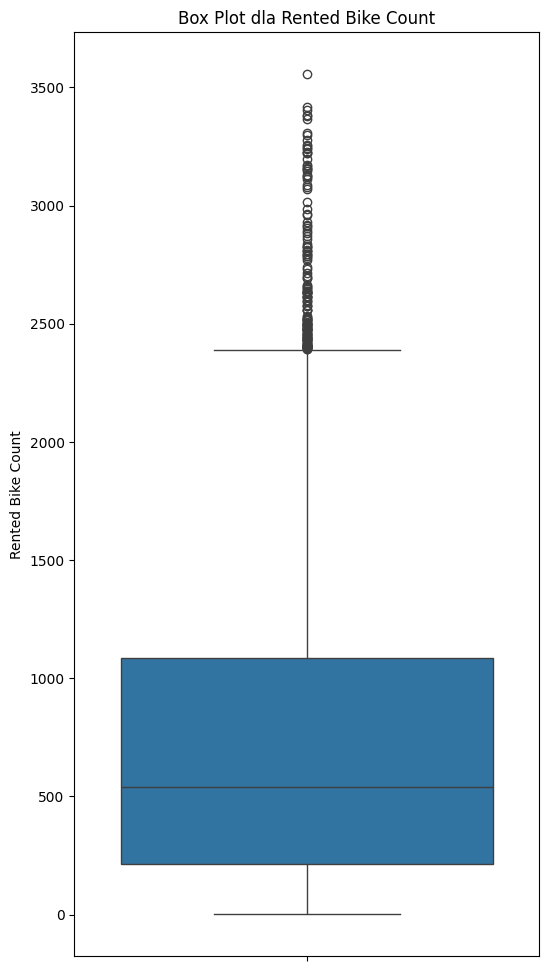

In [ ]:
# Wykres ramka-wąsy (box plot)
plt.figure(figsize=(6, 12))
sns.boxplot(y=df['Rented Bike Count'])
plt.title('Box Plot dla Rented Bike Count')
plt.show()

srednia wychodzi nisko ale mamy duzo wystapien wypożyczeń w bardzo dużej ilości

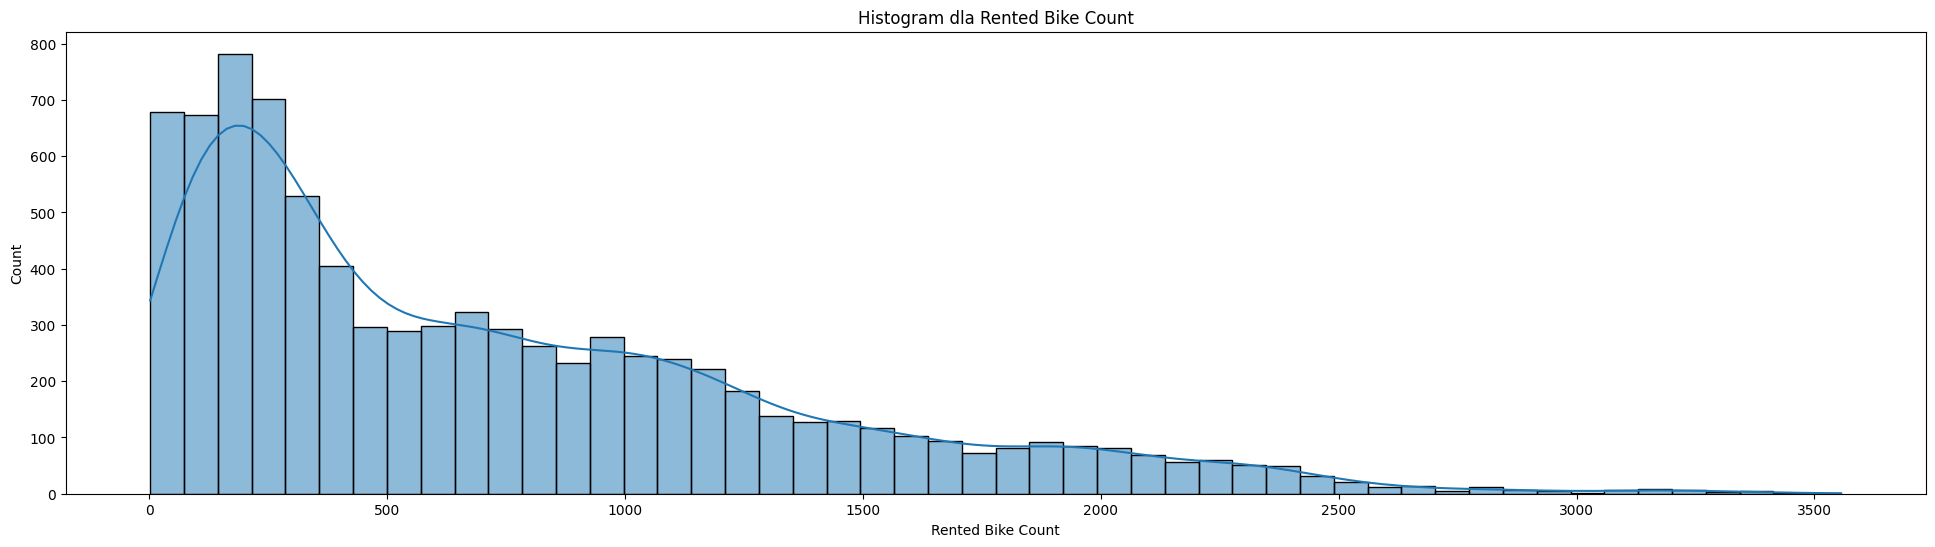

In [ ]:
# Histogram
plt.figure(figsize=(24, 6))
sns.histplot(df['Rented Bike Count'], bins=50, kde=True)
plt.title('Histogram dla Rented Bike Count')
plt.show()

Wykres zdecydowenie prawoskośny

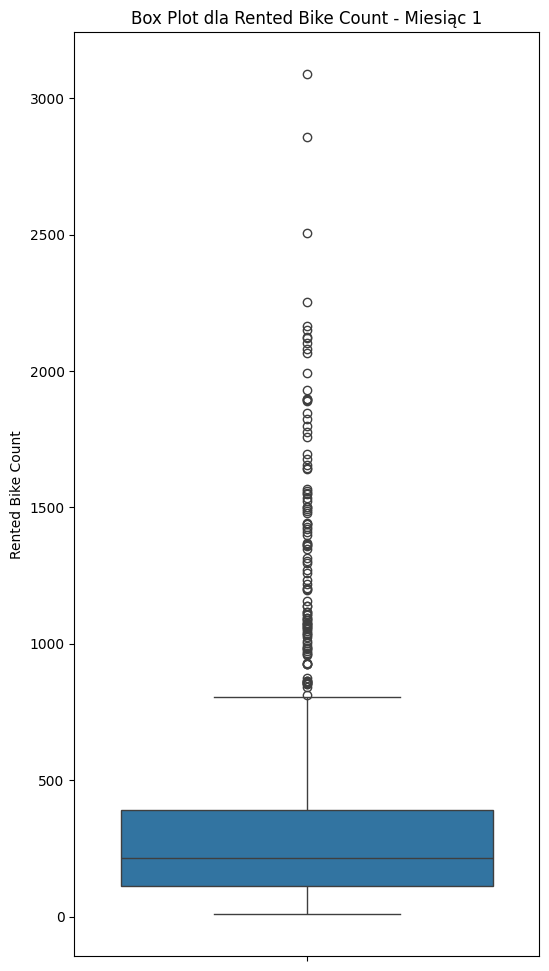

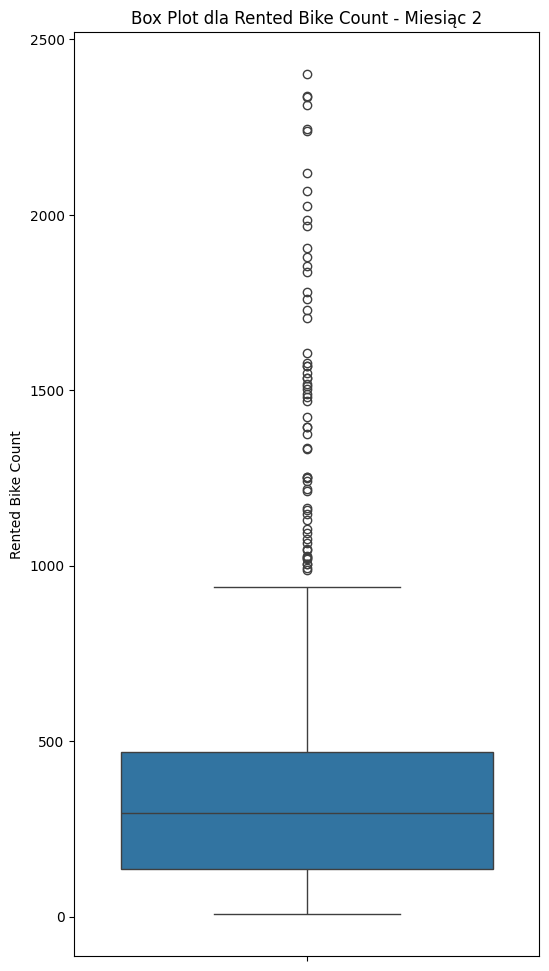

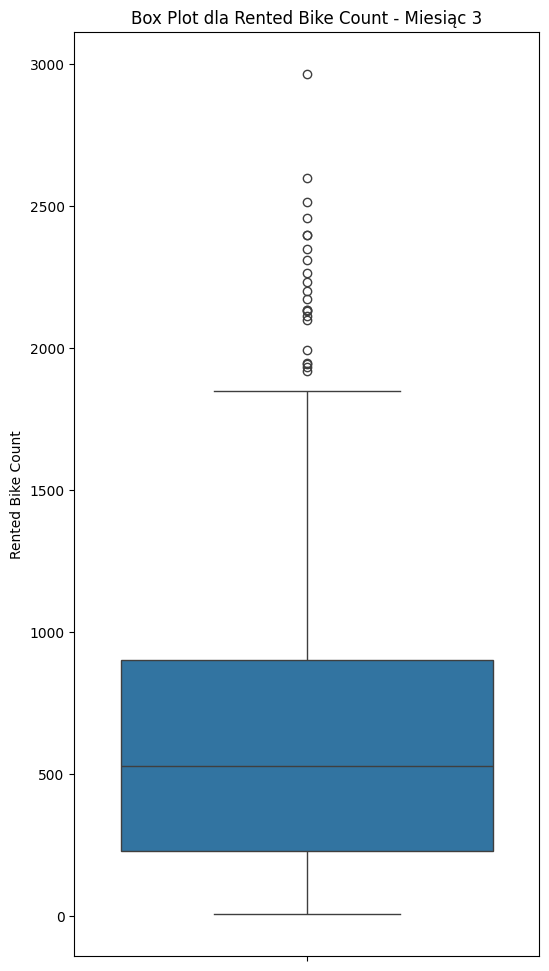

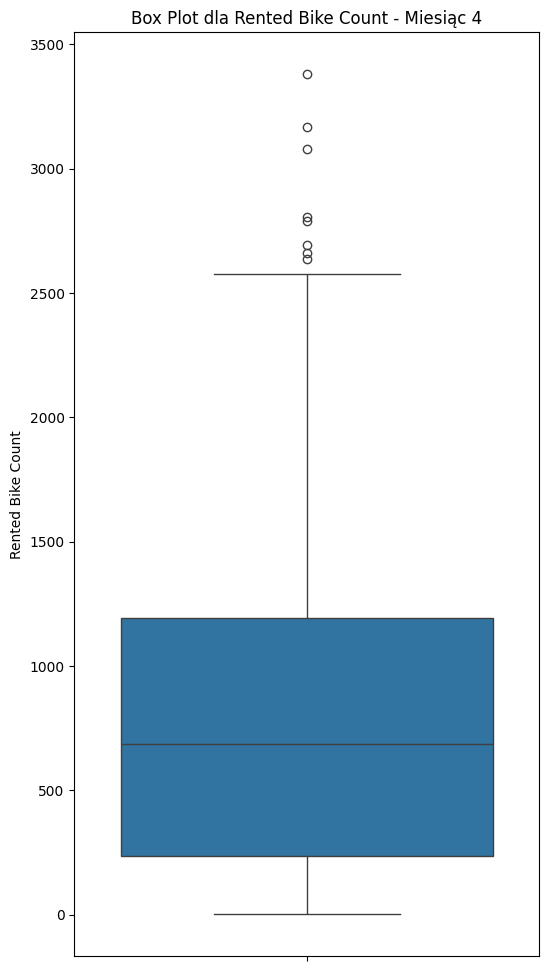

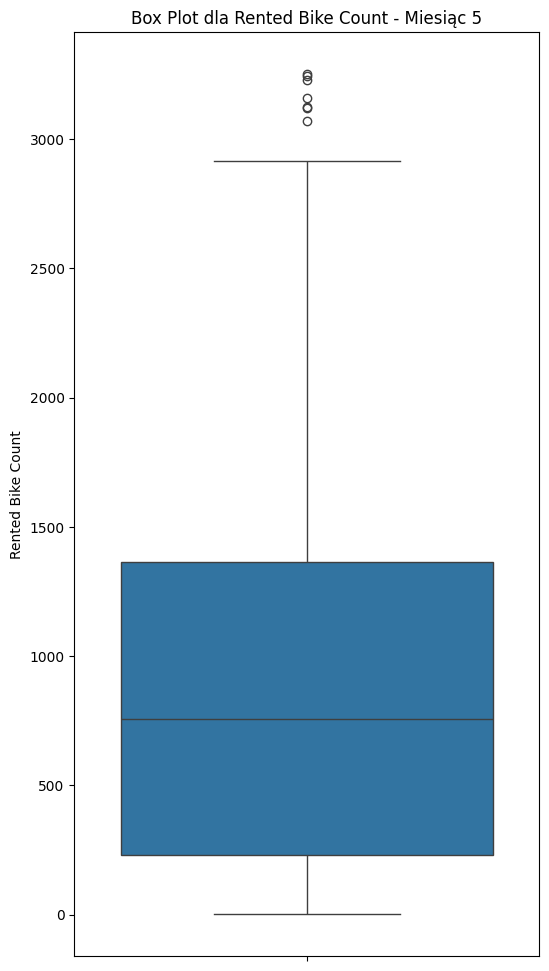

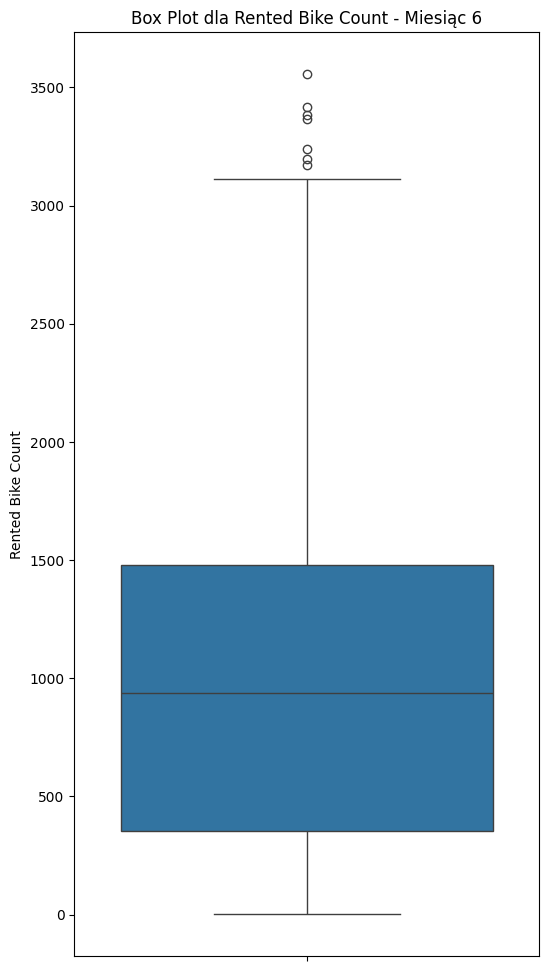

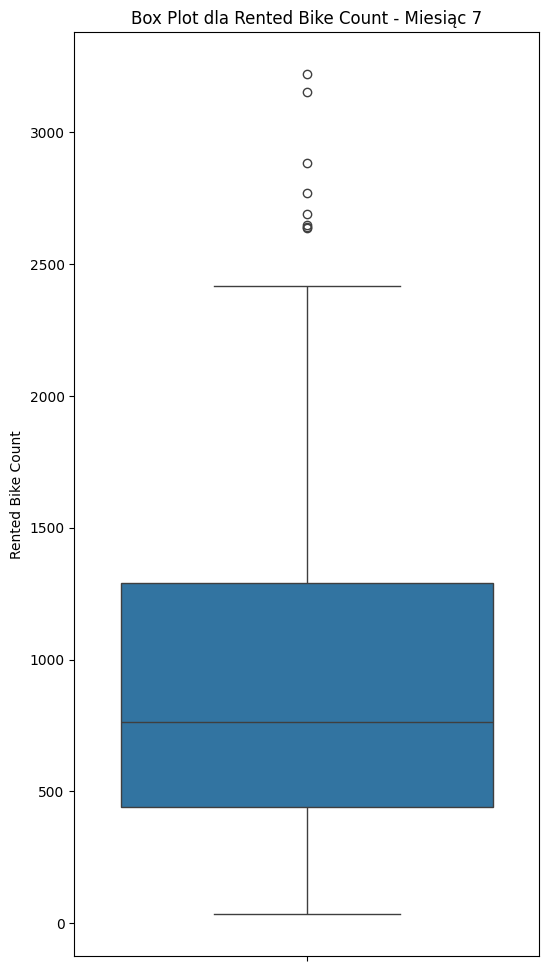

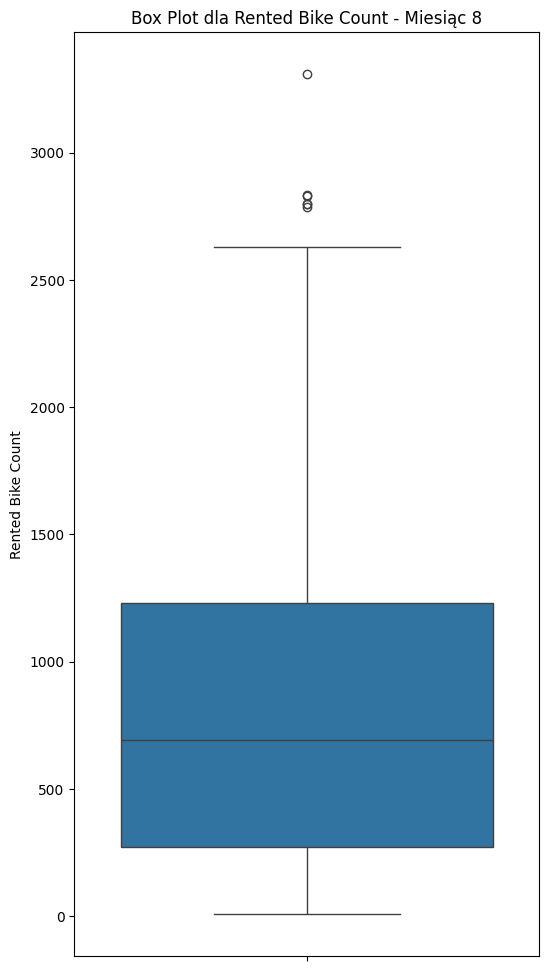

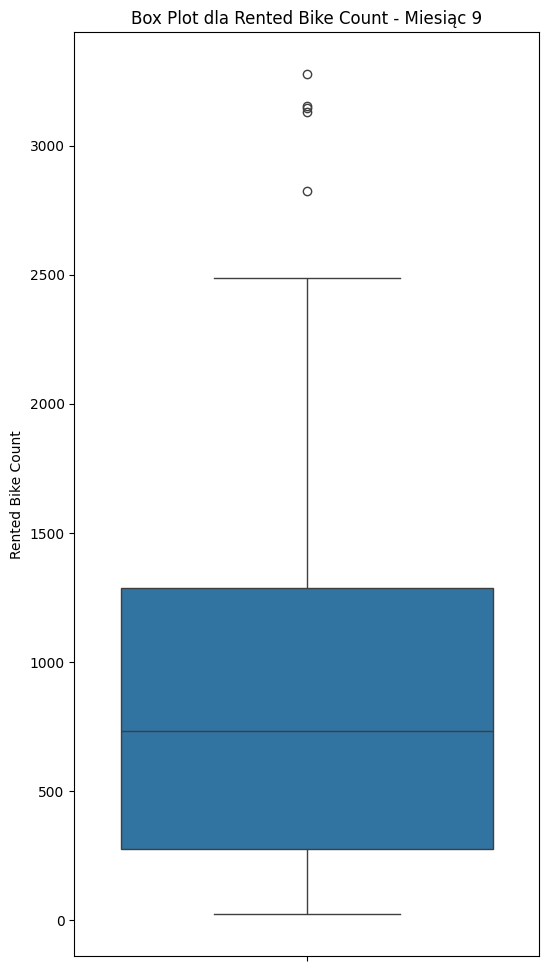

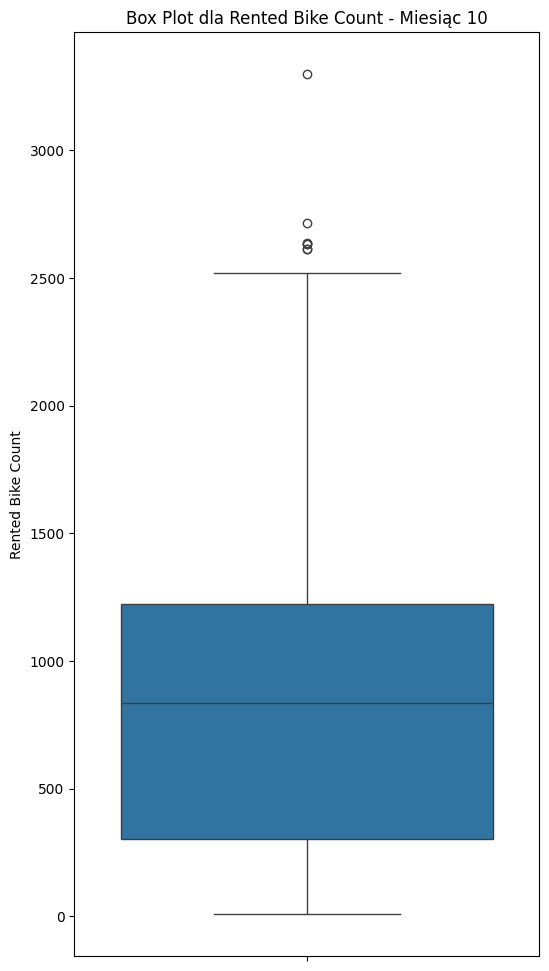

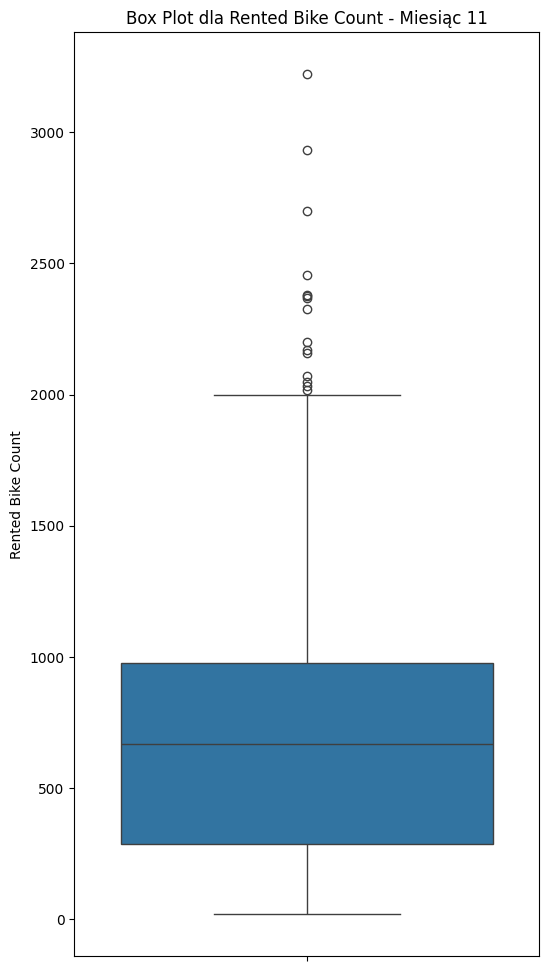

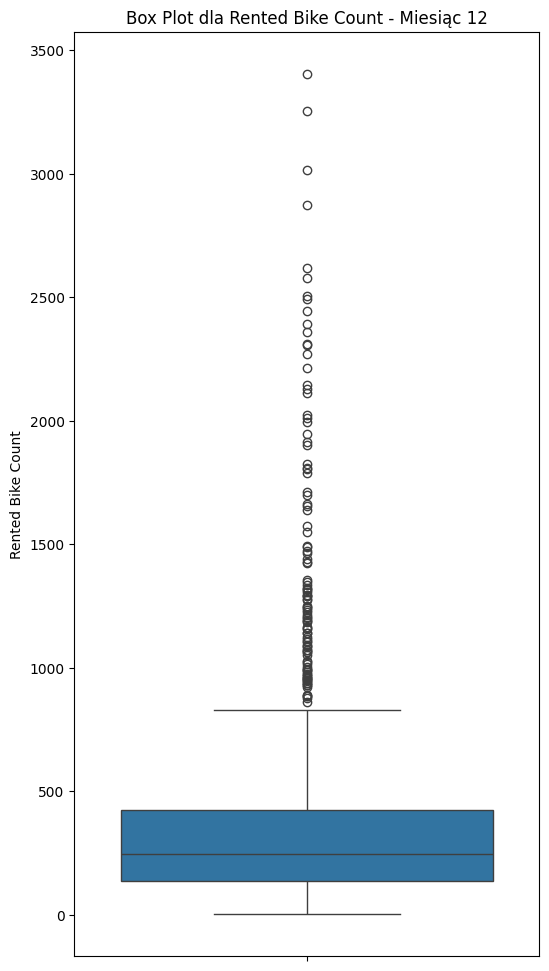

In [ ]:
# Podział na wykresy dla poszczególnych miesięcy
months = sorted(df['Month'].unique())
for month in months:
    df_month = df[df['Month'] == month]

    # Wykres ramka-wąsy
    plt.figure(figsize=(6, 12))
    sns.boxplot(y=df_month['Rented Bike Count'])
    plt.title(f'Box Plot dla Rented Bike Count - Miesiąc {month}')
    plt.show()



to samo co w ogółnym, ale dla

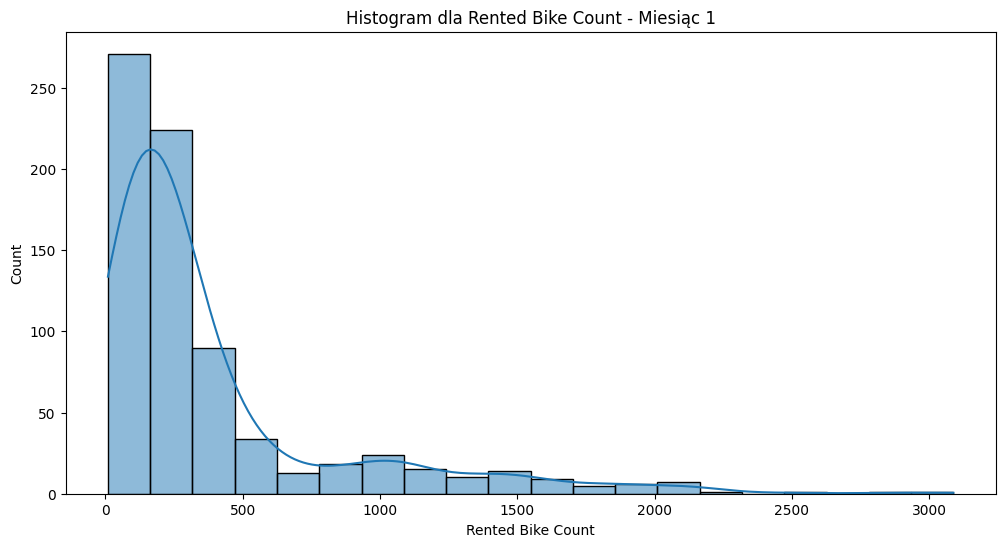

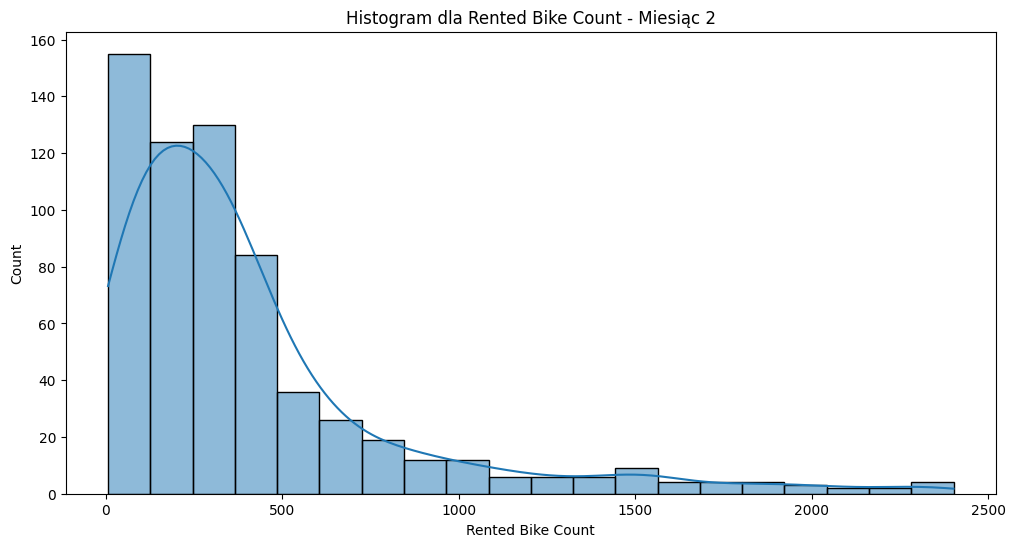

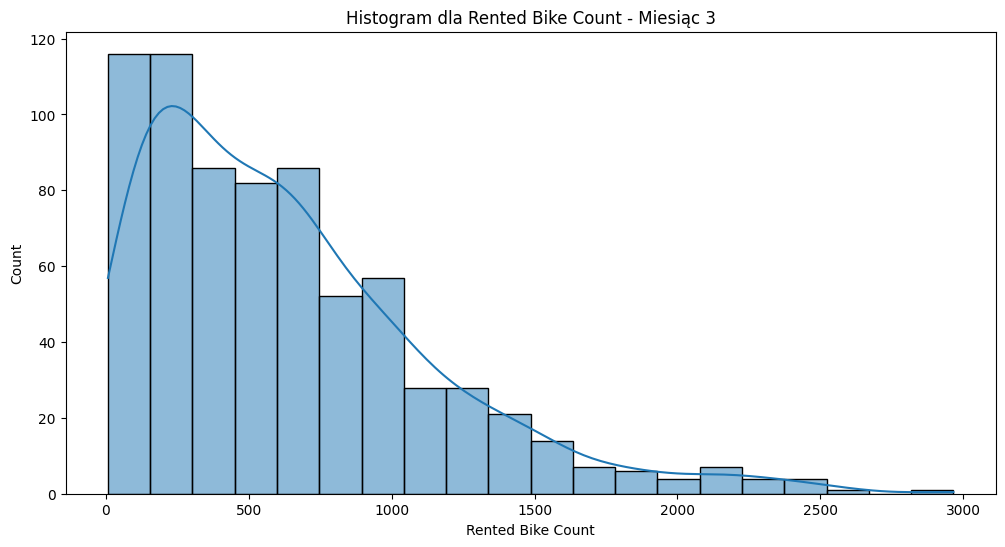

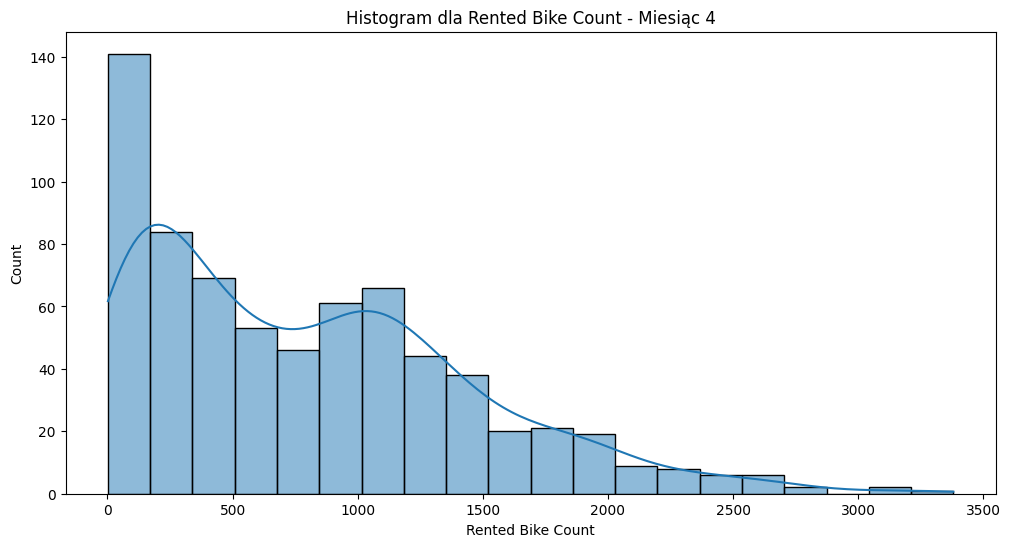

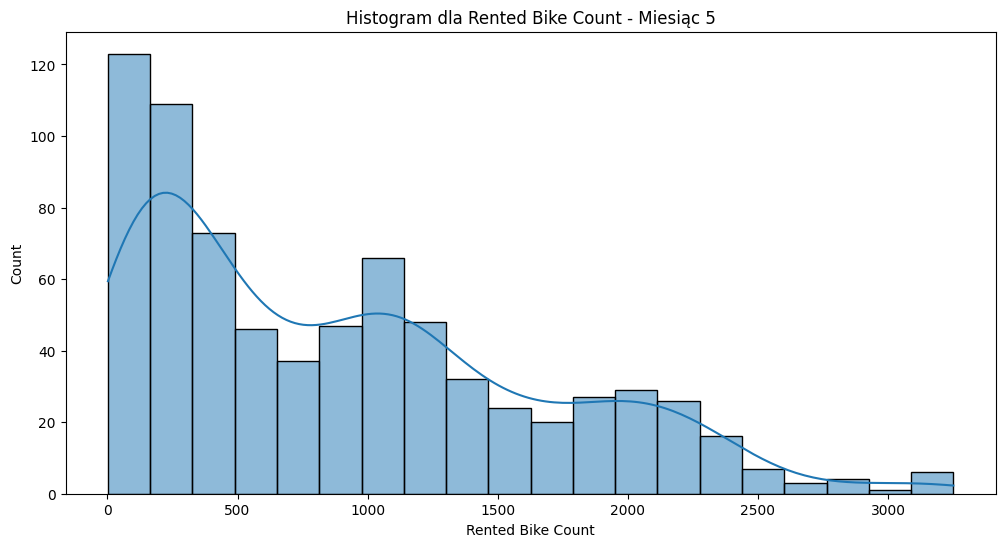

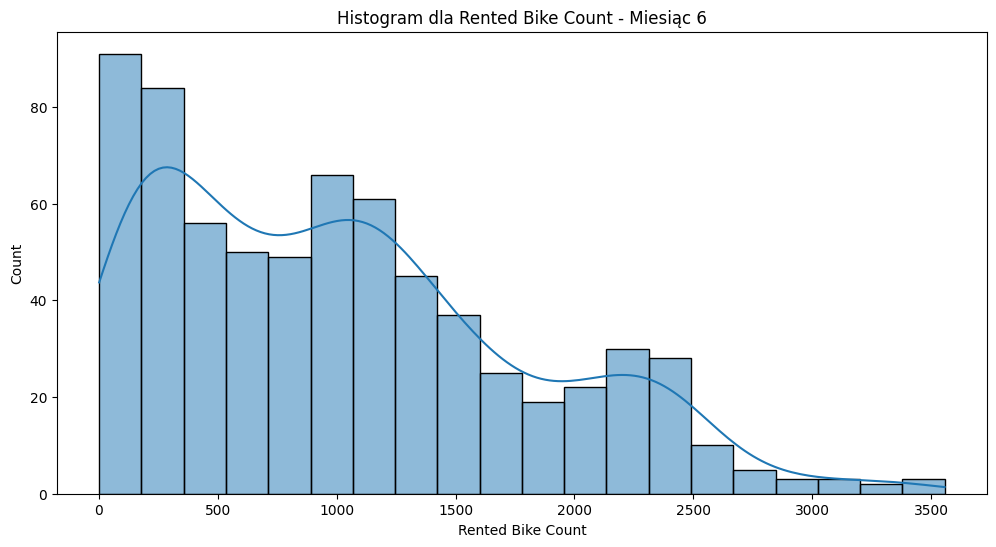

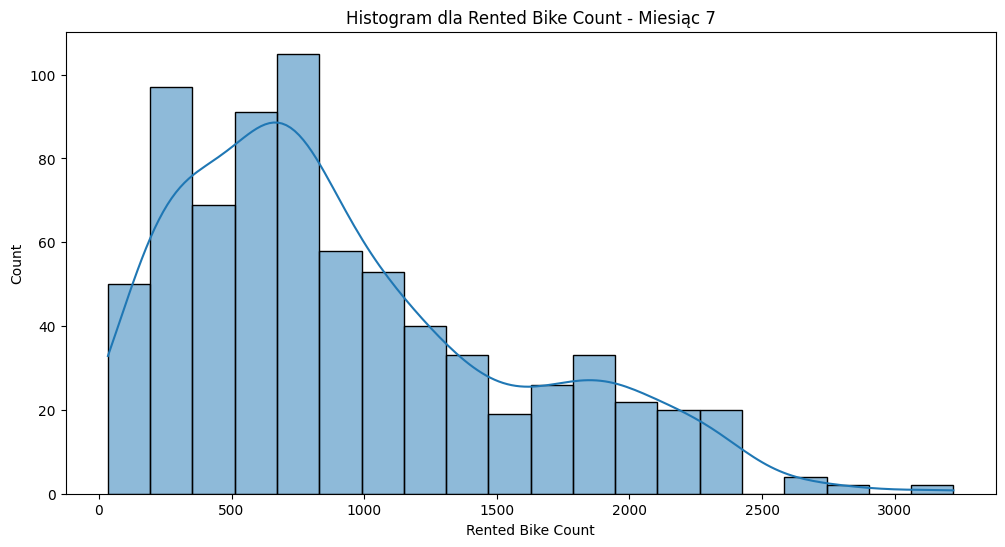

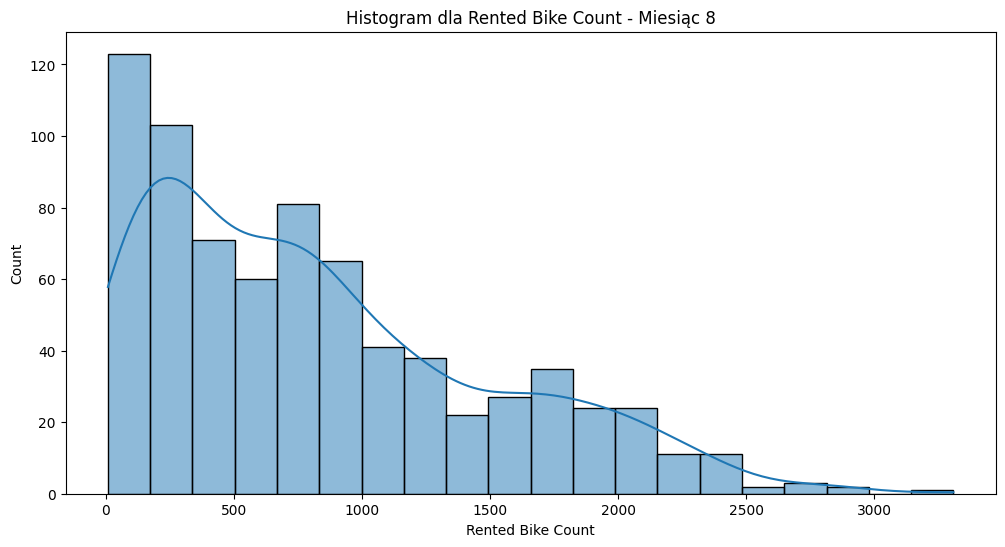

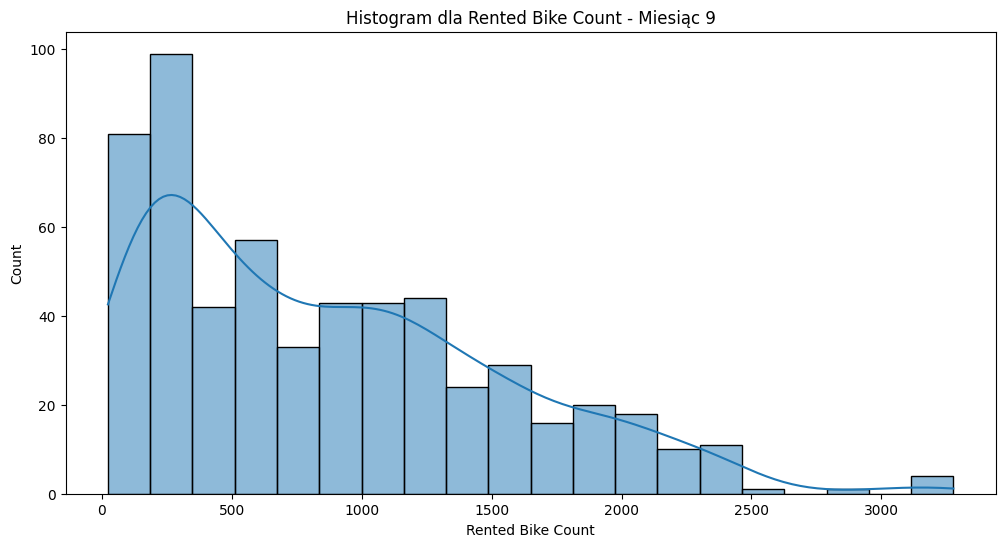

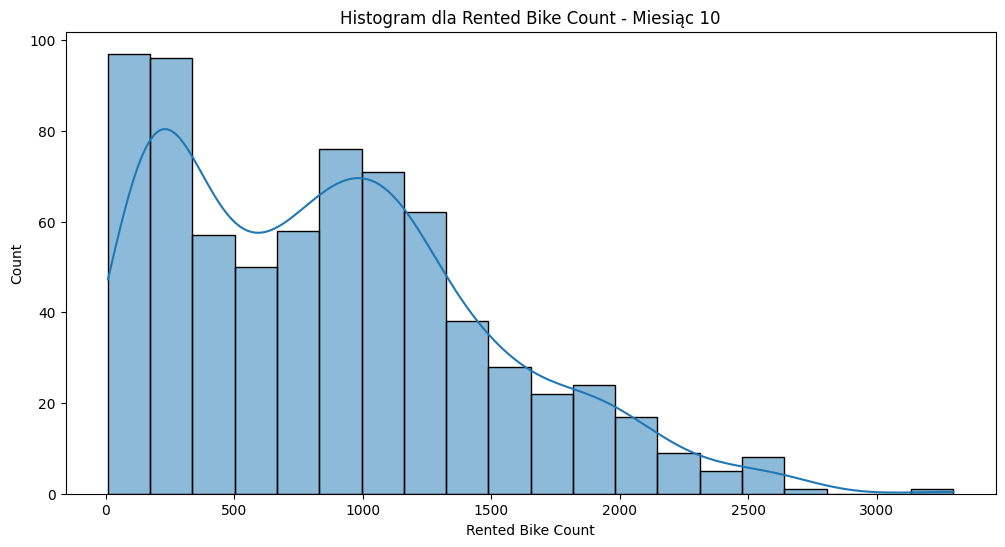

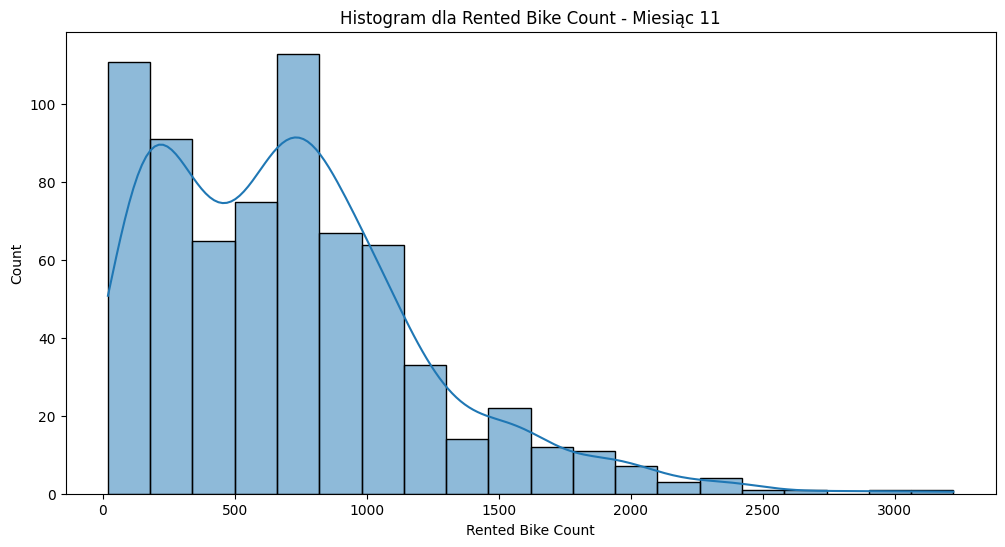

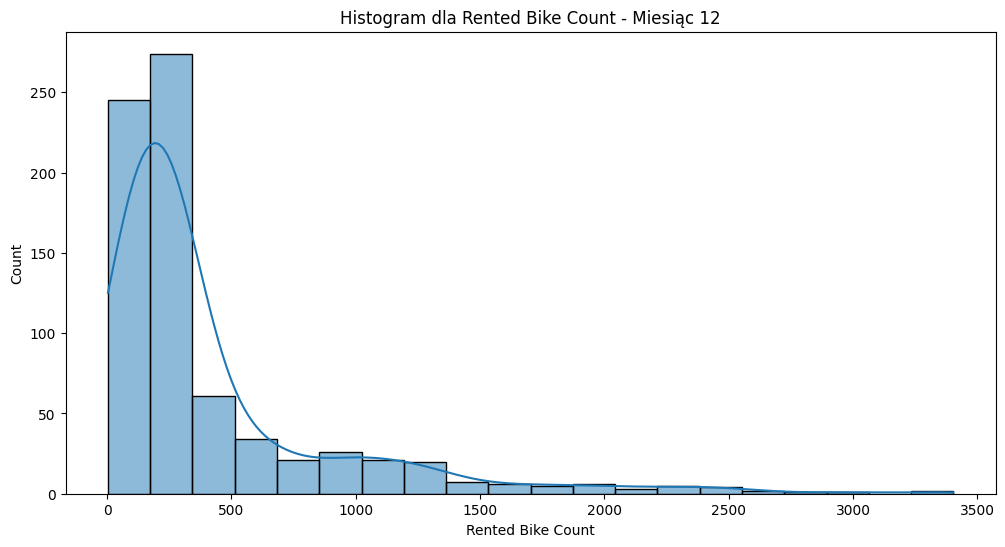

In [ ]:
months = sorted(df['Month'].unique())

for month in months:
    df_month = df[df['Month'] == month]

    # Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(df_month['Rented Bike Count'], bins=20, kde=True)
    plt.title(f'Histogram dla Rented Bike Count - Miesiąc {month}')
    plt.show()

wszystkie wykresy również są prawoskośne, ale im bliżej lata tym w mniejszym stopniu


In [ ]:
months = sorted(df['Month'].unique())

# Inicjalizacja list na wartości statystyczne
mean_values = []
median_values = []
mode_values = []
std_dev_values = []
variance_values = []
range_values = []
q1_values = []
q3_values = []
skewness_values = []
kurtosis_values = []

# Obliczanie wartości dla każdego miesiąca
for month in months:
    df_month = df[df['Month'] == month]

    mean_values.append(df_month['Rented Bike Count'].mean())
    median_values.append(df_month['Rented Bike Count'].median())
    mode_values.append(df_month['Rented Bike Count'].mode()[0])
    std_dev_values.append(df_month['Rented Bike Count'].std())
    variance_values.append(df_month['Rented Bike Count'].var())
    range_values.append(df_month['Rented Bike Count'].max() - df_month['Rented Bike Count'].min())
    q1_values.append(df_month['Rented Bike Count'].quantile(0.25))
    q3_values.append(df_month['Rented Bike Count'].quantile(0.75))
    skewness_values.append(df_month['Rented Bike Count'].skew())
    kurtosis_values.append(df_month['Rented Bike Count'].kurtosis())

# Wypisywanie wartości
for i, month in enumerate(months):
    print(f"Miesiąc {month}:")
    print(f"Średnia: {mean_values[i]}")
    print(f"Mediana: {median_values[i]}")
    print(f"Modalna: {mode_values[i]}")
    print(f"Odchylenie standardowe: {std_dev_values[i]}")
    print(f"Wariancja: {variance_values[i]}")
    print(f"Zakres: {range_values[i]}")
    print(f"Kwartyl 1: {q1_values[i]}")
    print(f"Kwartyl 3: {q3_values[i]}")
    print(f"Skośność: {skewness_values[i]}")
    print(f"Kurtoza: {kurtosis_values[i]}")
    print()


Miesiąc 1:
Średnia: 386.0806451612903
Mediana: 215.5
Modalna: 60
Odchylenie standardowe: 465.40649703771106
Wariancja: 216603.20748491294
Zakres: 3079
Kwartyl 1: 113.75
Kwartyl 3: 391.5
Skośność: 2.3076582463222217
Kurtoza: 5.650484336896978

Miesiąc 2:
Średnia: 407.58024691358025
Mediana: 294.0
Modalna: 63
Odchylenie standardowe: 428.13170528989866
Wariancja: 183296.75707443664
Zakres: 2394
Kwartyl 1: 134.75
Kwartyl 3: 468.25
Skośność: 2.230314460747517
Kurtoza: 5.437517506899751

Miesiąc 3:
Średnia: 631.9958333333333
Mediana: 528.5
Modalna: 67
Odchylenie standardowe: 506.08332828732415
Wariancja: 256120.33517037553
Zakres: 2957
Kwartyl 1: 231.0
Kwartyl 3: 903.0
Skośność: 1.293695131911181
Kurtoza: 1.8658931223381434

Miesiąc 4:
Średnia: 799.1652298850574
Mediana: 685.0
Modalna: 17
Odchylenie standardowe: 650.6430532417492
Wariancja: 423336.38273174566
Zakres: 3378
Kwartyl 1: 234.0
Kwartyl 3: 1193.25
Skośność: 0.8663146414069511
Kurtoza: 0.3863872844947909

Miesiąc 5:
Średnia: 895.091

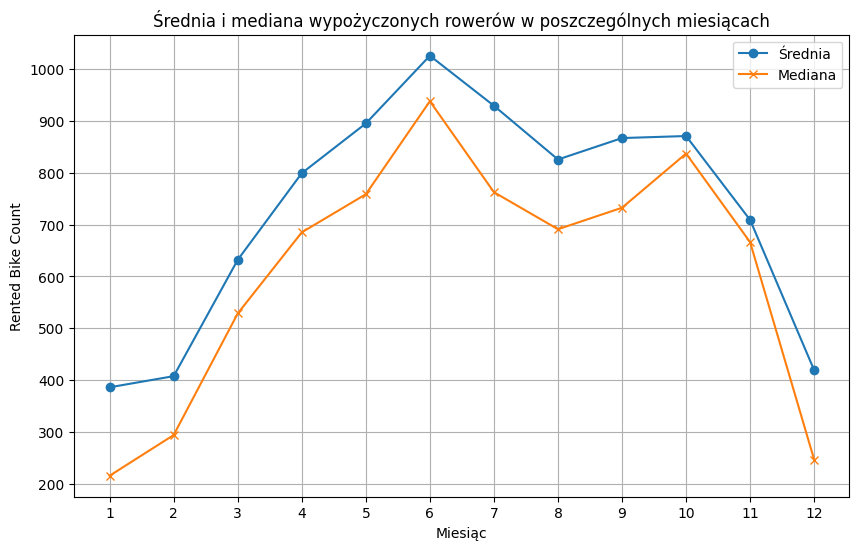

In [ ]:
# Inicjalizacja list na wartości średniej i mediany
mean_values = []
median_values = []

# Obliczanie wartości dla każdego miesiąca
for month in months:
    df_month = df[df['Month'] == month]

    mean_values.append(df_month['Rented Bike Count'].mean())
    median_values.append(df_month['Rented Bike Count'].median())

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(months, mean_values, marker='o', label='Średnia')
plt.plot(months, median_values, marker='x', label='Mediana')
plt.xlabel('Miesiąc')
plt.ylabel('Rented Bike Count')
plt.title('Średnia i mediana wypożyczonych rowerów w poszczególnych miesiącach')
plt.xticks(months)
plt.legend()
plt.grid(True)
plt.show()

jak możemy się domyślać im lepsza pogoda tym więcej wypożyczyczeń, możliwe że był zimny/burzliwy sierpień


In [ ]:
df['Temperature(ﾰC)'].max() - df['Temperature(ﾰC)'].min()

57.2

In [ ]:
df['Temperature(ﾰC)'].min()

-17.8

In [ ]:
df['Temperature(ﾰC)'].max()

39.4

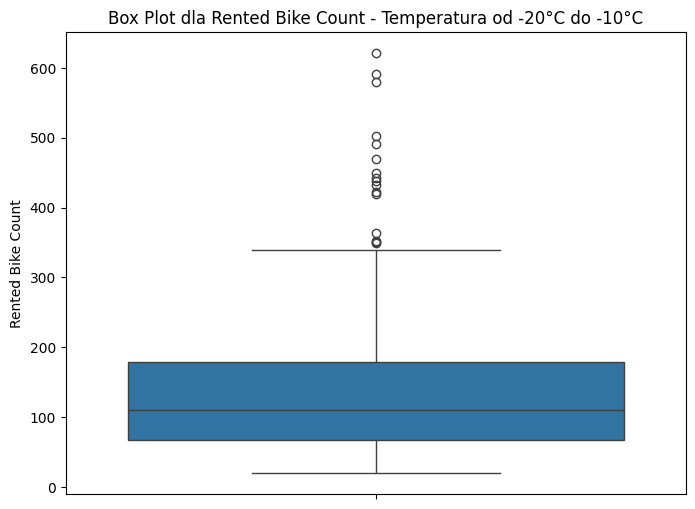

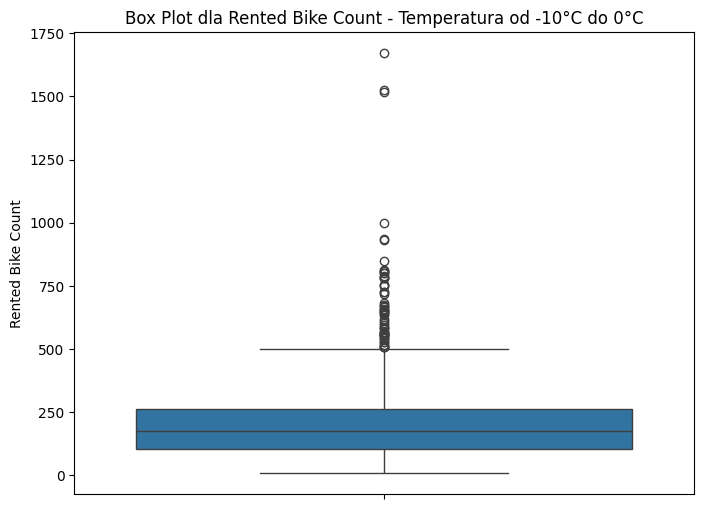

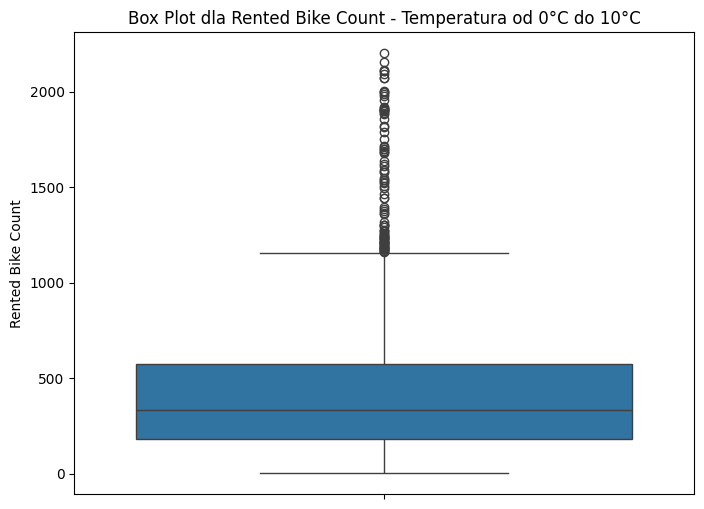

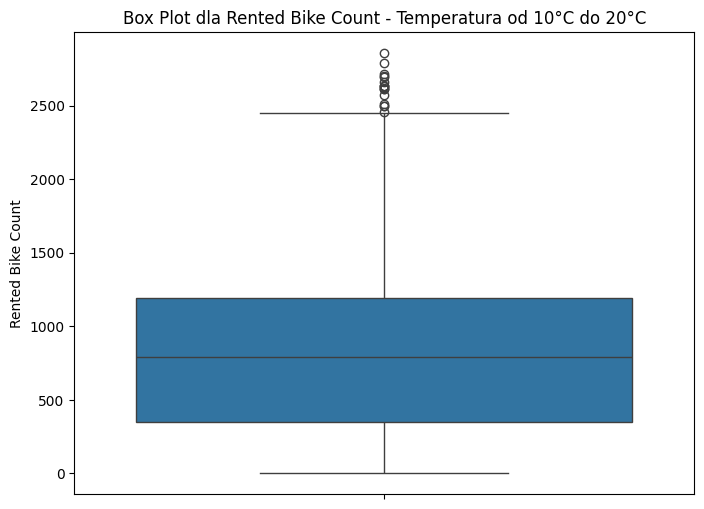

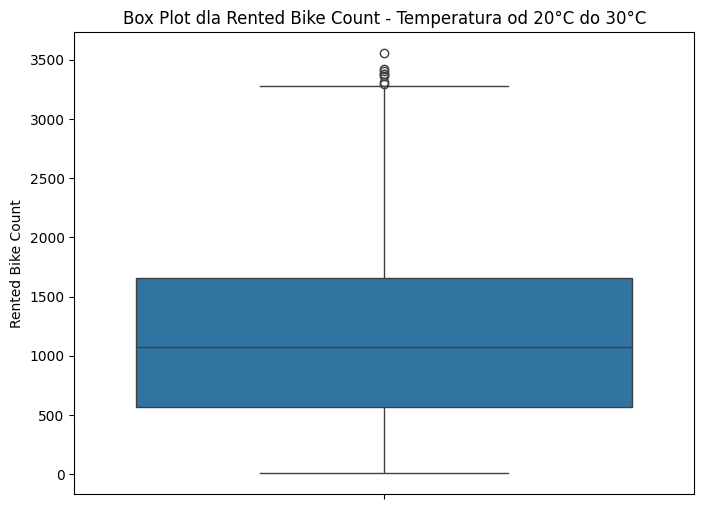

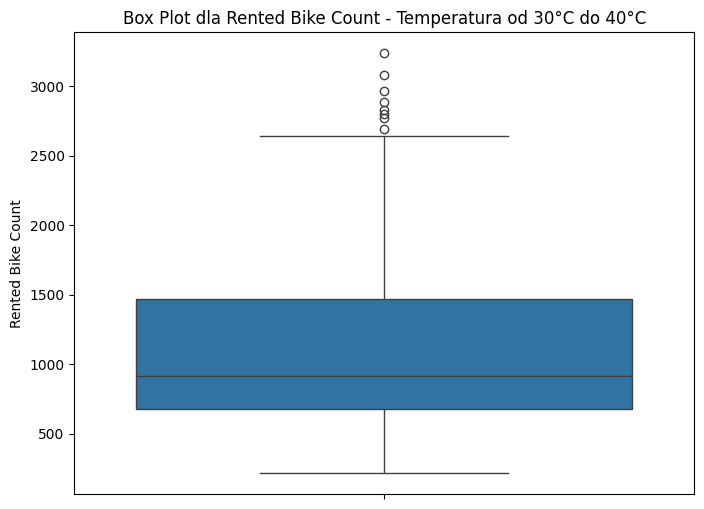

In [ ]:
# Zakres temperatur
temperature_ranges = [(x, x + 10) for x in range(-20, 40, 10)]

# Tworzenie wykresów dla każdego przedziału temperatur
for temp_range in temperature_ranges:
    df_temp = df[(df['Temperature(ﾰC)'] >= temp_range[0]) & (df['Temperature(ﾰC)'] < temp_range[1])]

    # Wykres ramka-wąsy
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_temp['Rented Bike Count'])
    plt.title(f'Box Plot dla Rented Bike Count - Temperatura od {temp_range[0]}°C do {temp_range[1]}°C')
    plt.show()


wraz ze wzrostem temperatury mediana przesuwa sie w górę, poza najwyższymi wartościami co może wskazywać że powyżej 30 jest za gorąco na wysiłek fizyczny dla niektórych

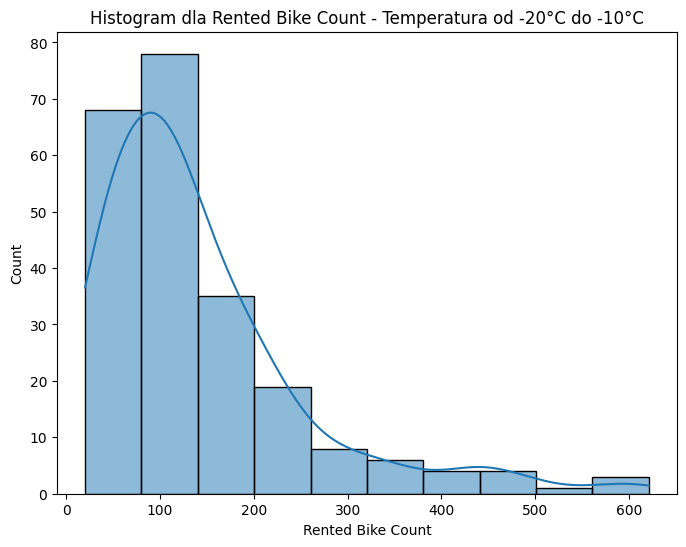

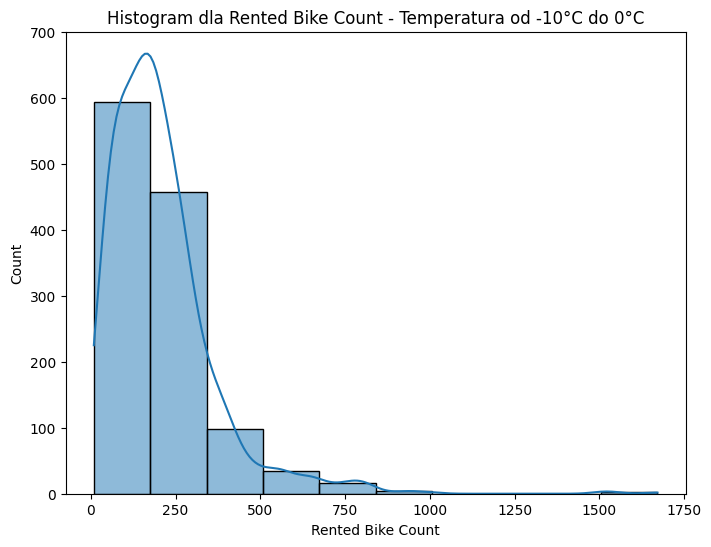

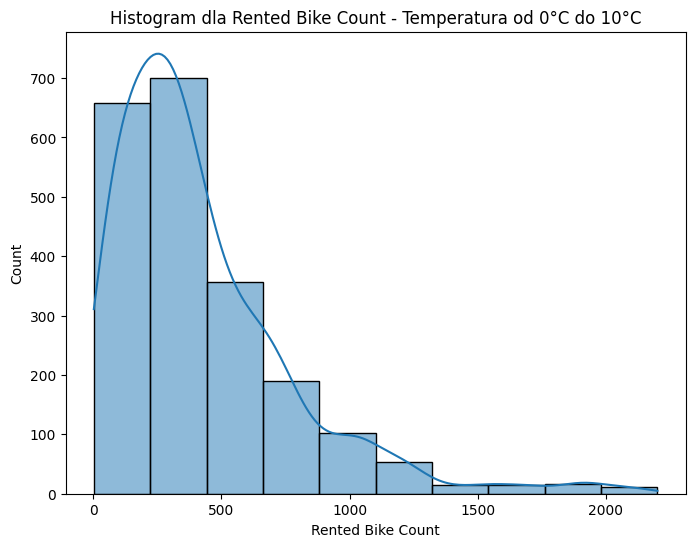

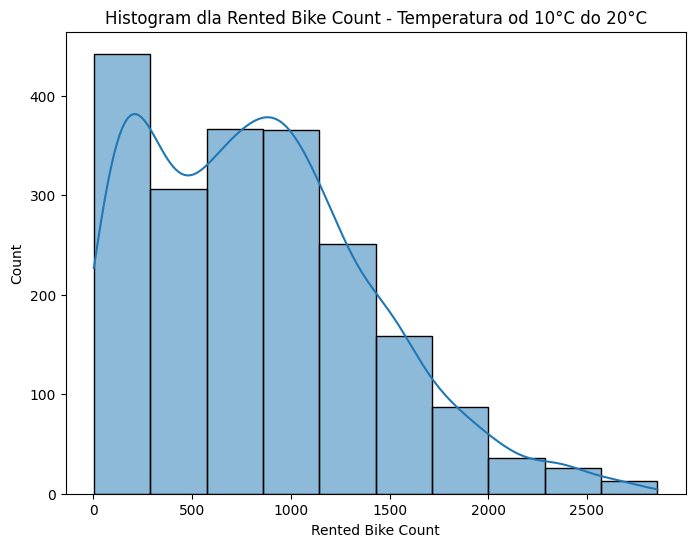

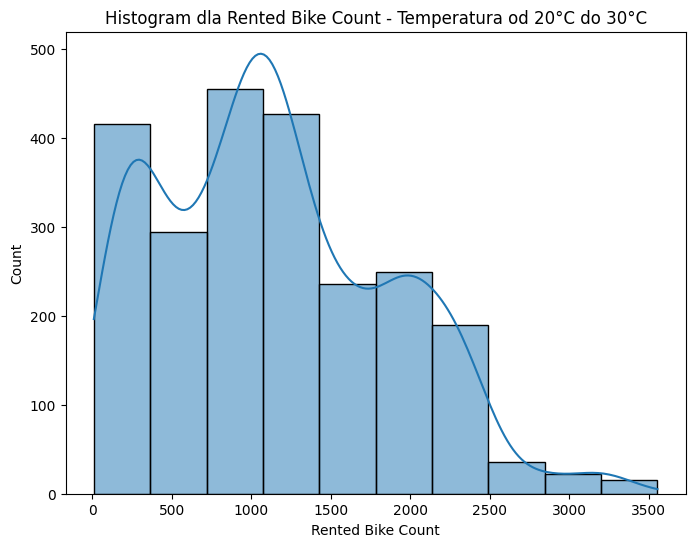

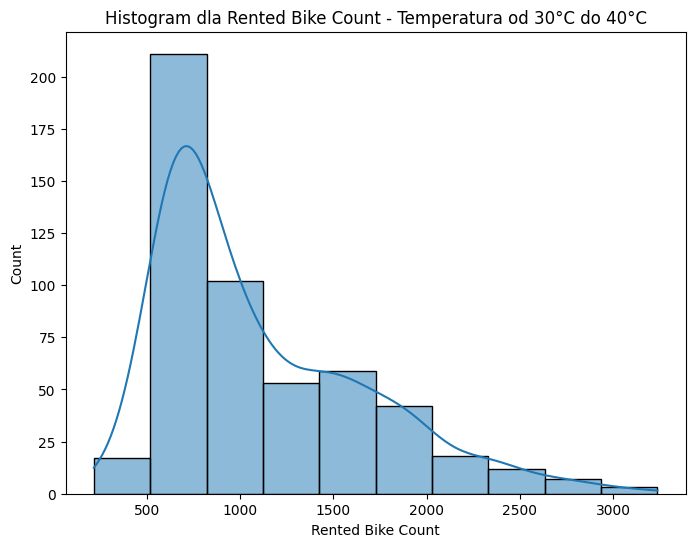

In [ ]:
# Tworzenie wykresów histogramów dla każdego przedziału temperatur
for temp_range in temperature_ranges:
    df_temp = df[(df['Temperature(ﾰC)'] >= temp_range[0]) & (df['Temperature(ﾰC)'] < temp_range[1])]

    # Wykres histogramu
    plt.figure(figsize=(8, 6))
    sns.histplot(df_temp['Rented Bike Count'], bins=10, kde=True)
    plt.title(f'Histogram dla Rented Bike Count - Temperatura od {temp_range[0]}°C do {temp_range[1]}°C')
    plt.show()

to samo co wcześniej, im cieplej tym wiecej wypożyczeń, poza momentem gdy jest za gorąco. I choć wykresy są prawoskośne to wraz ze wzrostem temperatury poza ostatnim wykresem stają cię one mniej prawoskośne

In [ ]:
# Inicjalizacja list na wartości statystyczne
mean_values = []
median_values = []
mode_values = []
std_dev_values = []
variance_values = []
range_values = []
q1_values = []
q3_values = []
skewness_values = []
kurtosis_values = []

# Obliczanie wartości dla każdego zakresu temperatur
for temp_range in temperature_ranges:
    df_temp = df[(df['Temperature(ﾰC)'] >= temp_range[0]) & (df['Temperature(ﾰC)'] < temp_range[1])]

    mean_values.append(df_temp['Rented Bike Count'].mean())
    median_values.append(df_temp['Rented Bike Count'].median())
    mode_values.append(df_temp['Rented Bike Count'].mode()[0])
    std_dev_values.append(df_temp['Rented Bike Count'].std())
    variance_values.append(df_temp['Rented Bike Count'].var())
    range_values.append(df_temp['Rented Bike Count'].max() - df_temp['Rented Bike Count'].min())
    q1_values.append(df_temp['Rented Bike Count'].quantile(0.25))
    q3_values.append(df_temp['Rented Bike Count'].quantile(0.75))
    skewness_values.append(df_temp['Rented Bike Count'].skew())
    kurtosis_values.append(df_temp['Rented Bike Count'].kurtosis())

# Wypisywanie wartości
for i, temp_range in enumerate(temperature_ranges):
    print(f"Zakres temperatury od {temp_range[0]} do {temp_range[1]}:")
    print(f"Średnia: {mean_values[i]}")
    print(f"Mediana: {median_values[i]}")
    print(f"Modalna: {mode_values[i]}")
    print(f"Odchylenie standardowe: {std_dev_values[i]}")
    print(f"Wariancja: {variance_values[i]}")
    print(f"Zakres: {range_values[i]}")
    print(f"Kwartyl 1: {q1_values[i]}")
    print(f"Kwartyl 3: {q3_values[i]}")
    print(f"Skośność: {skewness_values[i]}")
    print(f"Kurtoza: {kurtosis_values[i]}")
    print()

Zakres temperatury od -20 do -10:
Średnia: 141.81415929203538
Mediana: 110.5
Modalna: 94
Odchylenie standardowe: 111.91850596036913
Wariancja: 12525.75197640118
Zakres: 601
Kwartyl 1: 68.0
Kwartyl 3: 179.5
Skośność: 1.861928833441667
Kurtoza: 3.939185709539935

Zakres temperatury od -10 do 0:
Średnia: 208.50952775476387
Mediana: 177.0
Modalna: 103
Odchylenie standardowe: 160.44384861243873
Wariancja: 25742.22855757116
Zakres: 1662
Kwartyl 1: 103.0
Kwartyl 3: 263.5
Skośność: 2.7830338482691506
Kurtoza: 15.094728183111519

Zakres temperatury od 0 do 10:
Średnia: 426.3399433427762
Mediana: 333.0
Modalna: 165
Odchylenie standardowe: 358.99571199183947
Wariancja: 128877.92122852775
Zakres: 2200
Kwartyl 1: 183.0
Kwartyl 3: 572.0
Skośność: 1.8072195376954818
Kurtoza: 4.296402086970405

Zakres temperatury od 10 do 20:
Średnia: 837.1560975609756
Mediana: 790.0
Modalna: 29
Odchylenie standardowe: 575.1572662683901
Wariancja: 330805.8809413278
Zakres: 2855
Kwartyl 1: 351.25
Kwartyl 3: 1190.75
Sko

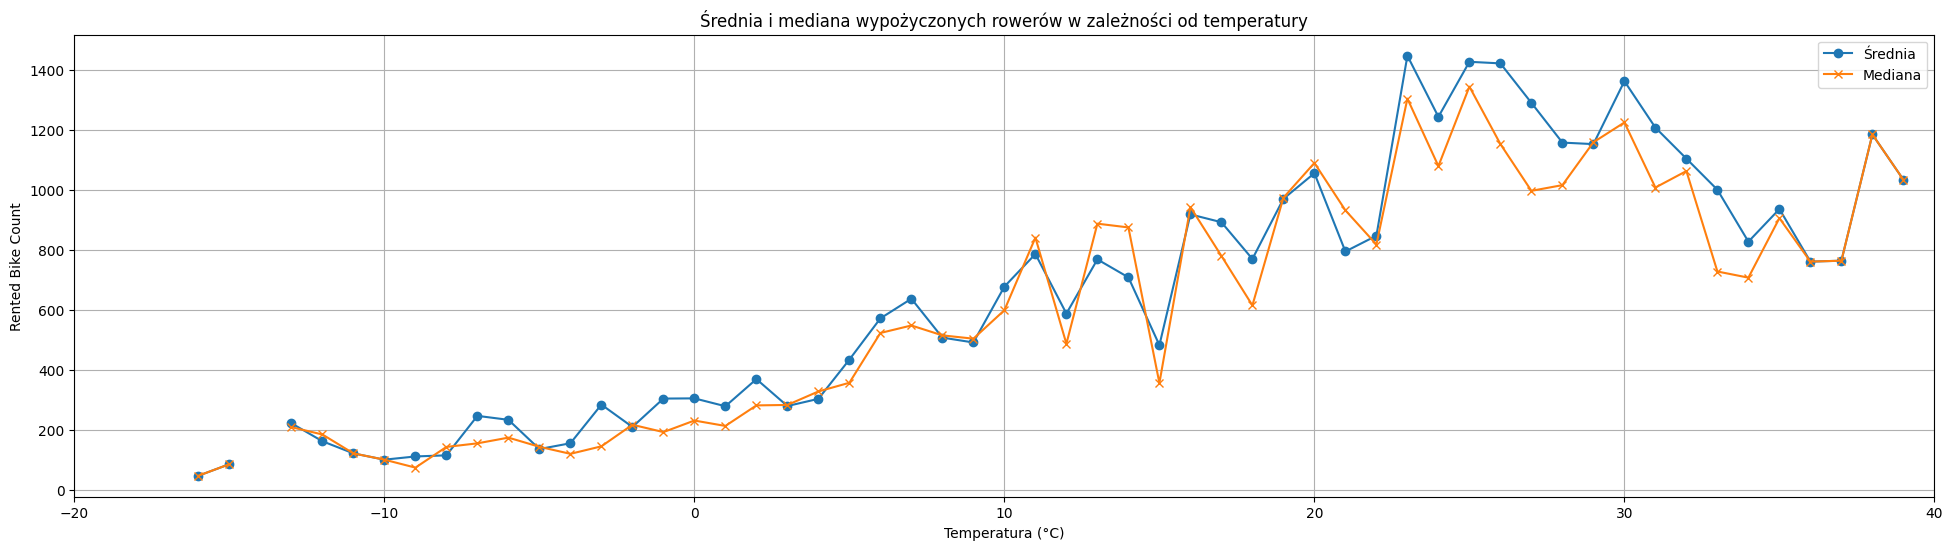

In [ ]:
# Inicjalizacja list na wartości średniej i mediany
mean_values = []
median_values = []

# Zakres temperatur
temperature_range = range(-20, 41)

# Obliczanie wartości dla każdej temperatury
for temperature in temperature_range:
    df_temp = df[df['Temperature(ﾰC)'] == temperature]
    mean_values.append(df_temp['Rented Bike Count'].mean())
    median_values.append(df_temp['Rented Bike Count'].median())

# Tworzenie wykresu
plt.figure(figsize=(24, 6))
plt.plot(temperature_range, mean_values, marker='o', label='Średnia')
plt.plot(temperature_range, median_values, marker='x', label='Mediana')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Średnia i mediana wypożyczonych rowerów w zależności od temperatury')
plt.xlim(-20, 40)
plt.legend()
plt.grid(True)
plt.show()


jak można się domyślać im cieplej tym więcej wypożyczeń, aczkolwiek w okolicach 25℃ zaczyna się robić za gorąco dla niektórych

In [ ]:
df['Solar Radiation (MJ/m2)'].min()

0.0

In [ ]:
df['Solar Radiation (MJ/m2)'].max()

3.52

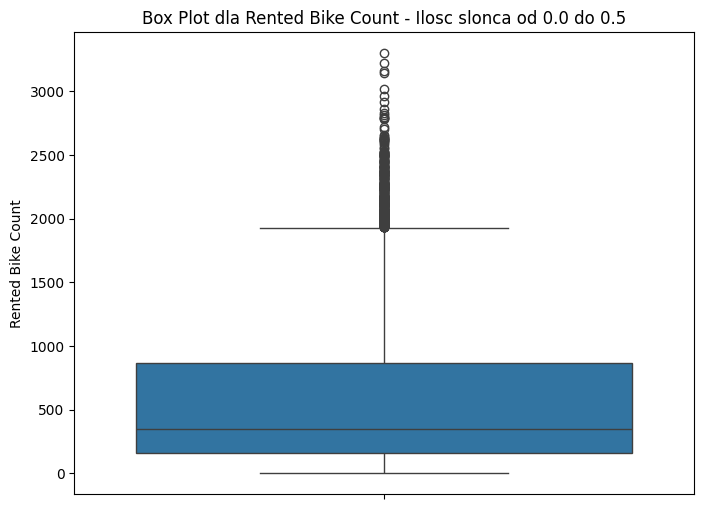

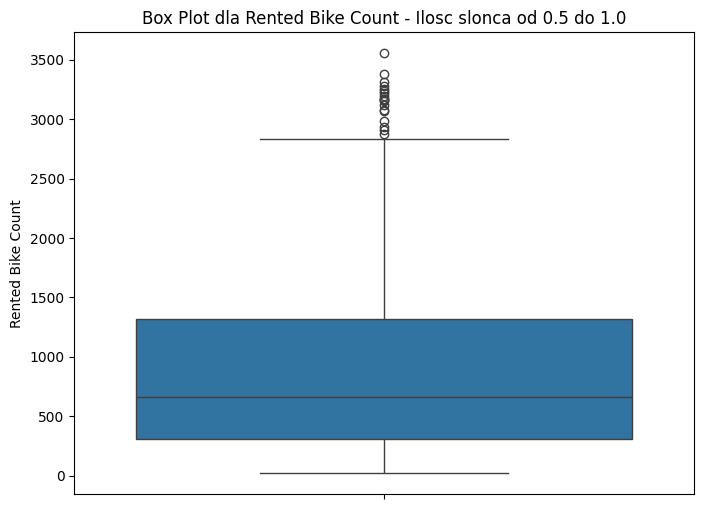

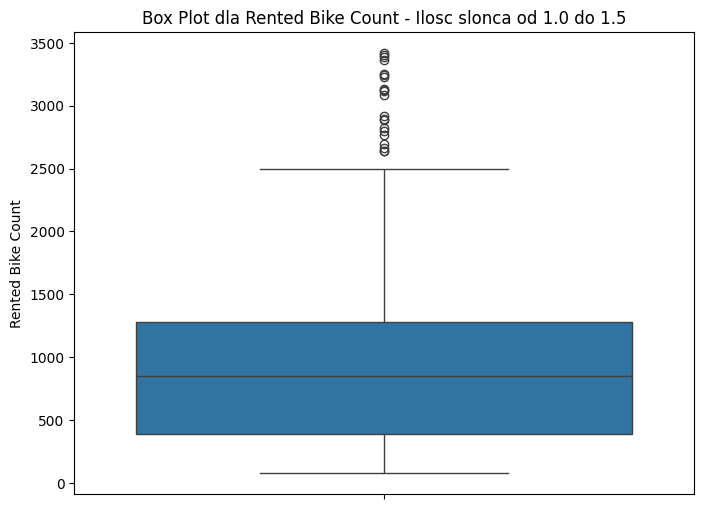

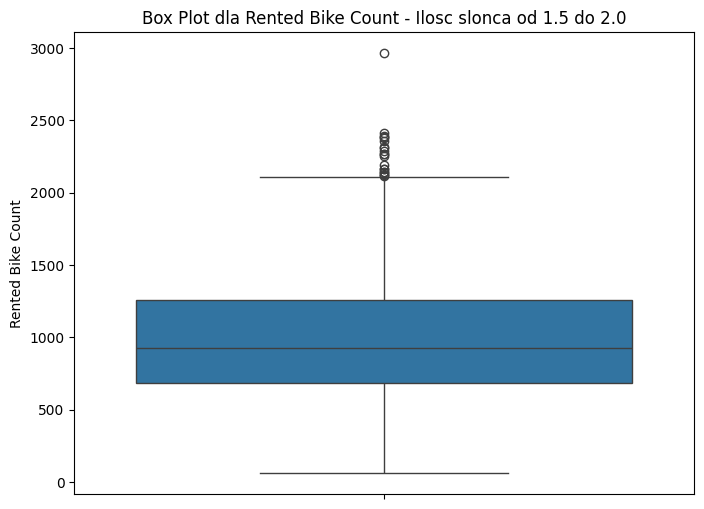

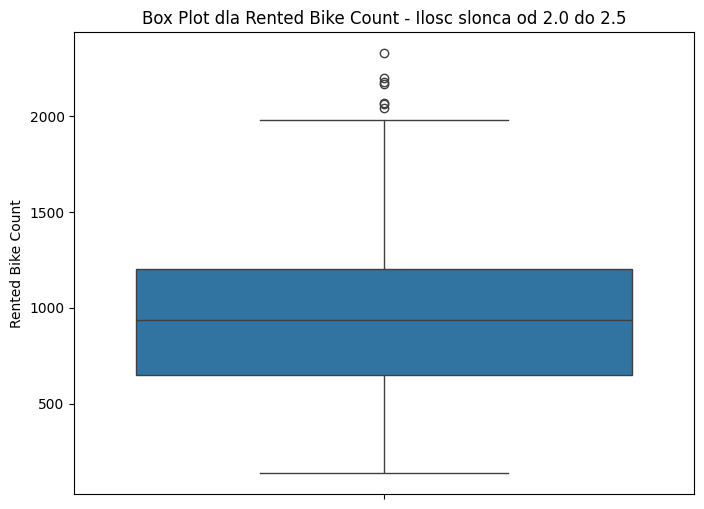

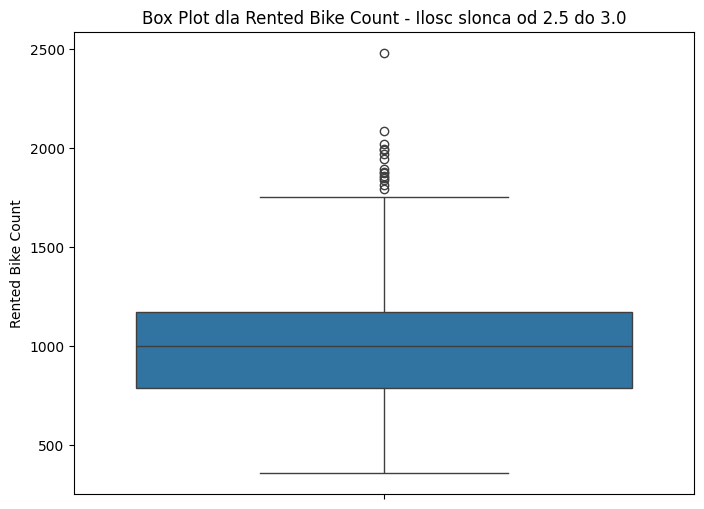

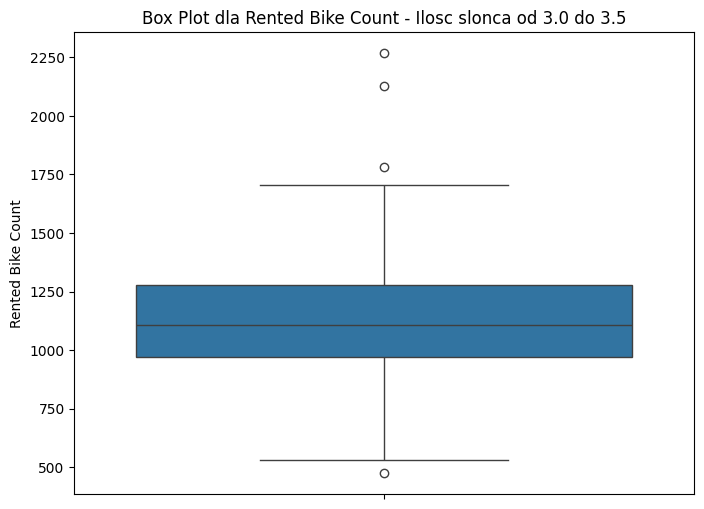

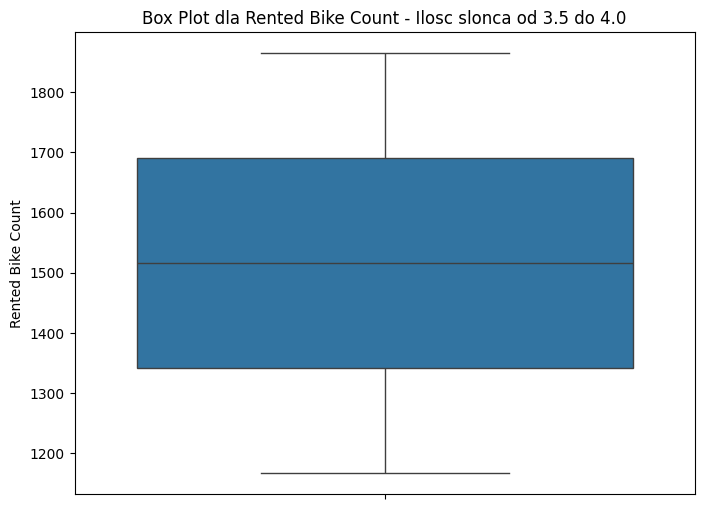

In [ ]:
sun = [(x, x + 0.5) for x in np.arange(0, 4, 0.5)]


# Tworzenie wykresów dla każdego przedziału godzin
for sun_r in sun:
    df_temp = df[(df['Solar Radiation (MJ/m2)'] >= sun_r[0]) & (df['Solar Radiation (MJ/m2)'] < sun_r[1])]

    # Wykres ramka-wąsy
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_temp['Rented Bike Count'])
    plt.title(f'Box Plot dla Rented Bike Count - Ilosc slonca od {sun_r[0]} do {sun_r[1]}')
    plt.show()

im więcej słońca tym mediana przesuwa się w górę, nie widać poziomu w którym byłoby go za dużo, jak w przypadku temperatury

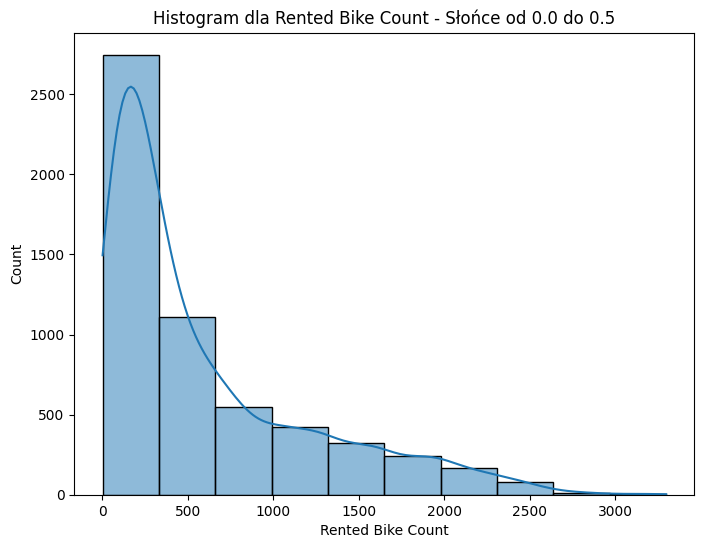

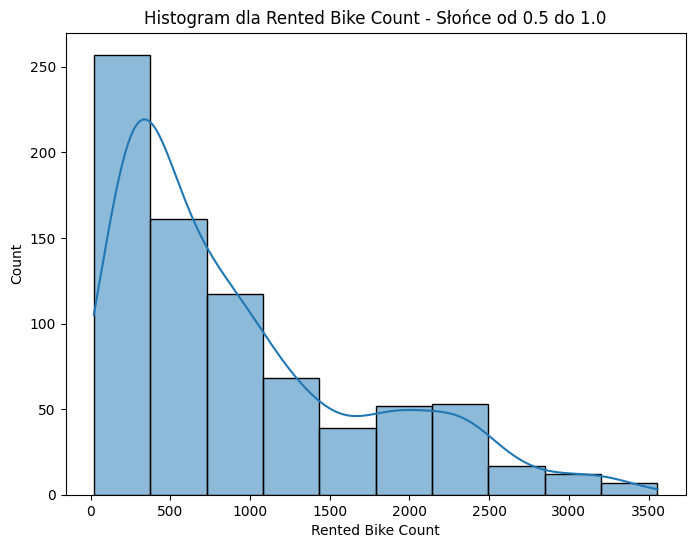

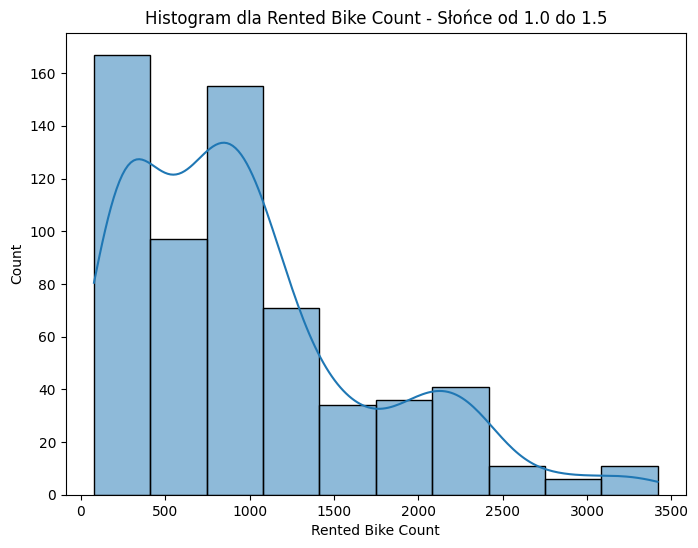

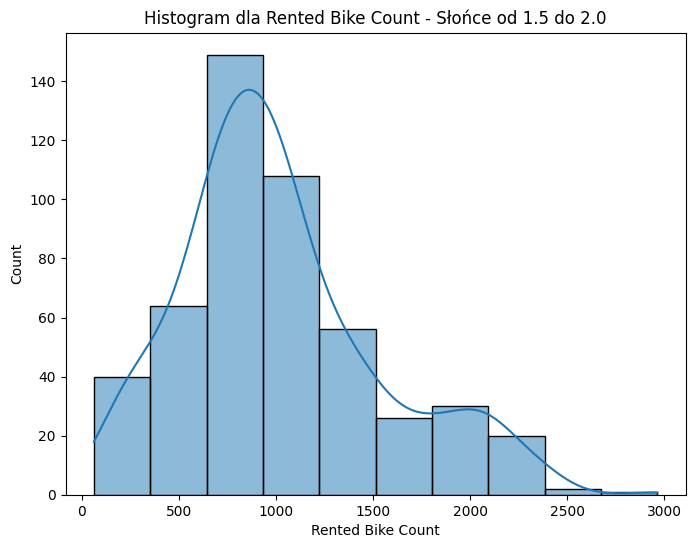

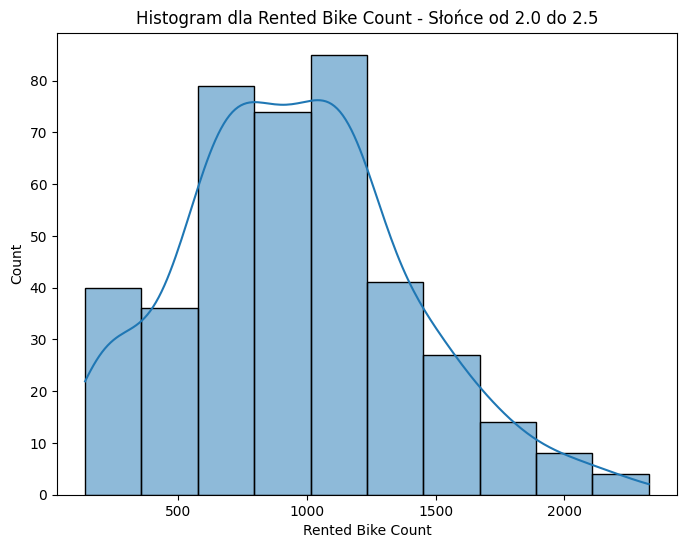

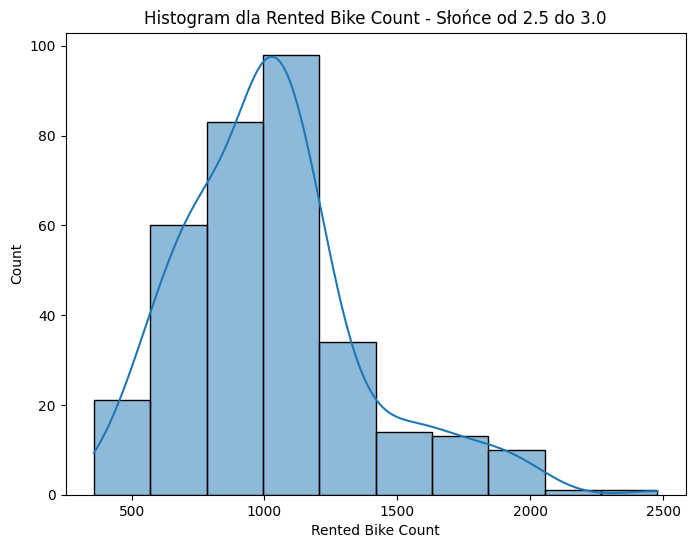

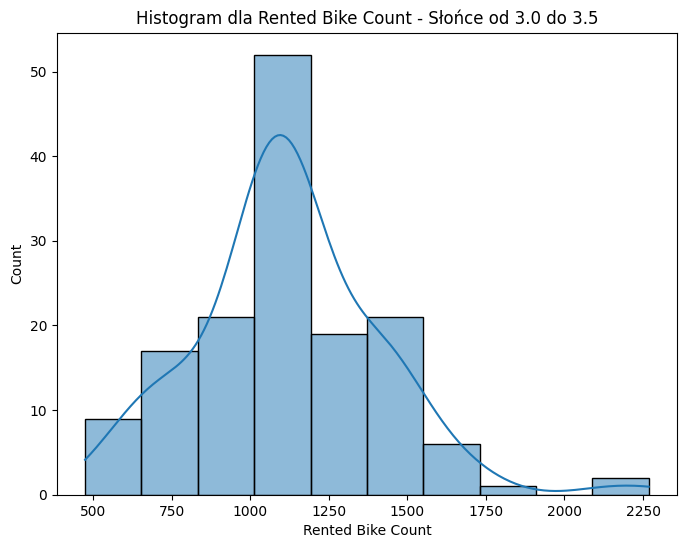

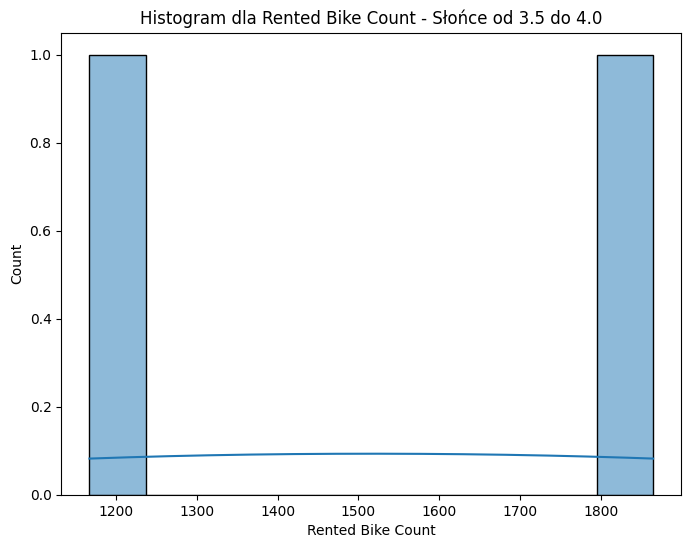

In [ ]:
# Tworzenie wykresów histogramów dla każdego przedziału temperatur
for sun_r in sun:
    df_temp = df[(df['Solar Radiation (MJ/m2)'] >= sun_r[0]) & (df['Solar Radiation (MJ/m2)'] < sun_r[1])]

    # Wykres histogramu
    plt.figure(figsize=(8, 6))
    sns.histplot(df_temp['Rented Bike Count'], bins=10, kde=True)
    plt.title(f'Histogram dla Rented Bike Count - Słońce od {sun_r[0]} do {sun_r[1]}')
    plt.show()

takie same wnioski jak w przypadku temperatur jednak nie ma za dużo słońca, aczkolwiek w ostatnim przedziale mamy mało wystąpień przez co histogram nie wygląda odpowiednio.

In [ ]:
# Inicjalizacja list na wartości statystyczne
mean_values = []
median_values = []
mode_values = []
std_dev_values = []
variance_values = []
range_values = []
q1_values = []
q3_values = []
skewness_values = []
kurtosis_values = []

# Obliczanie wartości dla każdego zakresu temperatur
for sun_r in sun:
    df_temp = df[(df['Solar Radiation (MJ/m2)'] >= sun_r[0]) & (df['Solar Radiation (MJ/m2)'] < sun_r[1])]

    mean_values.append(df_temp['Rented Bike Count'].mean())
    median_values.append(df_temp['Rented Bike Count'].median())
    mode_values.append(df_temp['Rented Bike Count'].mode()[0])
    std_dev_values.append(df_temp['Rented Bike Count'].std())
    variance_values.append(df_temp['Rented Bike Count'].var())
    range_values.append(df_temp['Rented Bike Count'].max() - df_temp['Rented Bike Count'].min())
    q1_values.append(df_temp['Rented Bike Count'].quantile(0.25))
    q3_values.append(df_temp['Rented Bike Count'].quantile(0.75))
    skewness_values.append(df_temp['Rented Bike Count'].skew())
    kurtosis_values.append(df_temp['Rented Bike Count'].kurtosis())

# Wypisywanie wartości
for i, sun_r in enumerate(sun):
    print(f"Zakres temperatury od {sun_r[0]} do {sun_r[1]}:")
    print(f"Średnia: {mean_values[i]}")
    print(f"Mediana: {median_values[i]}")
    print(f"Modalna: {mode_values[i]}")
    print(f"Odchylenie standardowe: {std_dev_values[i]}")
    print(f"Wariancja: {variance_values[i]}")
    print(f"Zakres: {range_values[i]}")
    print(f"Kwartyl 1: {q1_values[i]}")
    print(f"Kwartyl 3: {q3_values[i]}")
    print(f"Skośność: {skewness_values[i]}")
    print(f"Kurtoza: {kurtosis_values[i]}")
    print()

Zakres temperatury od 0.0 do 0.5:
Średnia: 602.246645480226
Mediana: 346.5
Modalna: 122
Odchylenie standardowe: 614.5969712946354
Wariancja: 377729.43712453893
Zakres: 3296
Kwartyl 1: 157.0
Kwartyl 3: 864.25
Skośność: 1.378916847294917
Kurtoza: 1.136898638126775

Zakres temperatury od 0.5 do 1.0:
Średnia: 935.5530012771392
Mediana: 664.0
Modalna: 278
Odchylenie standardowe: 781.3657918695292
Wariancja: 610532.5007038964
Zakres: 3536
Kwartyl 1: 307.5
Kwartyl 3: 1320.0
Skośność: 1.1102519118984253
Kurtoza: 0.34225358644117776

Zakres temperatury od 1.0 do 1.5:
Średnia: 987.9538950715421
Mediana: 854.0
Modalna: 189
Odchylenie standardowe: 724.016305706077
Wariancja: 524199.6109282755
Zakres: 3340
Kwartyl 1: 392.0
Kwartyl 3: 1283.0
Skośność: 1.0694067431678969
Kurtoza: 0.6641300163003216

Zakres temperatury od 1.5 do 2.0:
Średnia: 1017.9193548387096
Mediana: 925.5
Modalna: 752
Odchylenie standardowe: 517.4765905488359
Wariancja: 267782.0217660476
Zakres: 2903
Kwartyl 1: 685.5
Kwartyl 3: 12

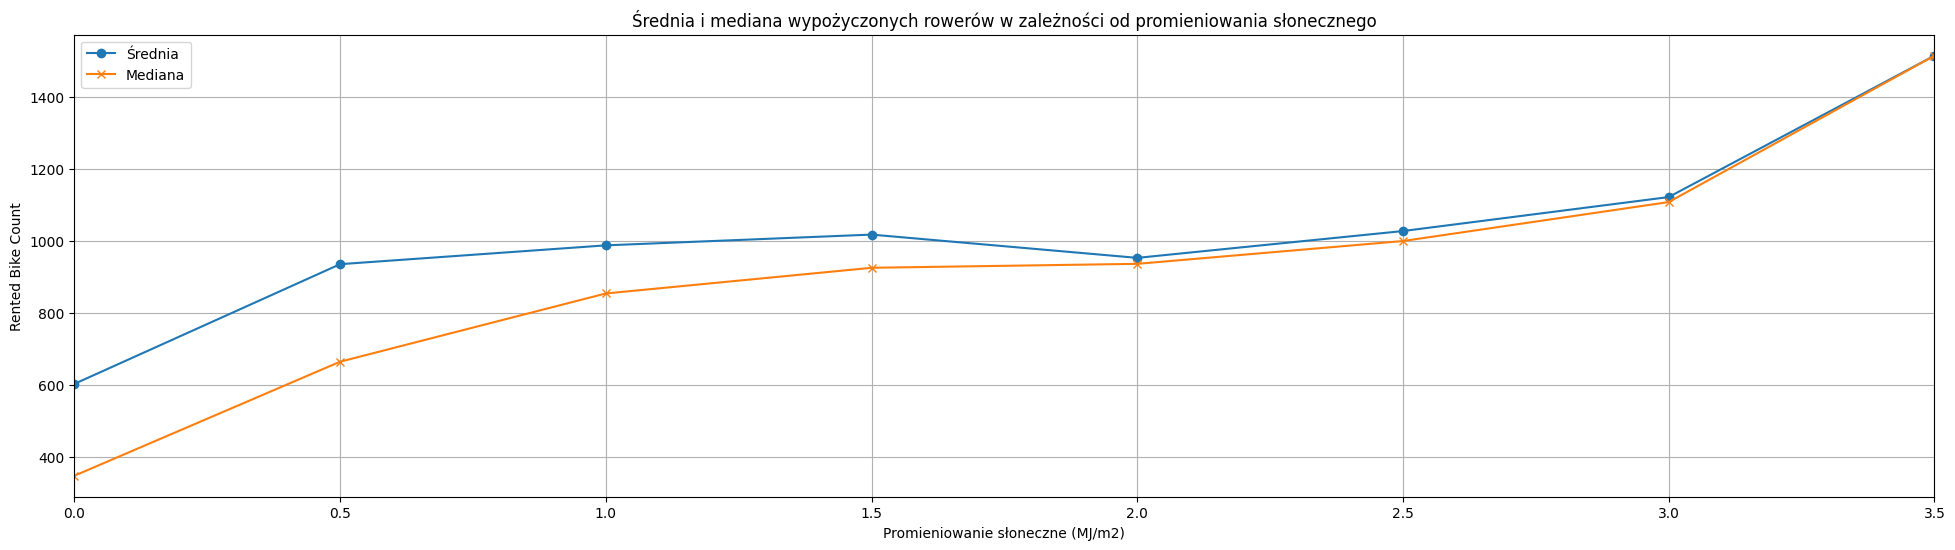

In [ ]:
# Inicjalizacja list na wartości średniej i mediany
mean_values = []
median_values = []

# Zakres promieniowania słonecznego
sun = [(x, x + 0.5) for x in np.arange(0, 4, 0.5)]

# Obliczanie wartości dla każdego poziomu promieniowania słonecznego
for solar_radiation in sun:
    df_temp = df[(df['Solar Radiation (MJ/m2)'] >= solar_radiation[0]) & (df['Solar Radiation (MJ/m2)'] < solar_radiation[1])]
    mean_values.append(df_temp['Rented Bike Count'].mean())
    median_values.append(df_temp['Rented Bike Count'].median())

# Tworzenie wykresu
plt.figure(figsize=(24, 6))
plt.plot([x[0] for x in sun], mean_values, marker='o', label='Średnia')
plt.plot([x[0] for x in sun], median_values, marker='x', label='Mediana')
plt.xlabel('Promieniowanie słoneczne (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.title('Średnia i mediana wypożyczonych rowerów w zależności od promieniowania słonecznego')
plt.xlim(0, 3.5)
plt.legend()
plt.grid(True)
plt.show()


jak wcześniej się domyślaliśmy im więcej słońca tym więcej wypożyczeń

In [ ]:
df['Hour'].min()

0

In [ ]:
df['Hour'].max()

23

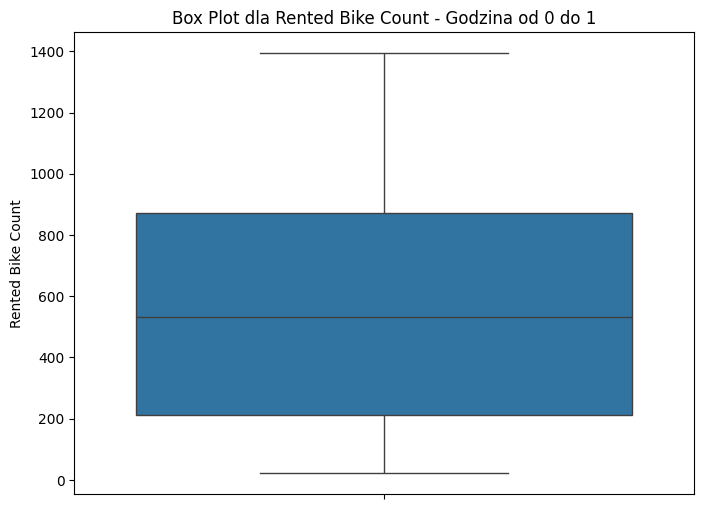

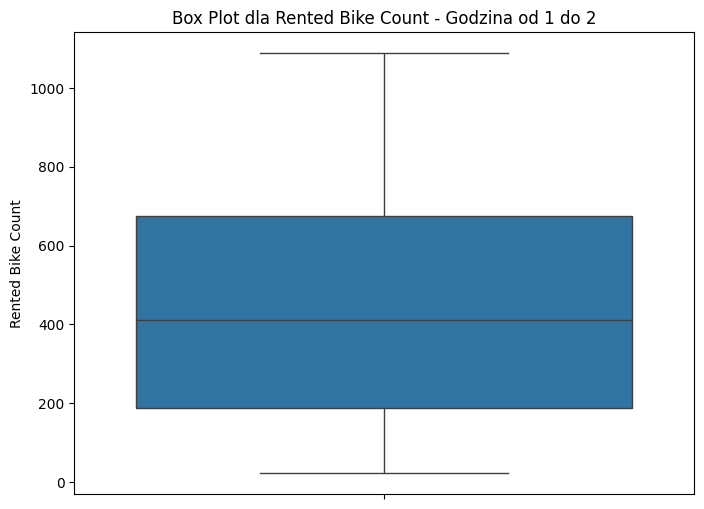

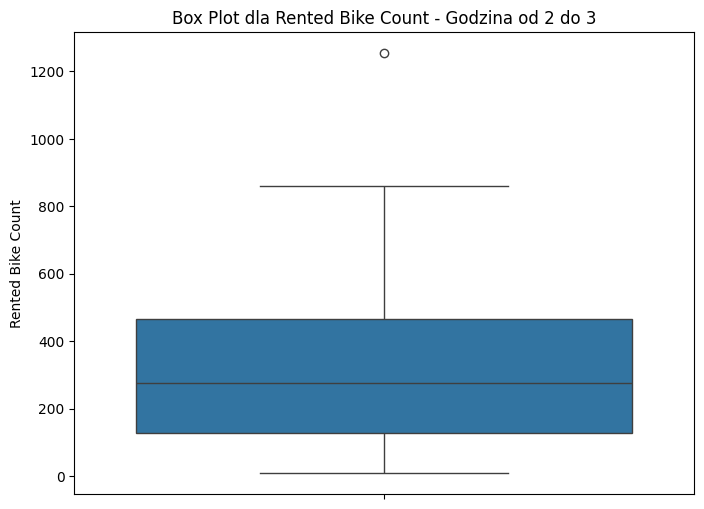

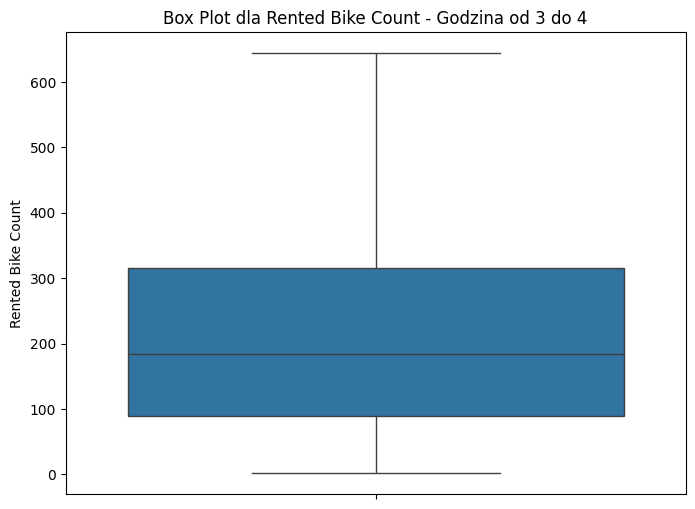

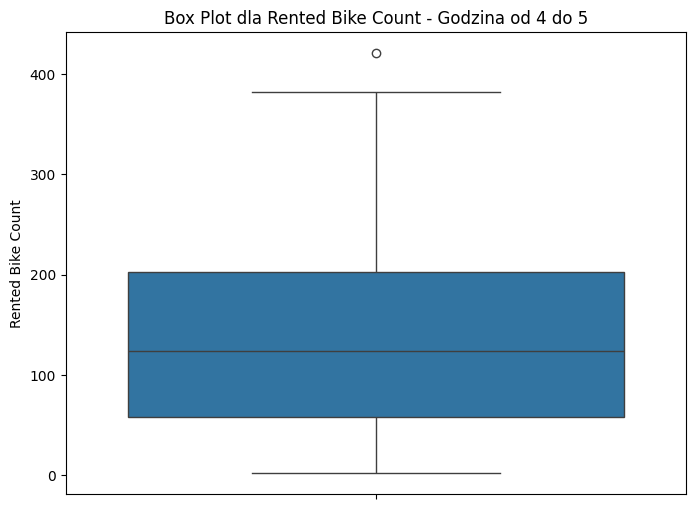

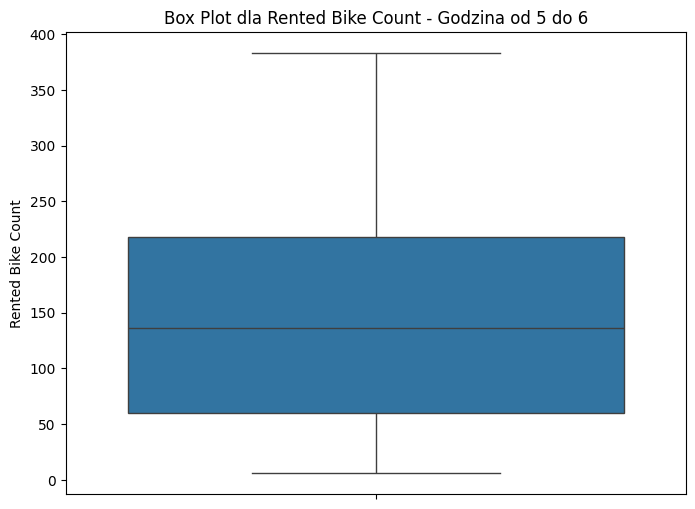

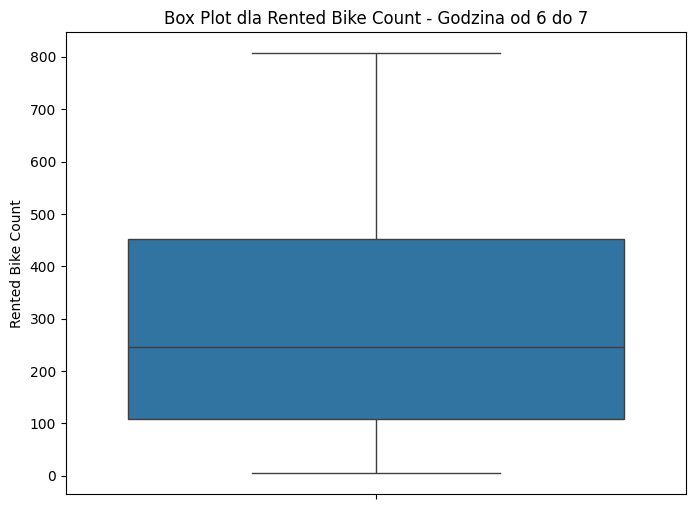

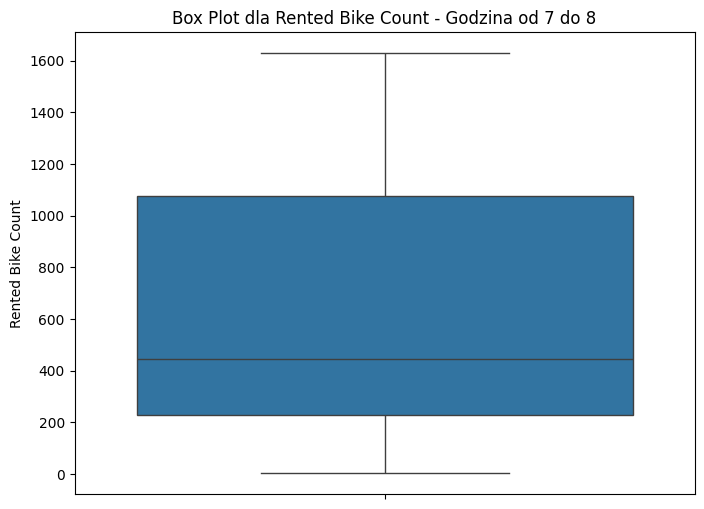

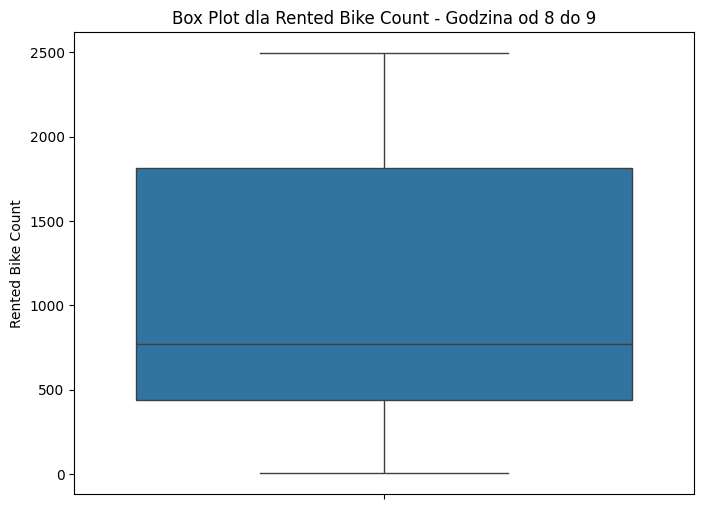

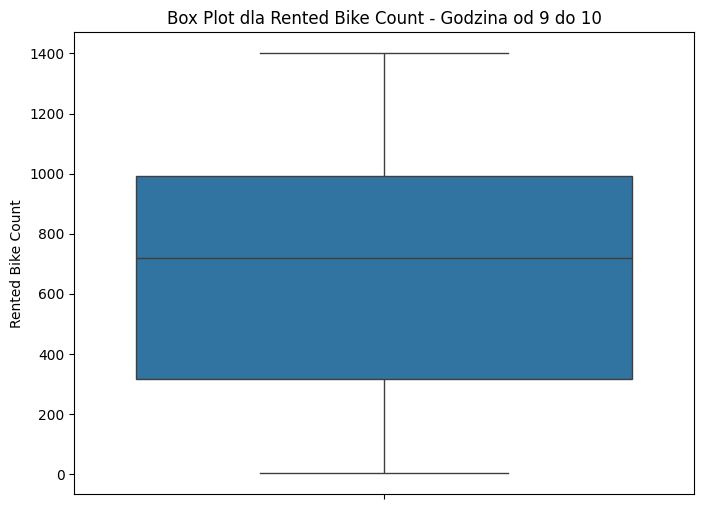

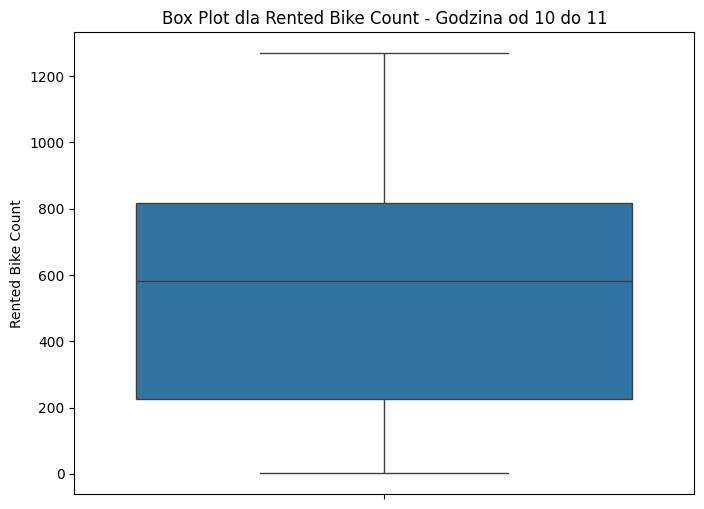

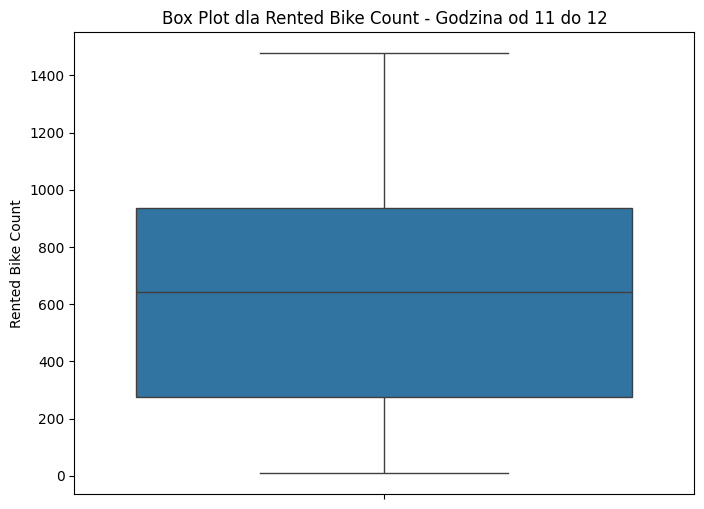

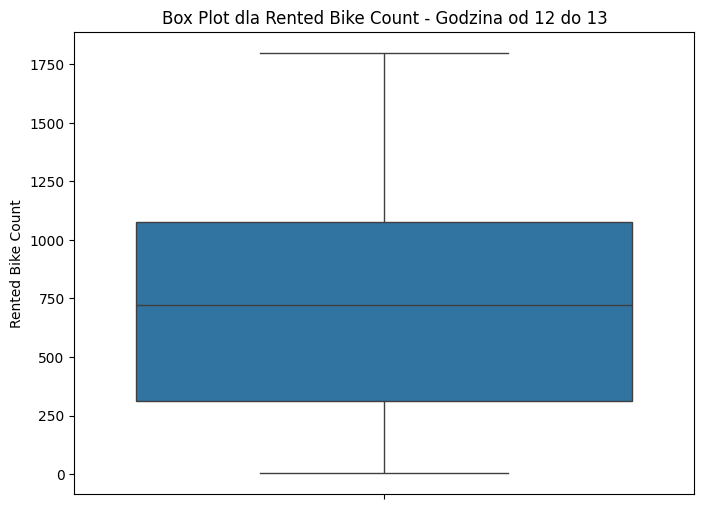

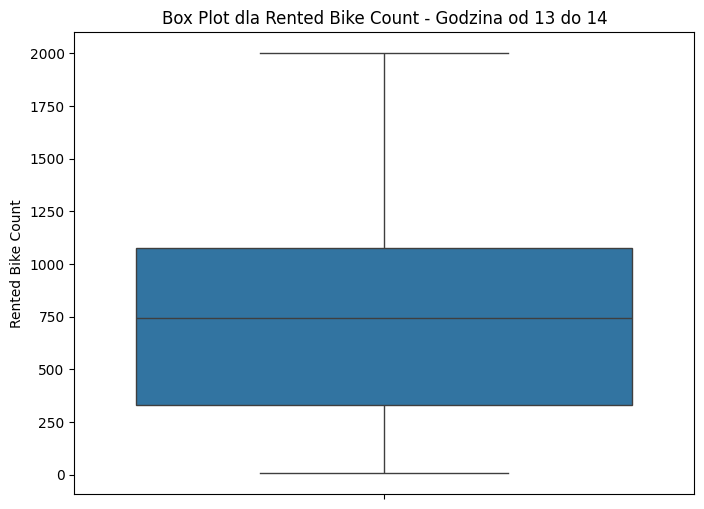

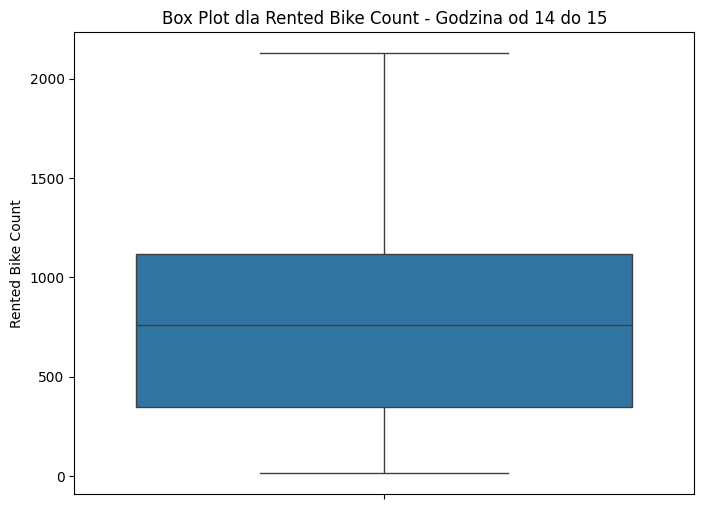

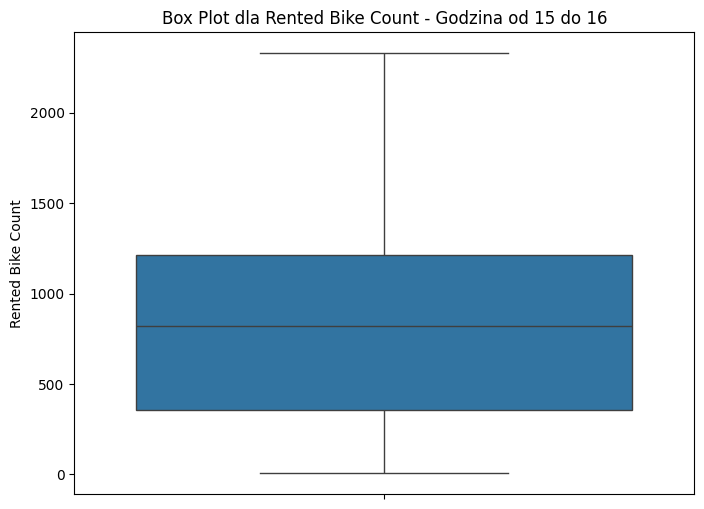

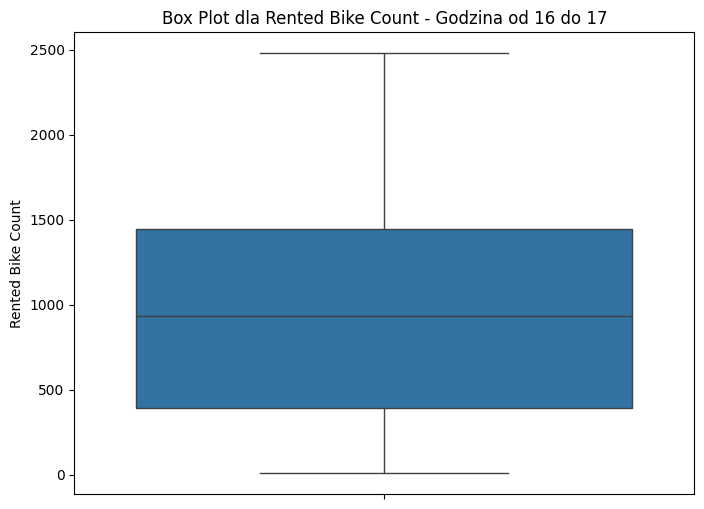

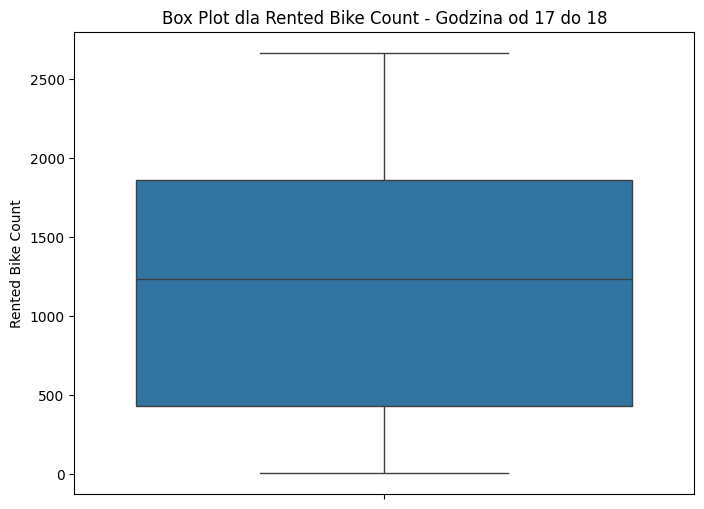

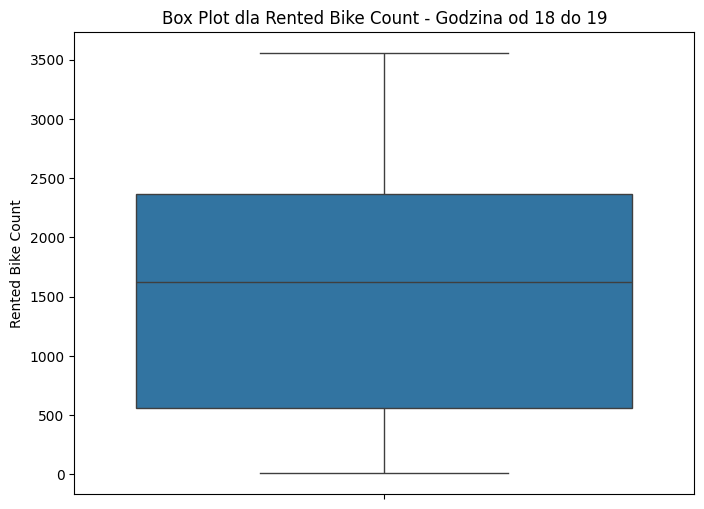

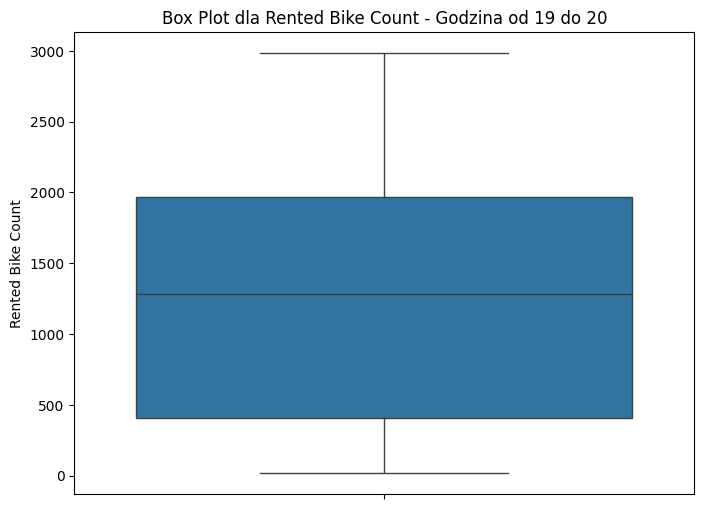

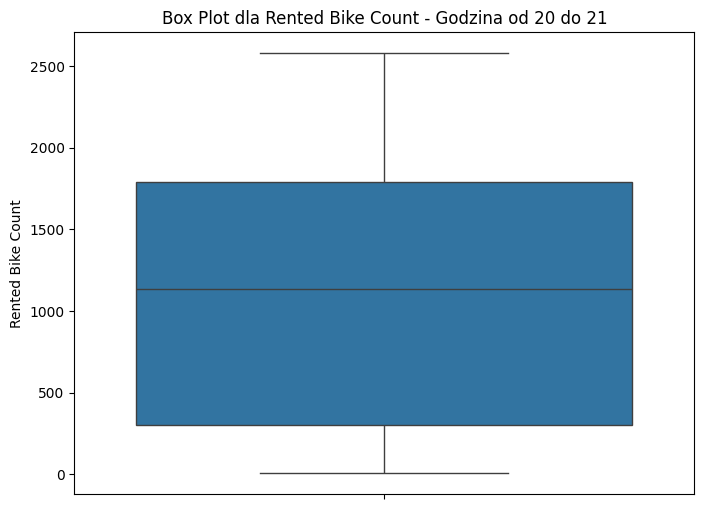

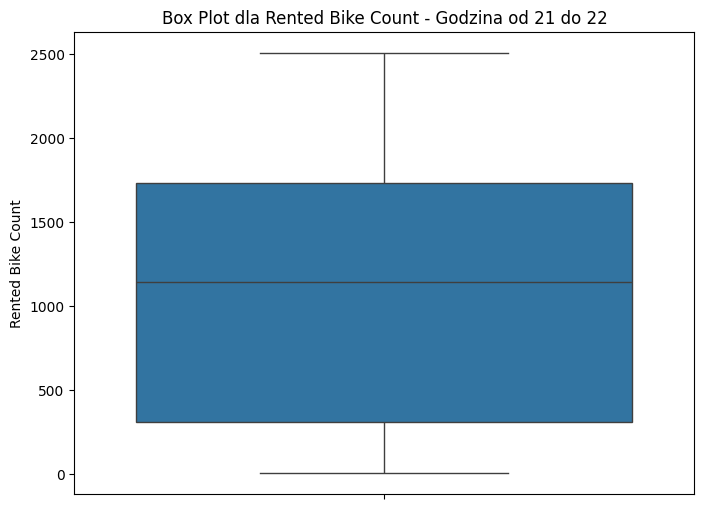

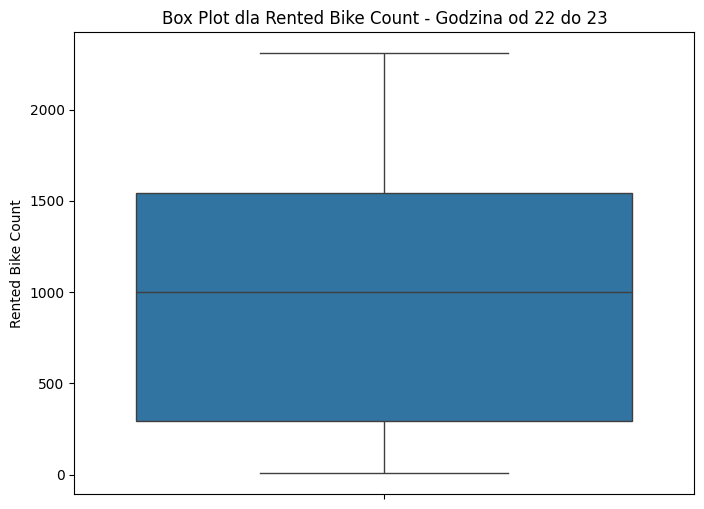

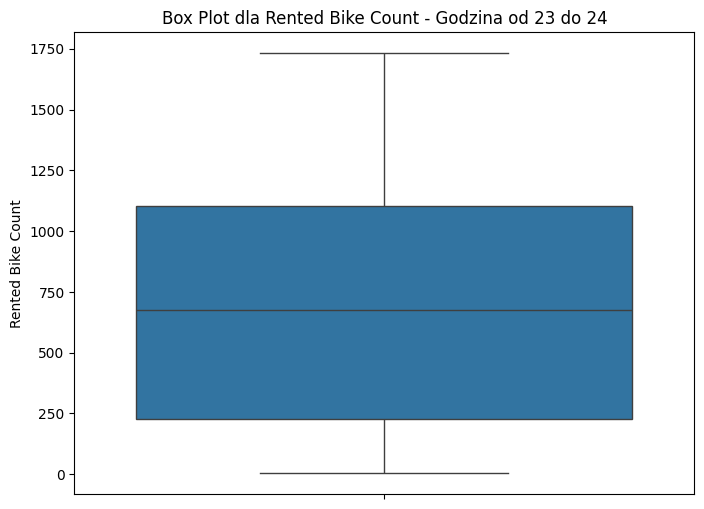

In [ ]:
# Zakres godzin
hour_ranges = [(x, x + 1) for x in range(24)]

# Tworzenie wykresów dla każdego przedziału godzin
for hour_range in hour_ranges:
    df_hour = df[(df['Hour'] >= hour_range[0]) & (df['Hour'] < hour_range[1])]

    # Wykres ramka-wąsy
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_hour['Rented Bike Count'])
    plt.title(f'Box Plot dla Rented Bike Count - Godzina od {hour_range[0]} do {hour_range[1]}')
    plt.show()


mediany są mocno zależne od godziny, z racji bycia zmienną opisową nie ma bezpośredniej korelacji

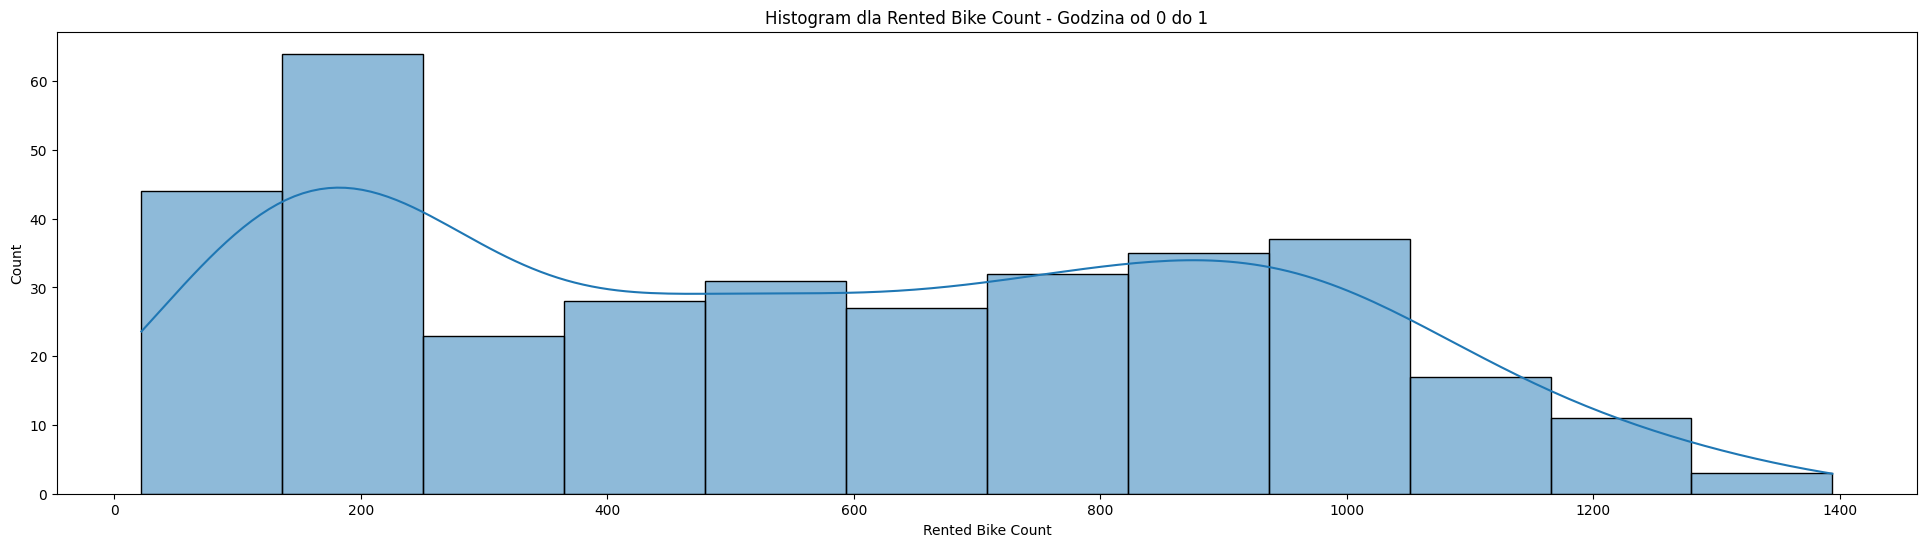

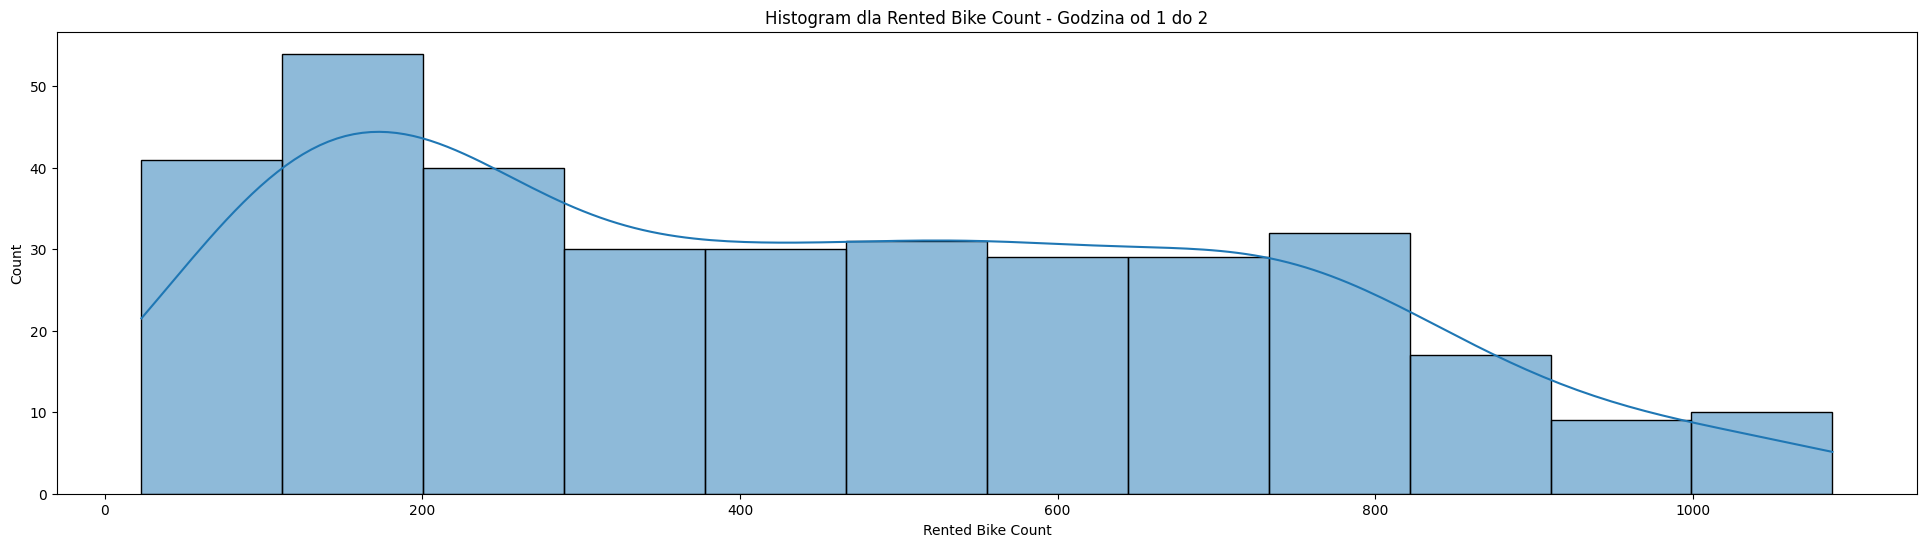

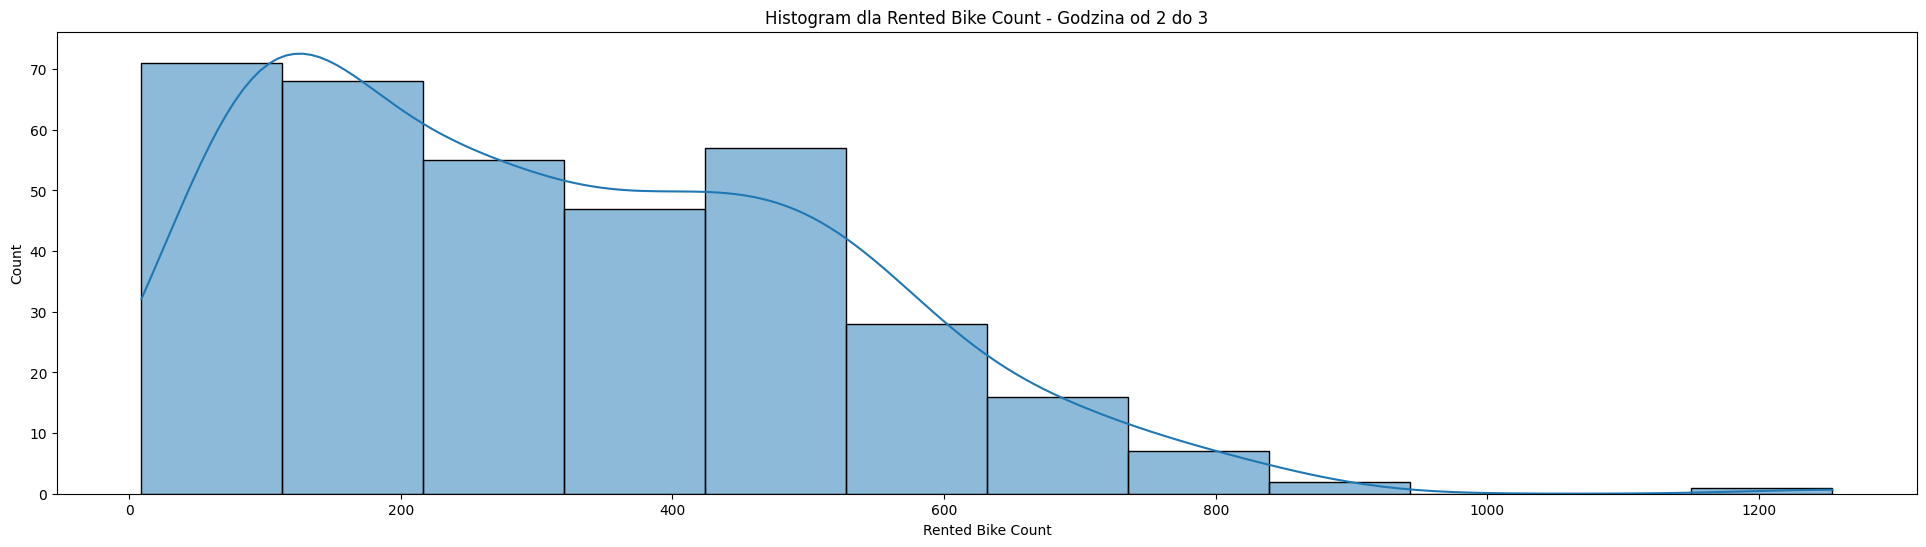

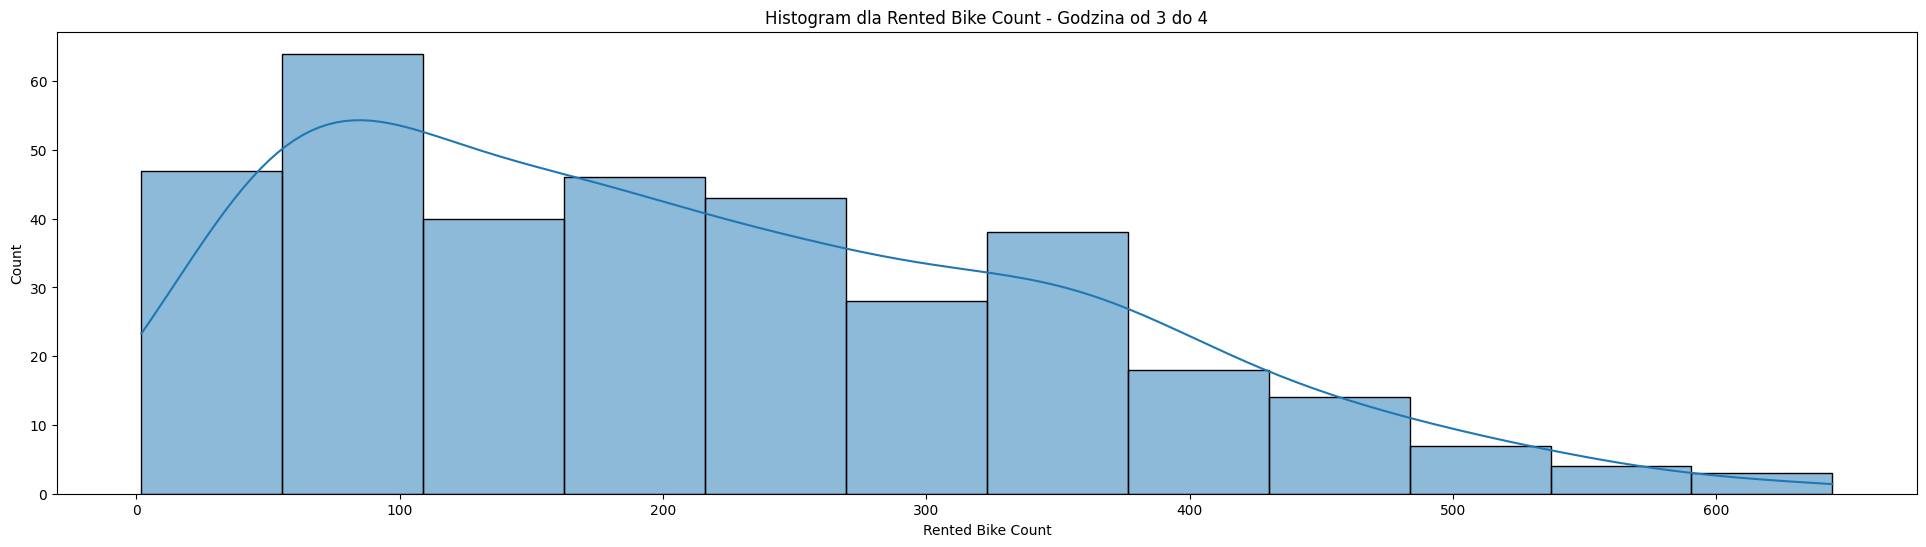

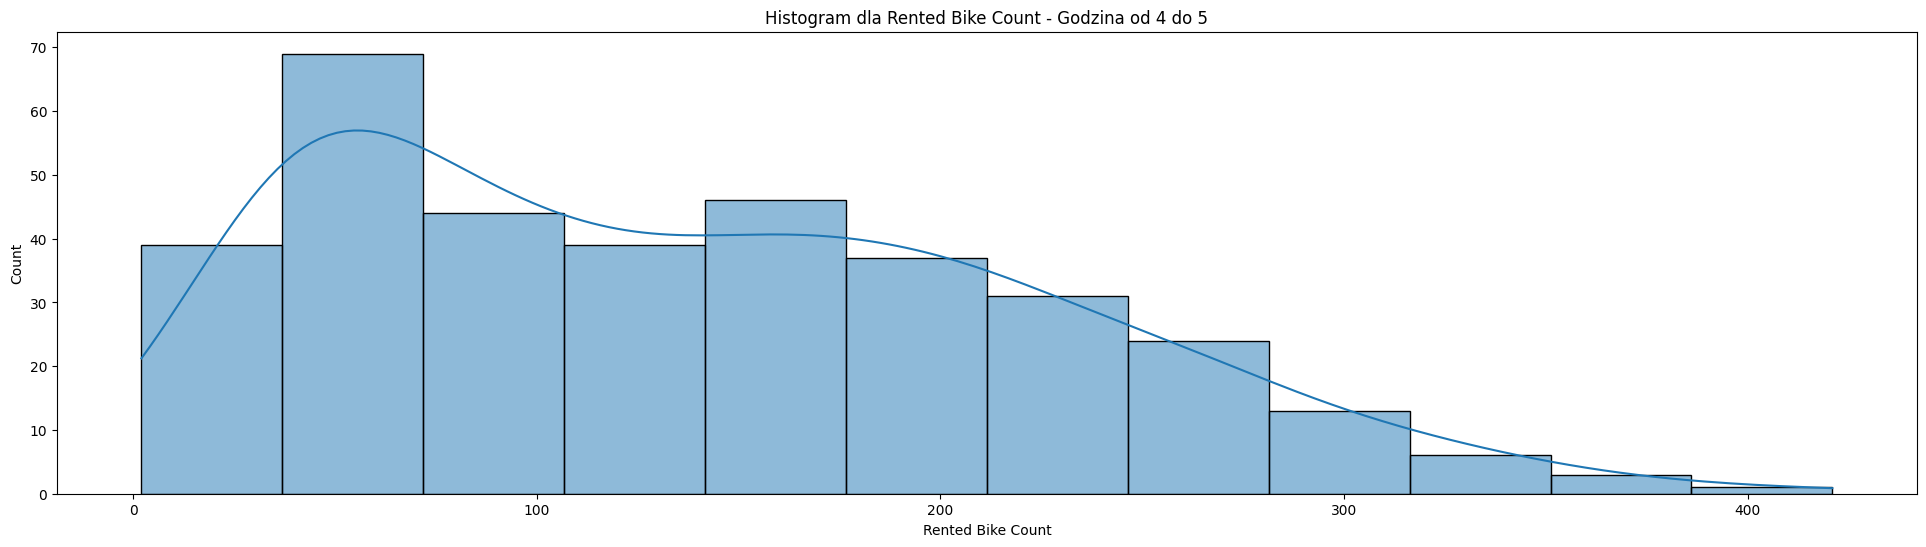

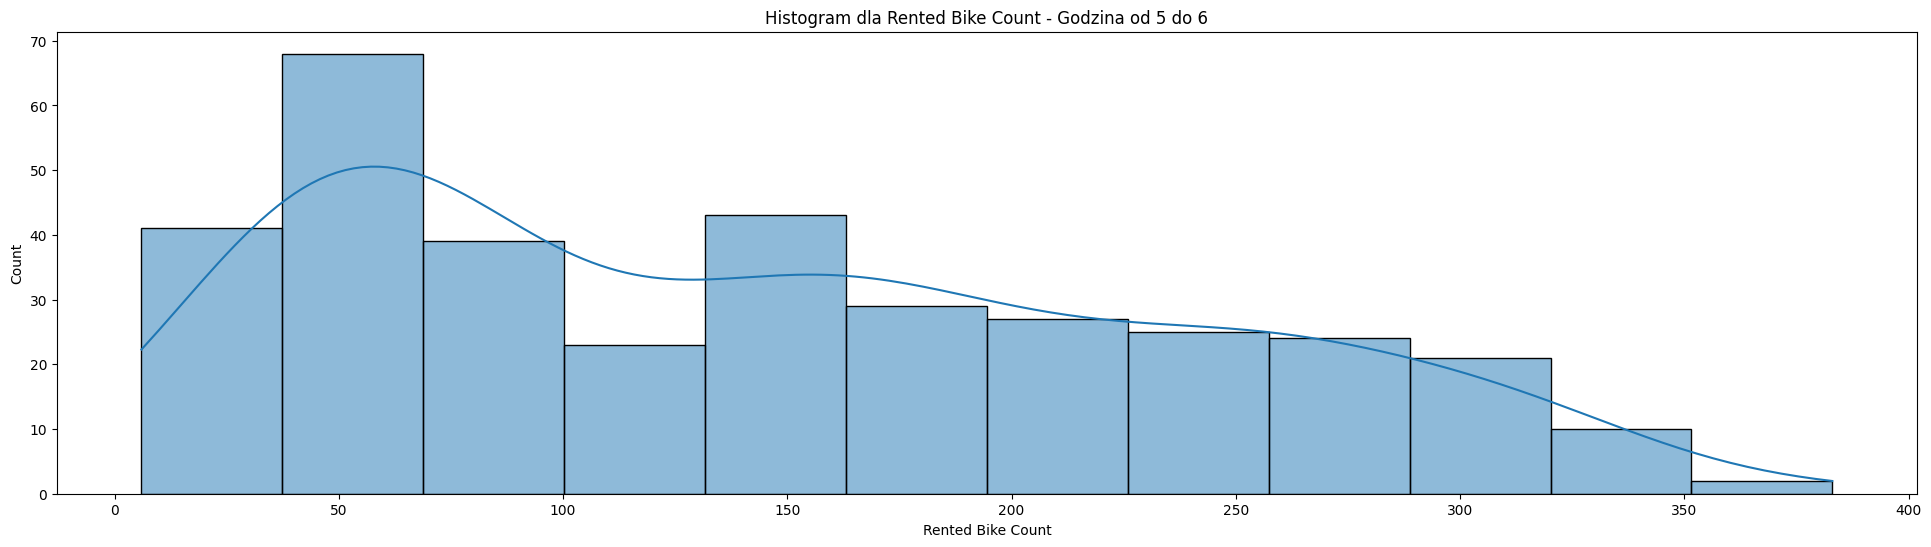

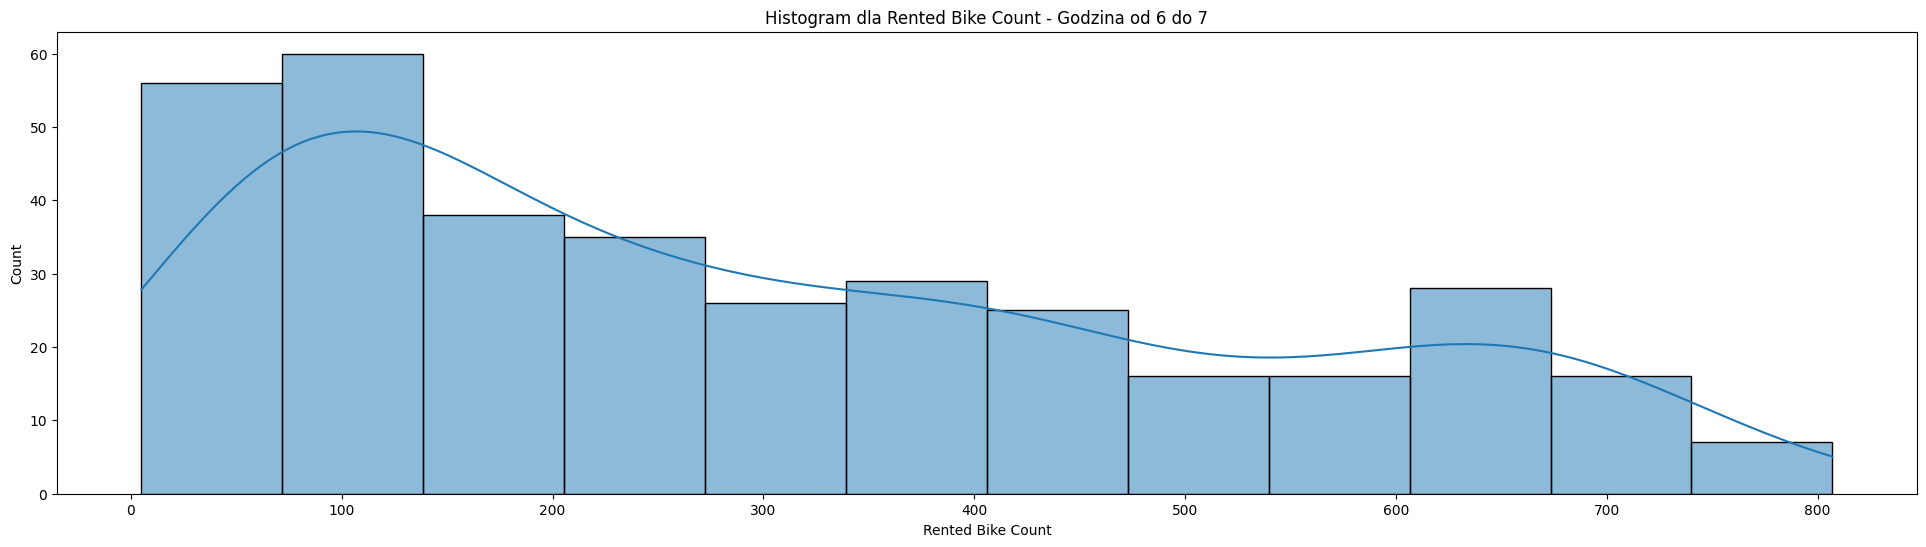

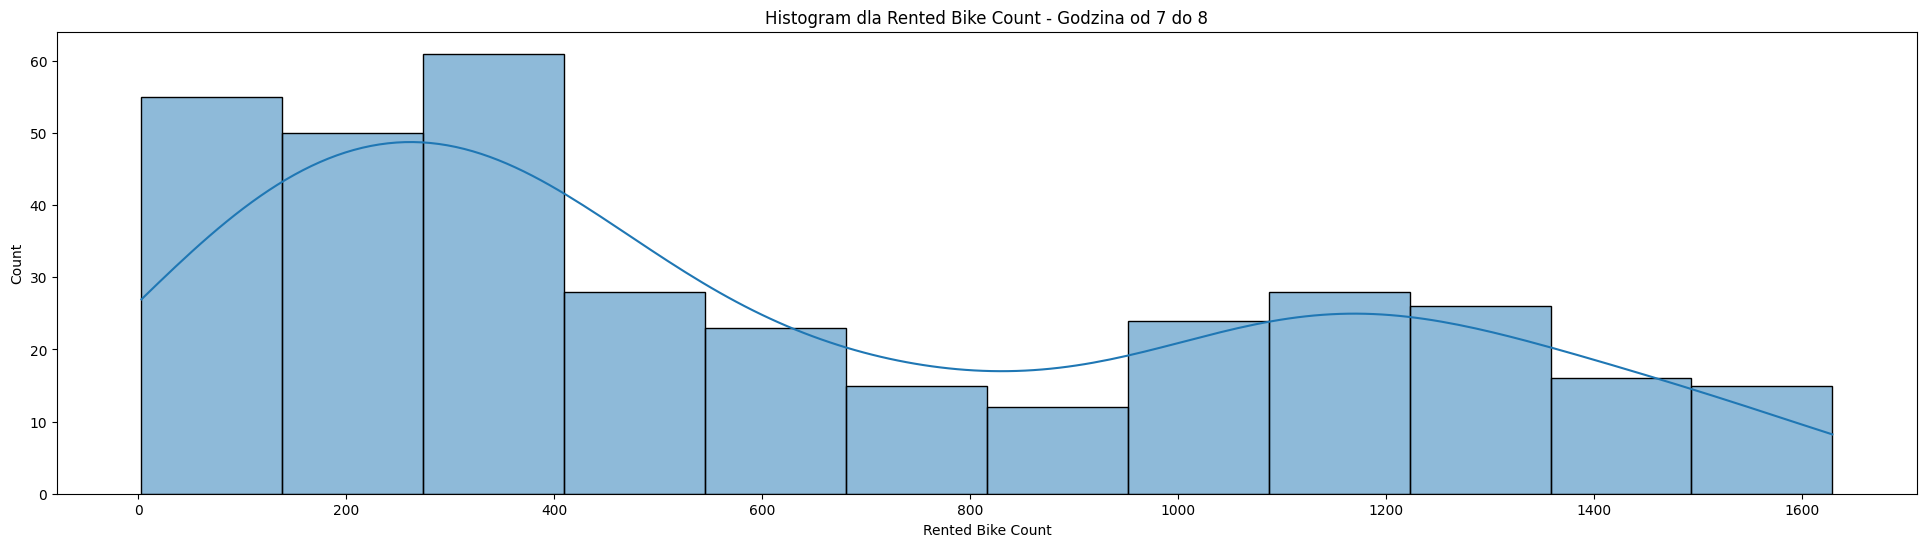

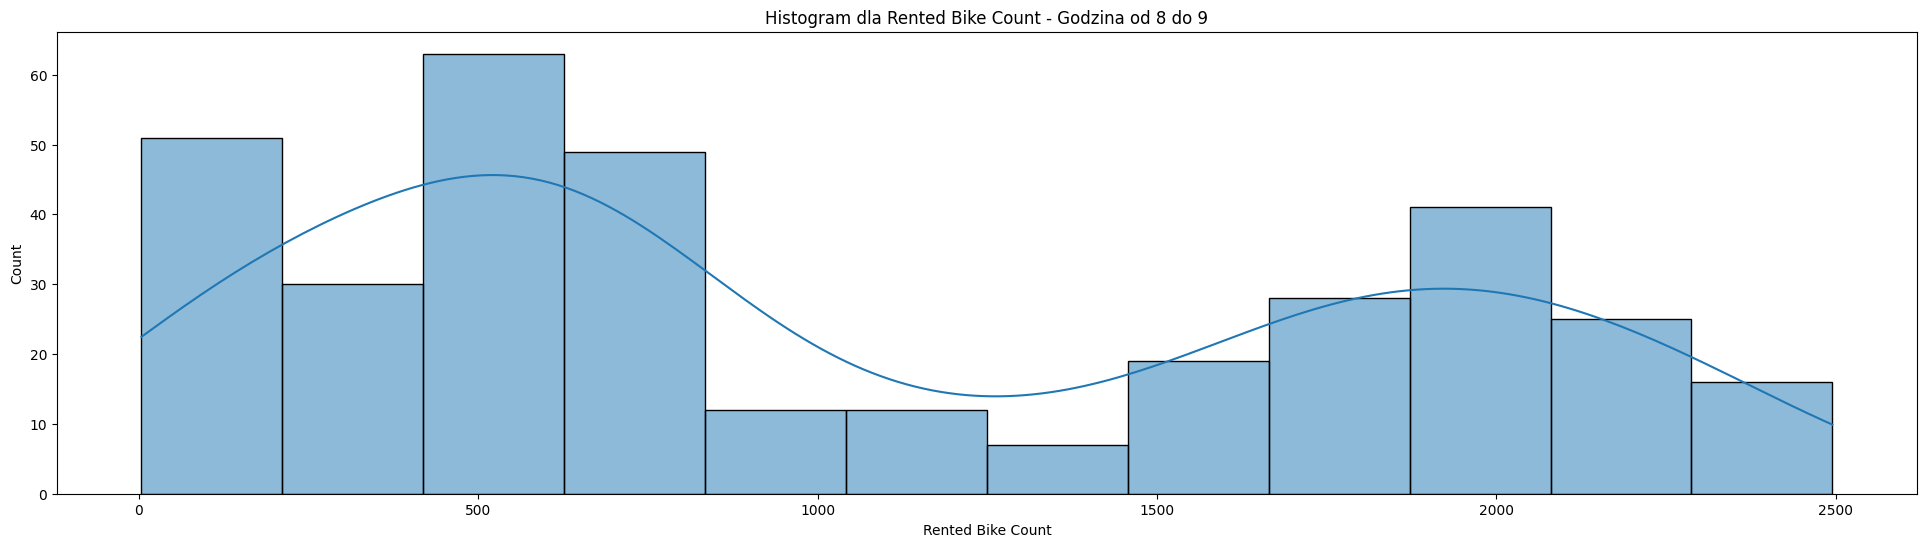

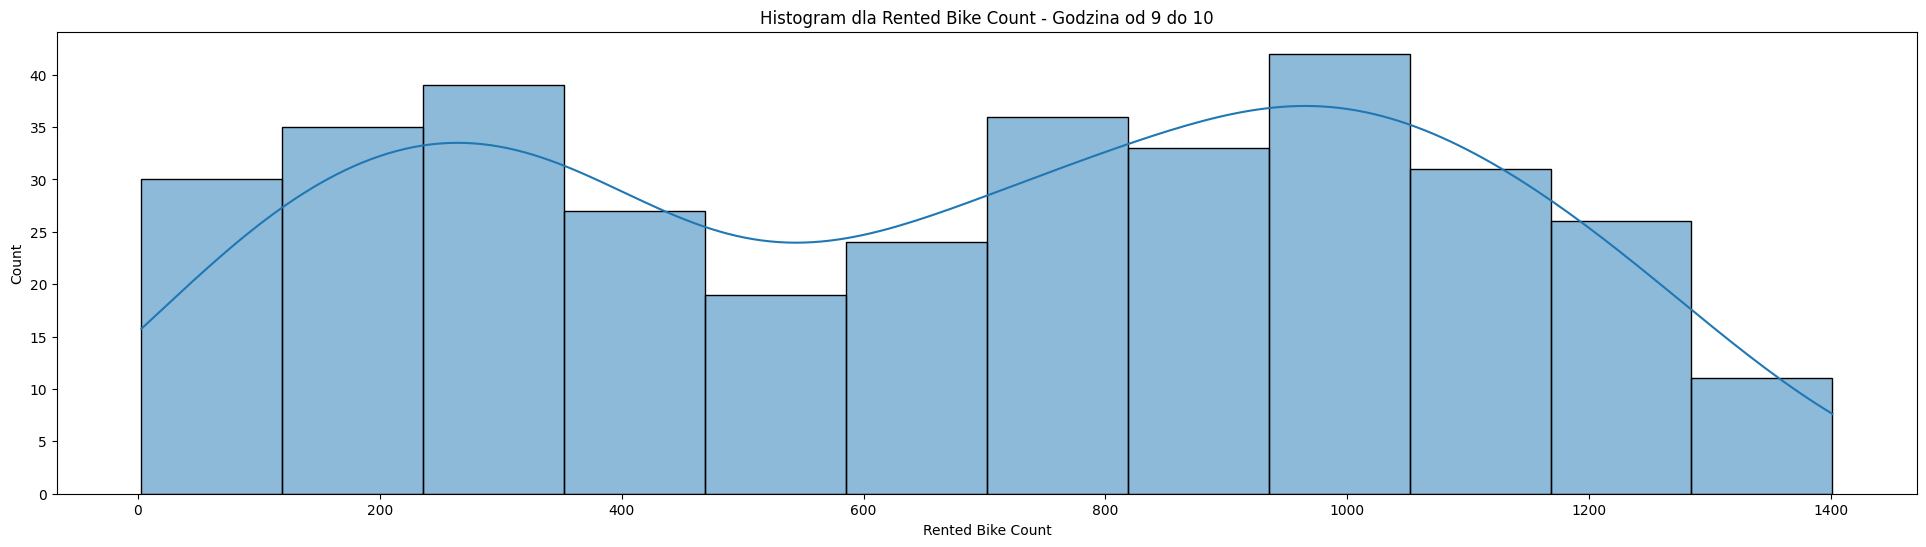

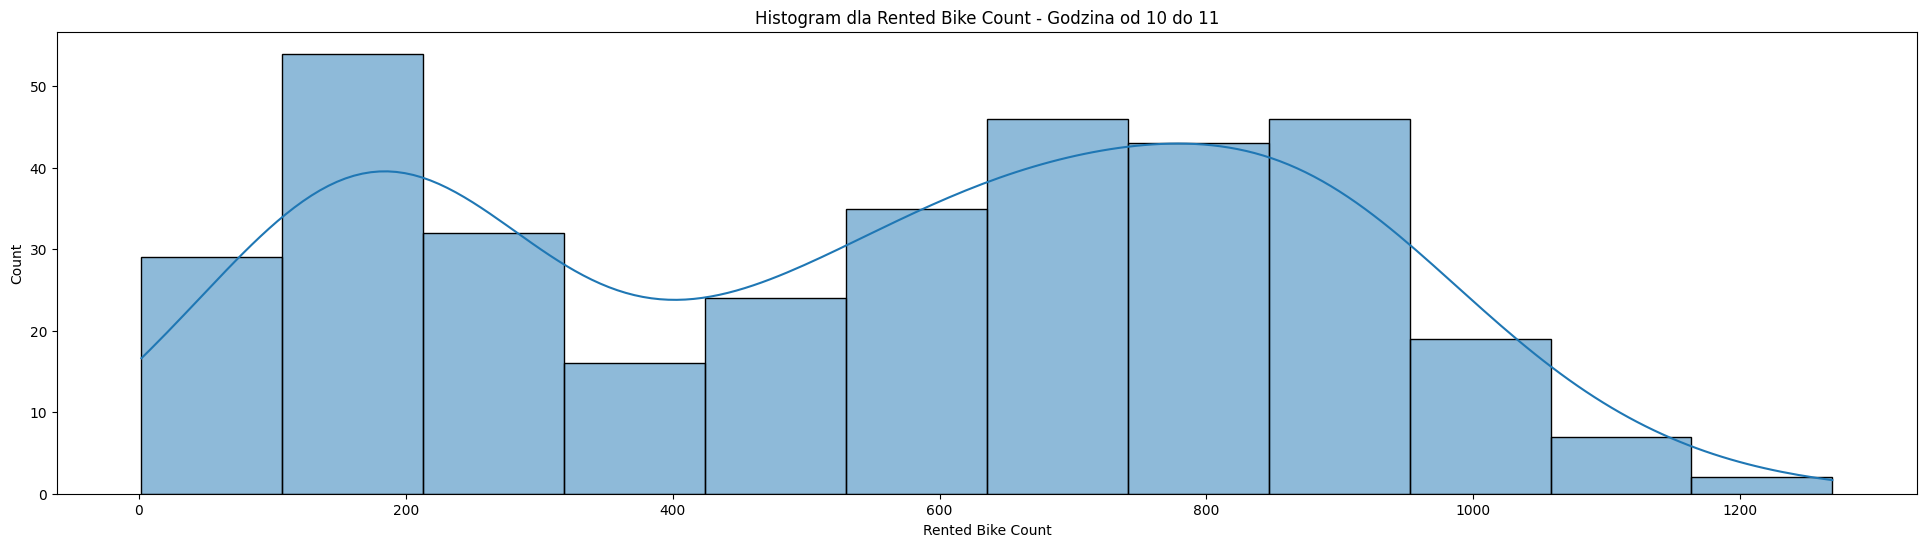

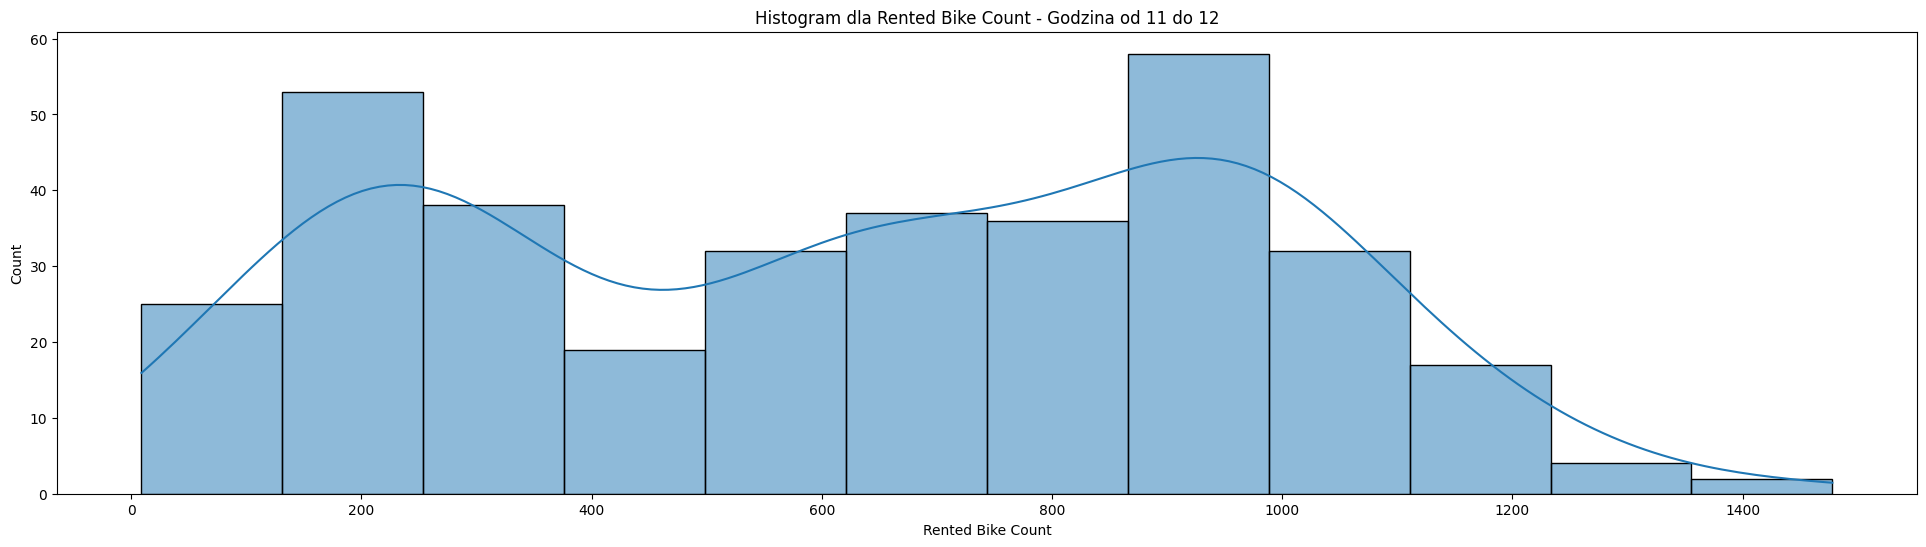

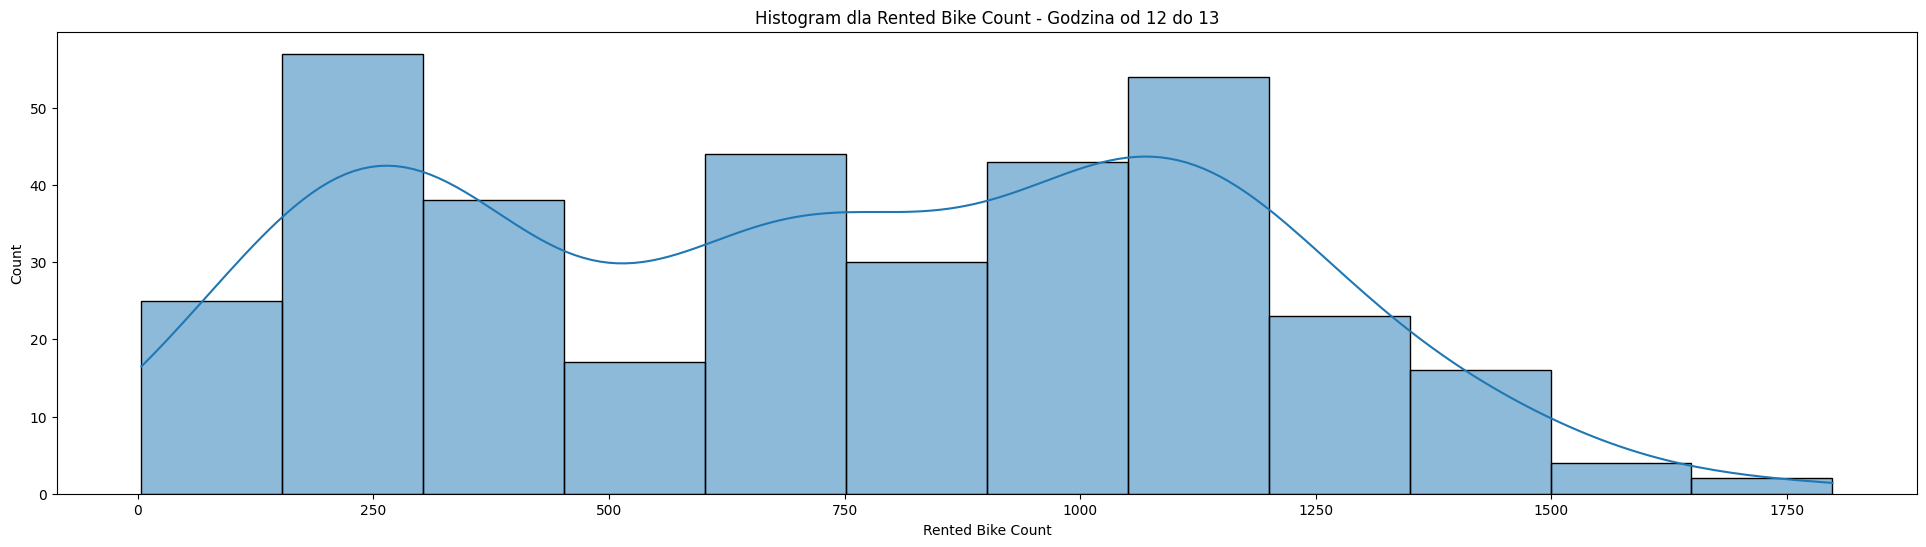

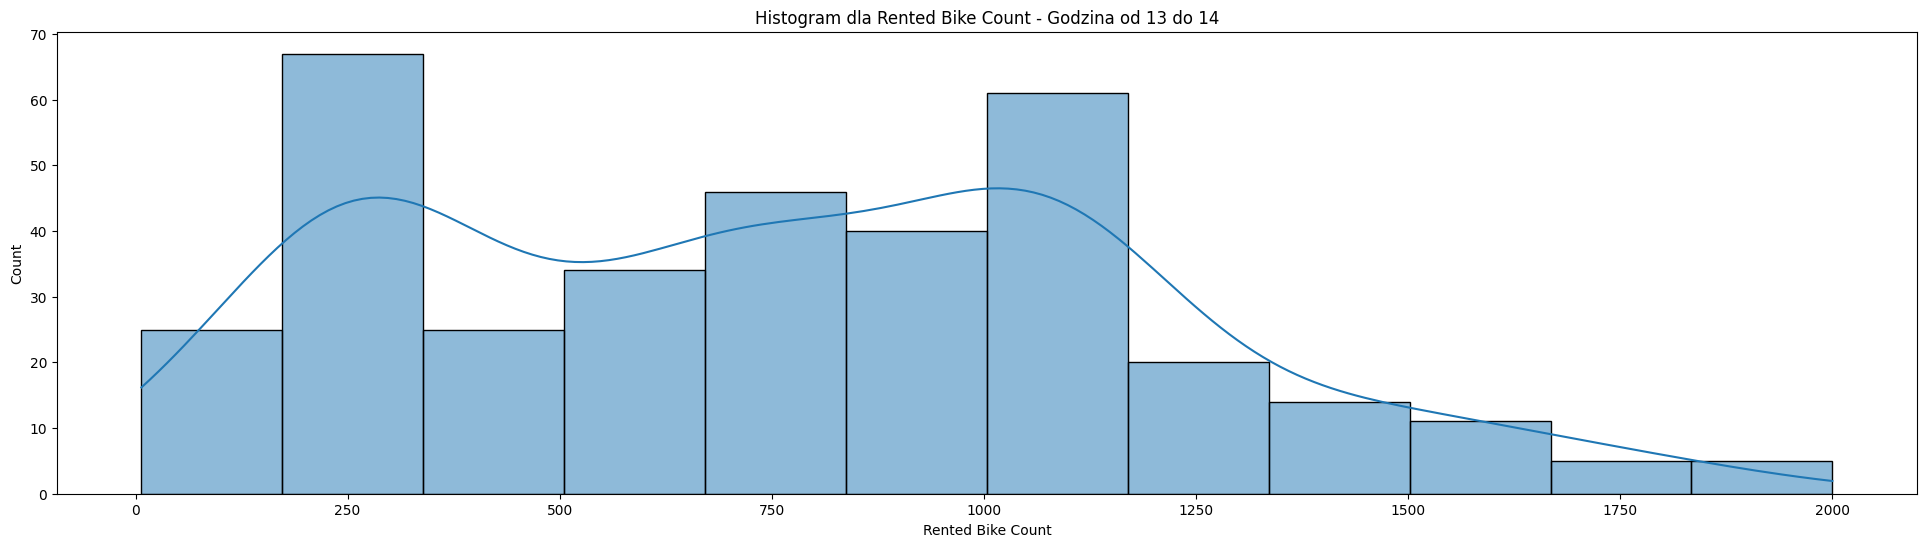

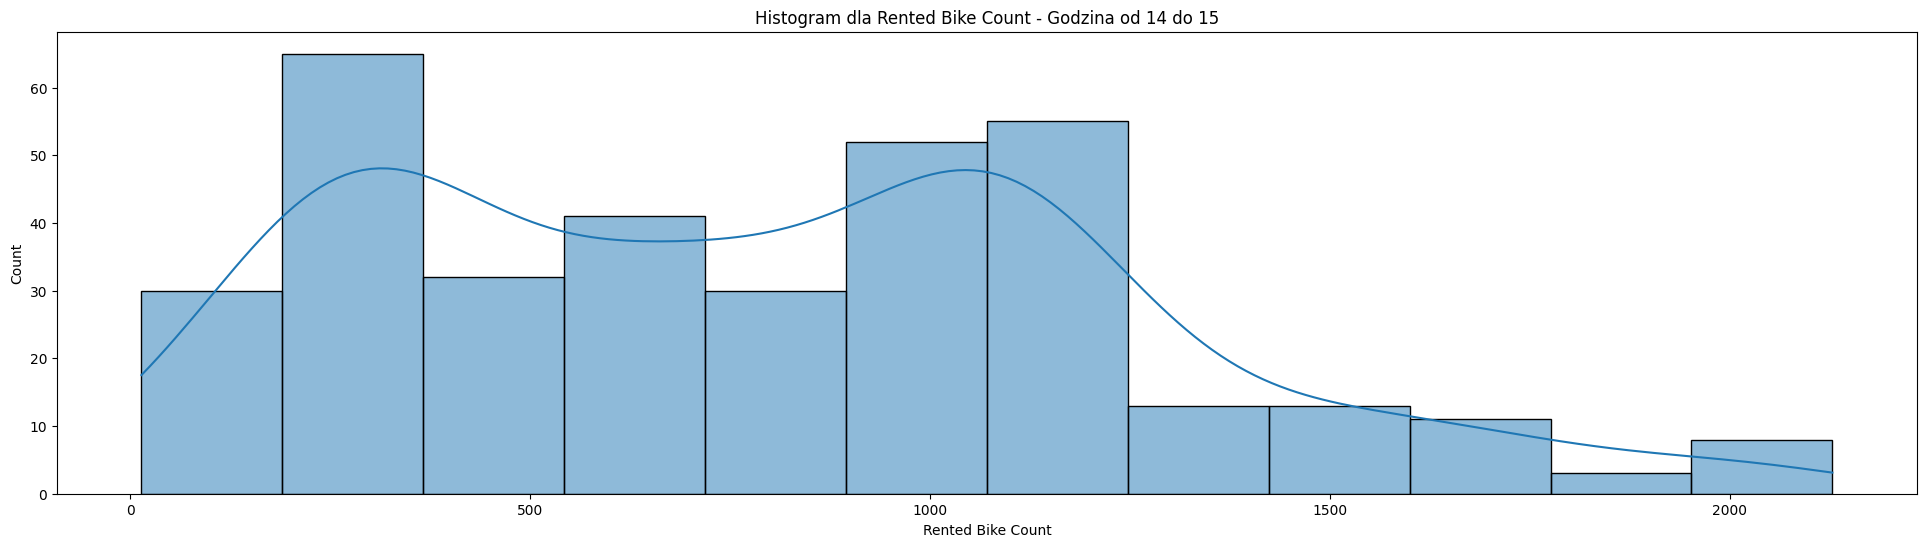

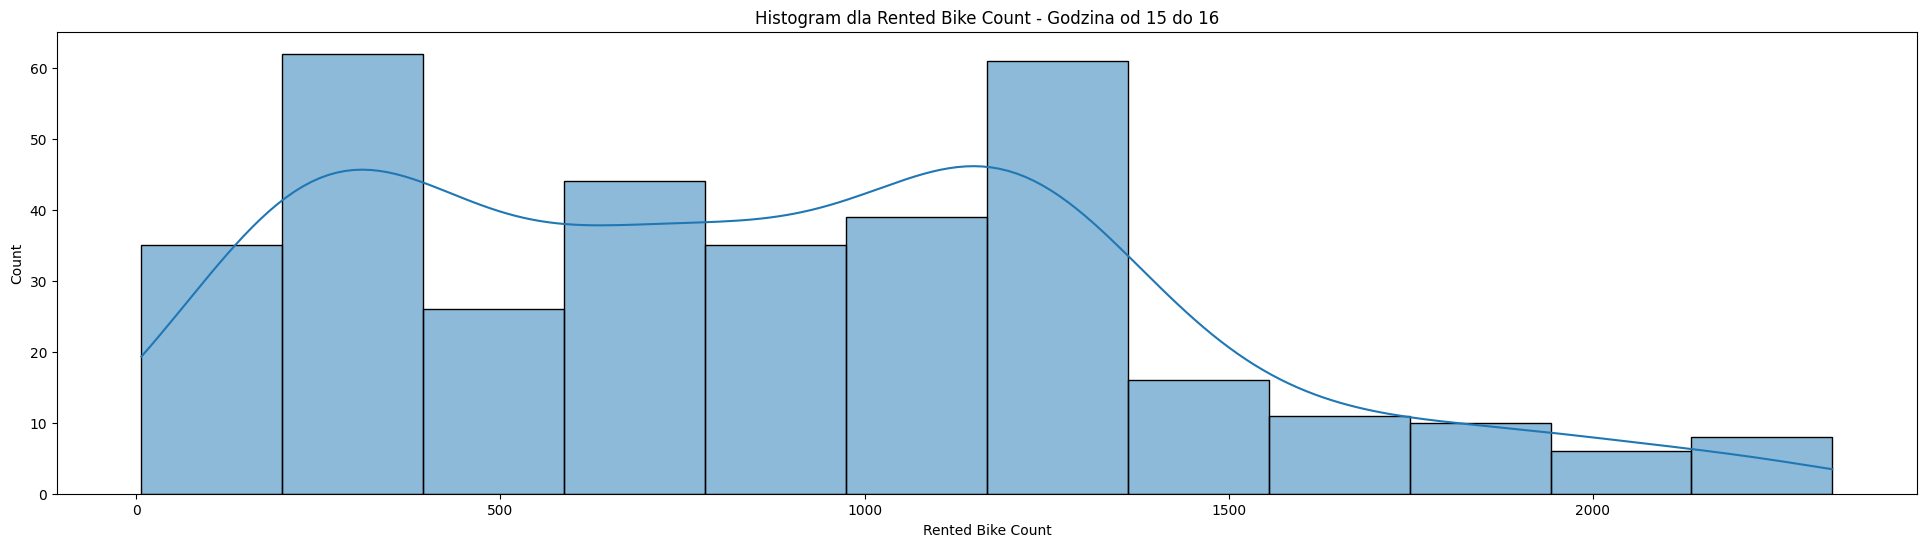

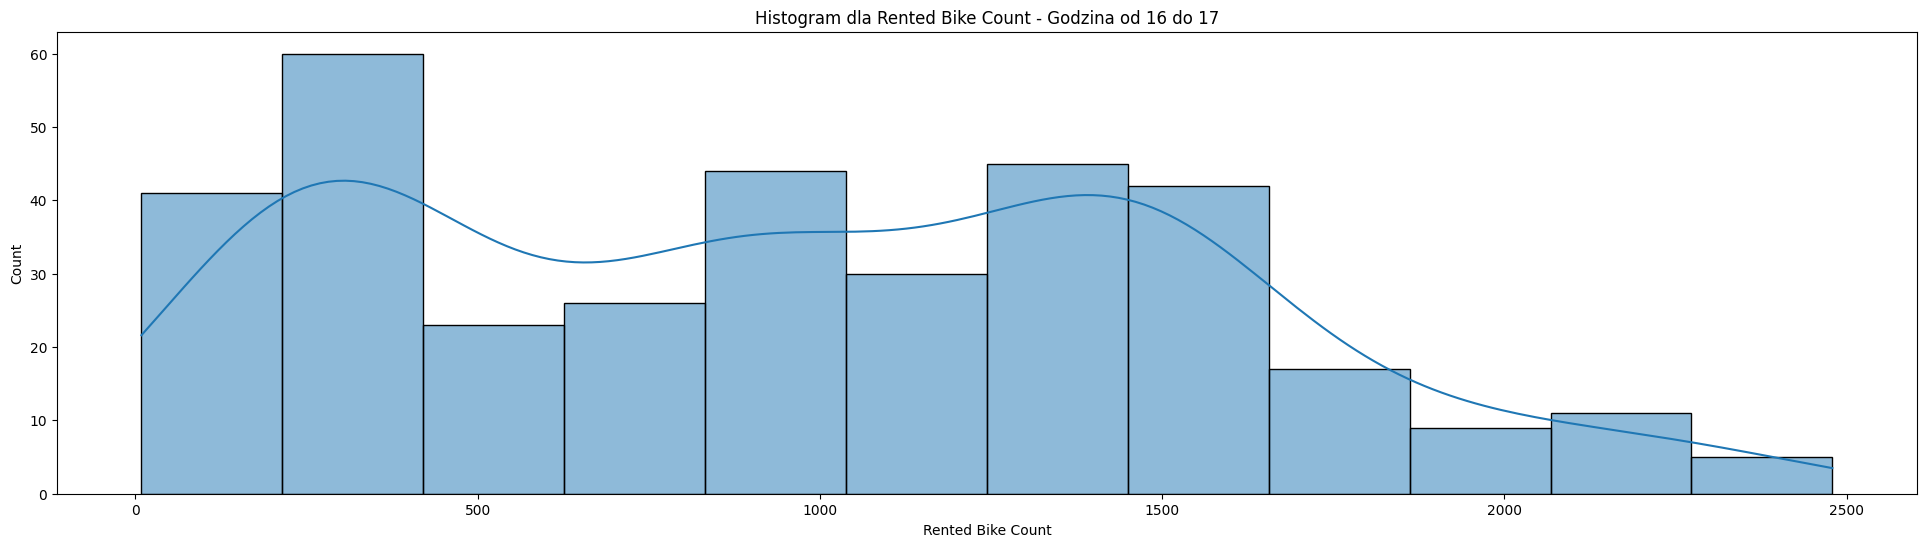

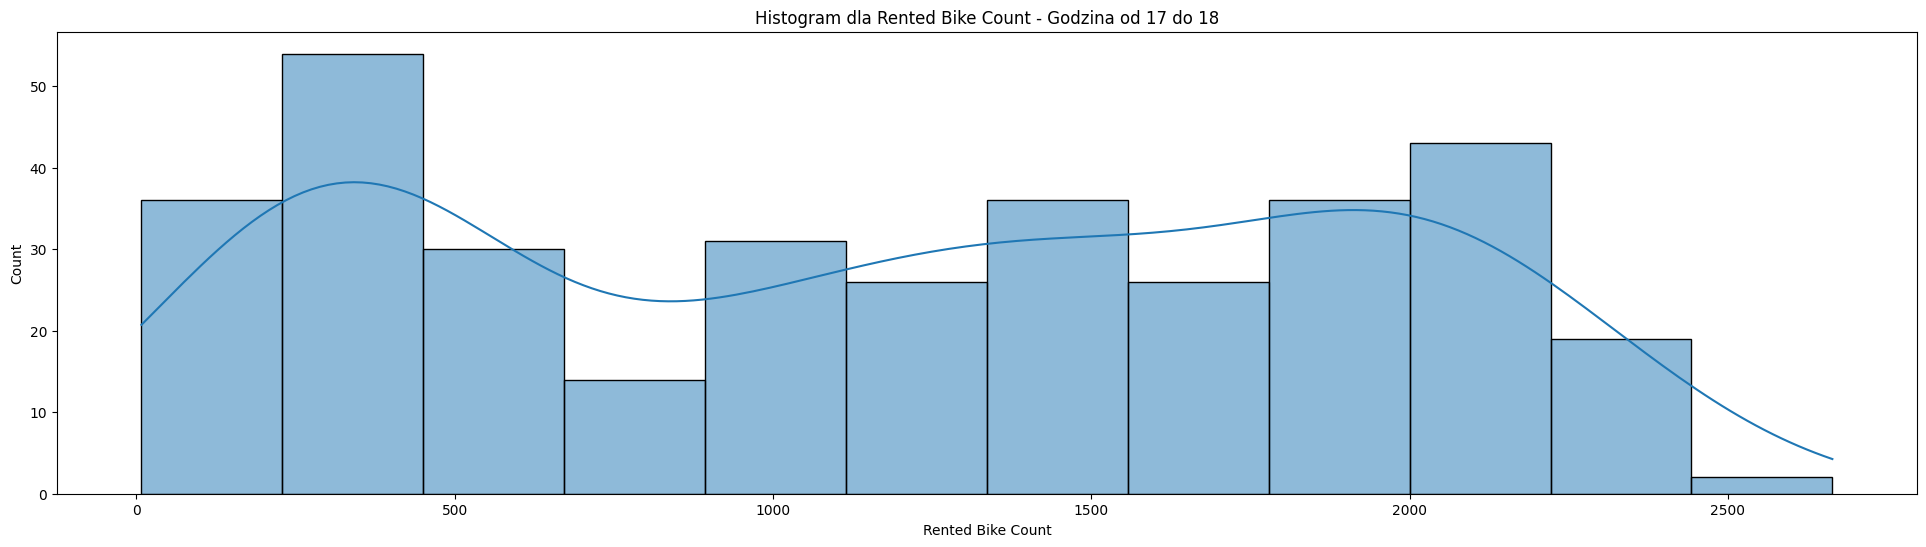

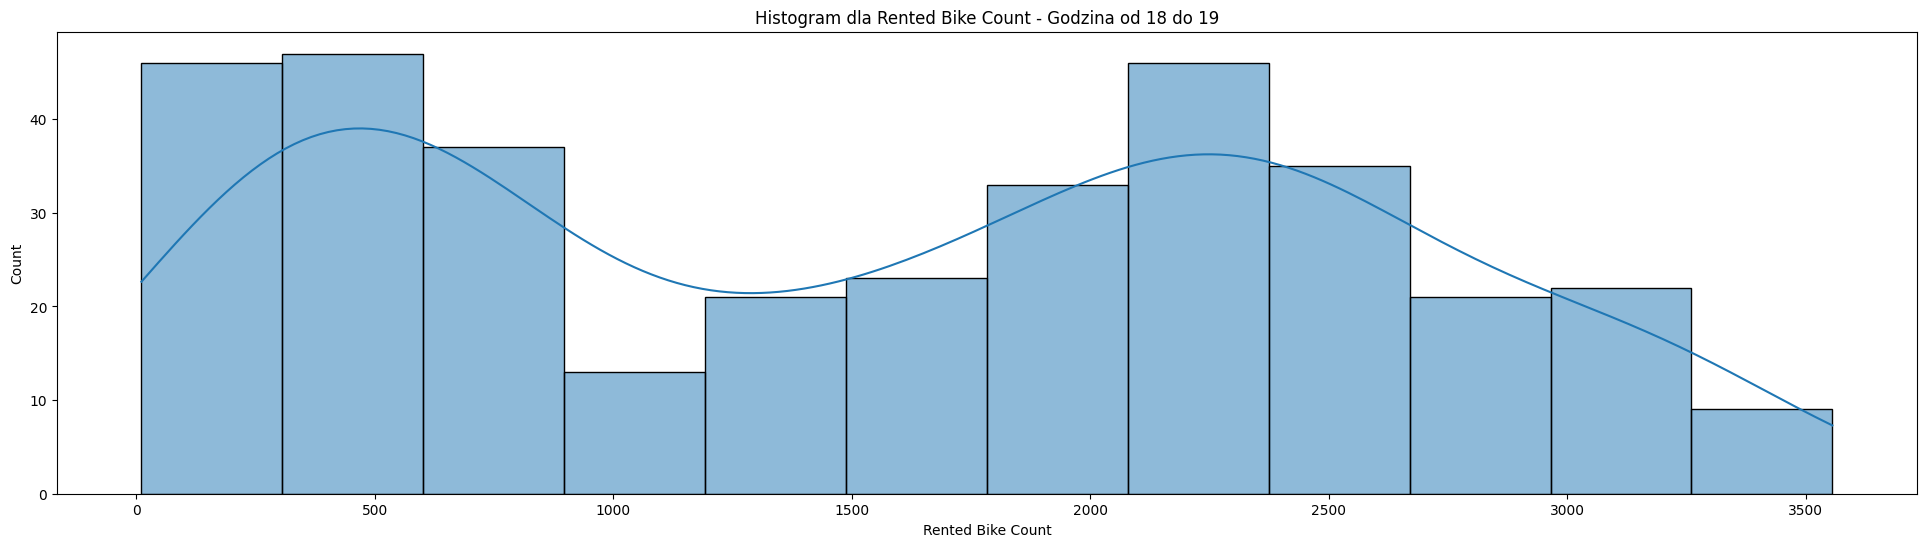

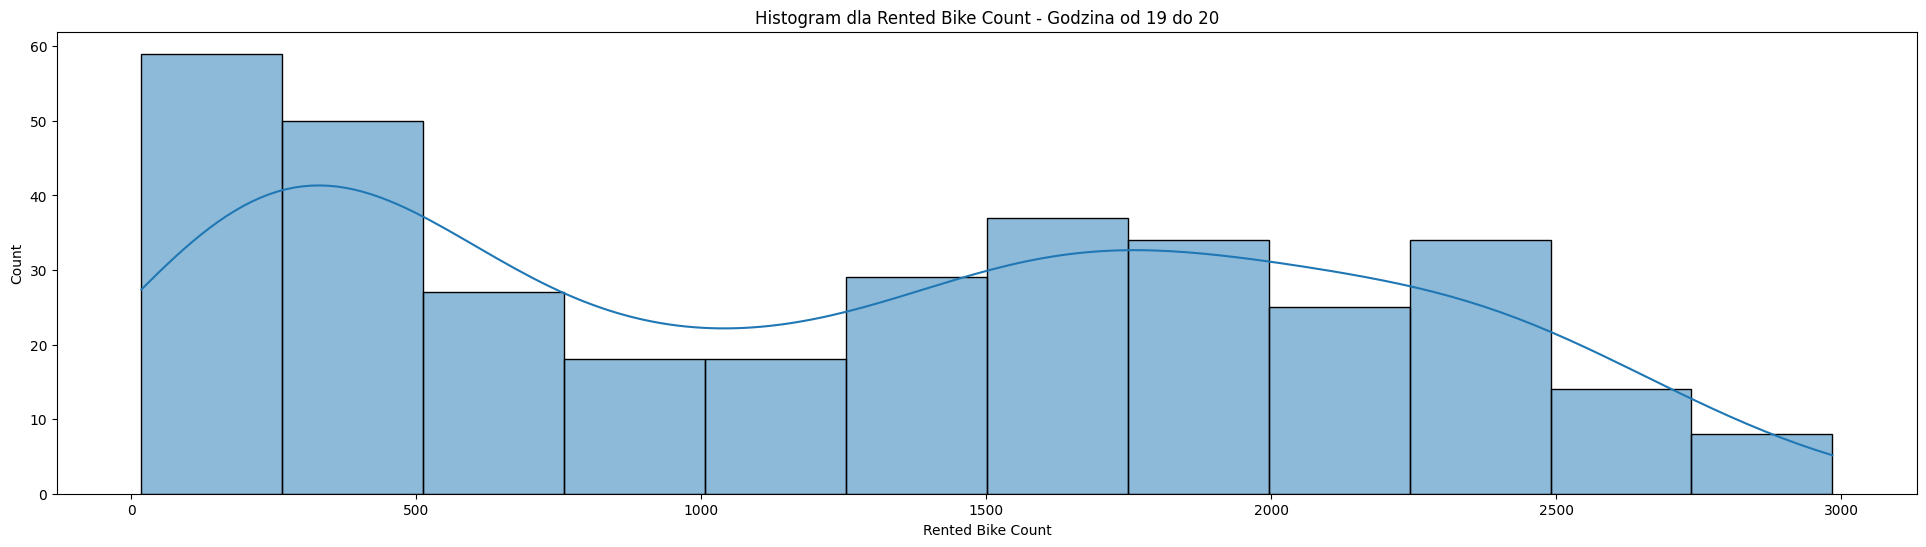

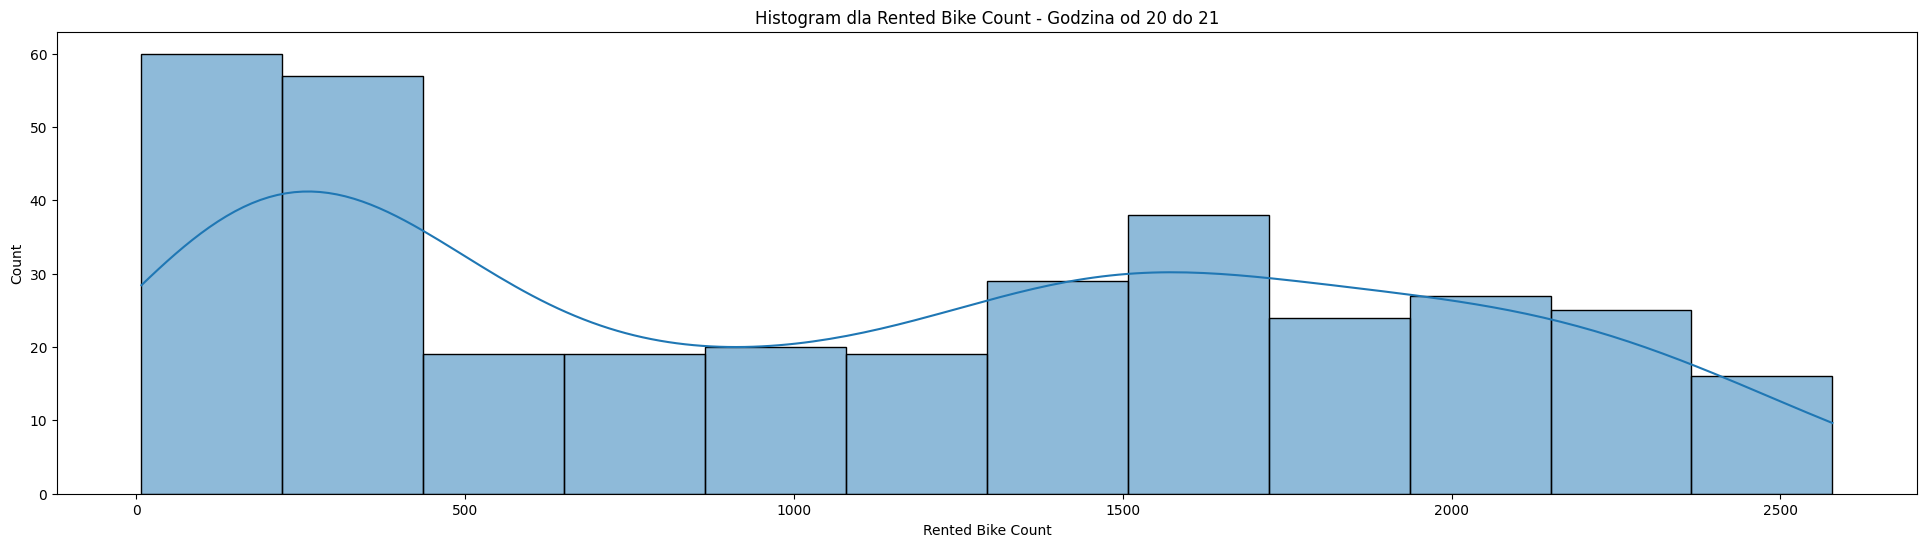

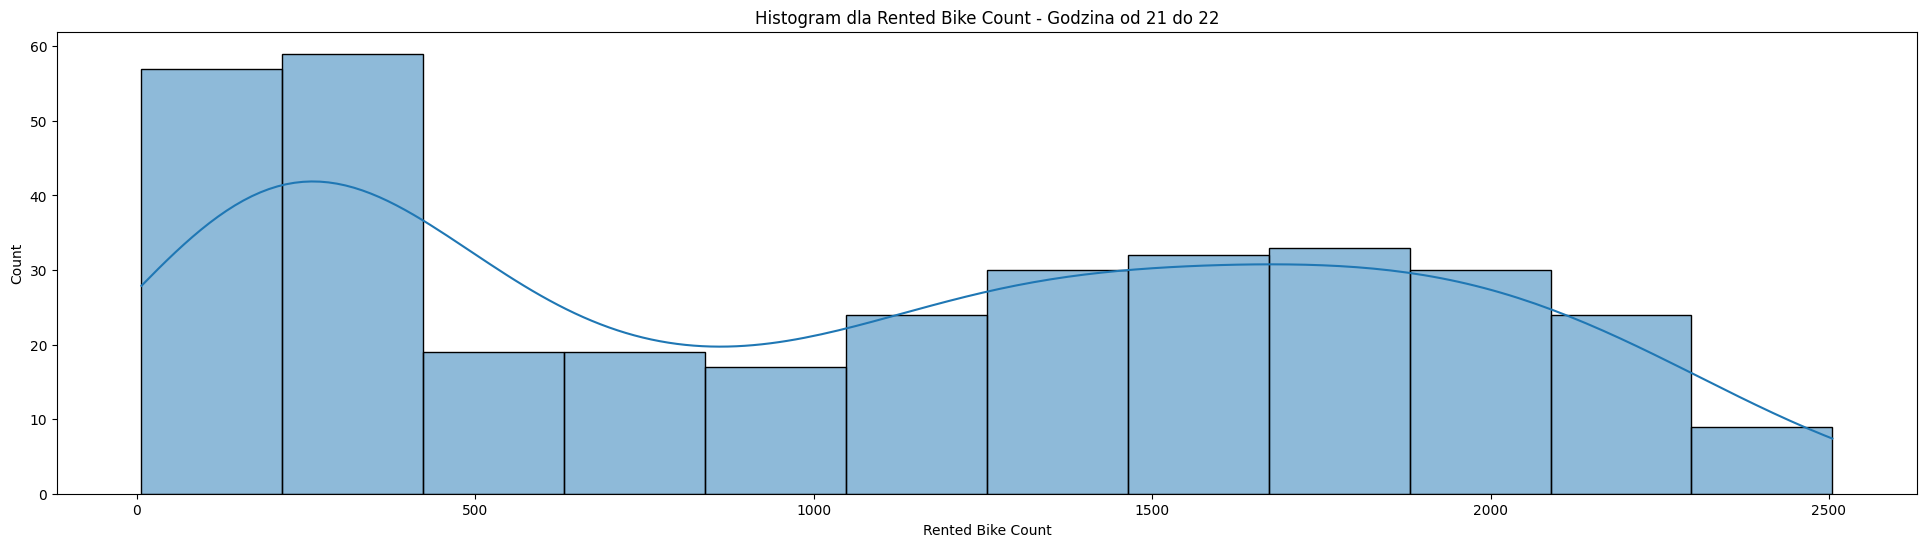

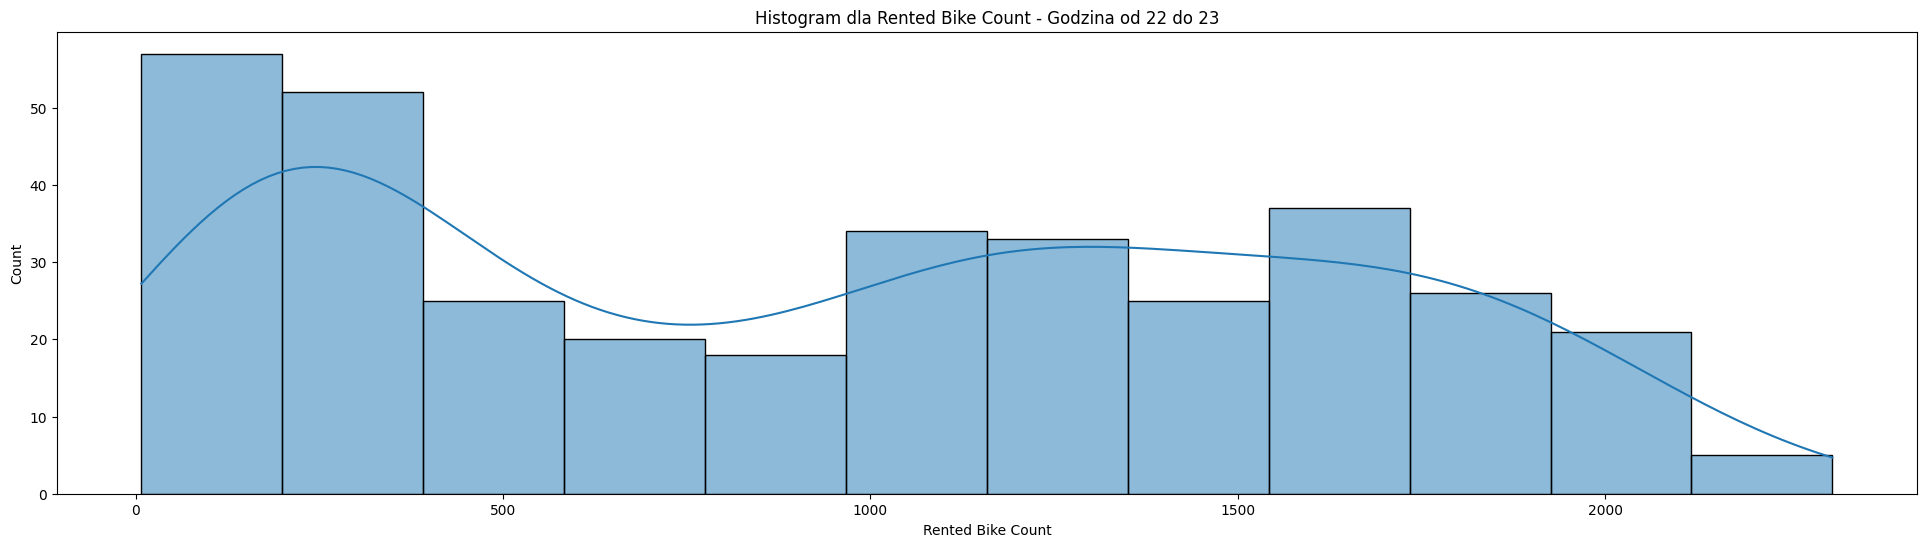

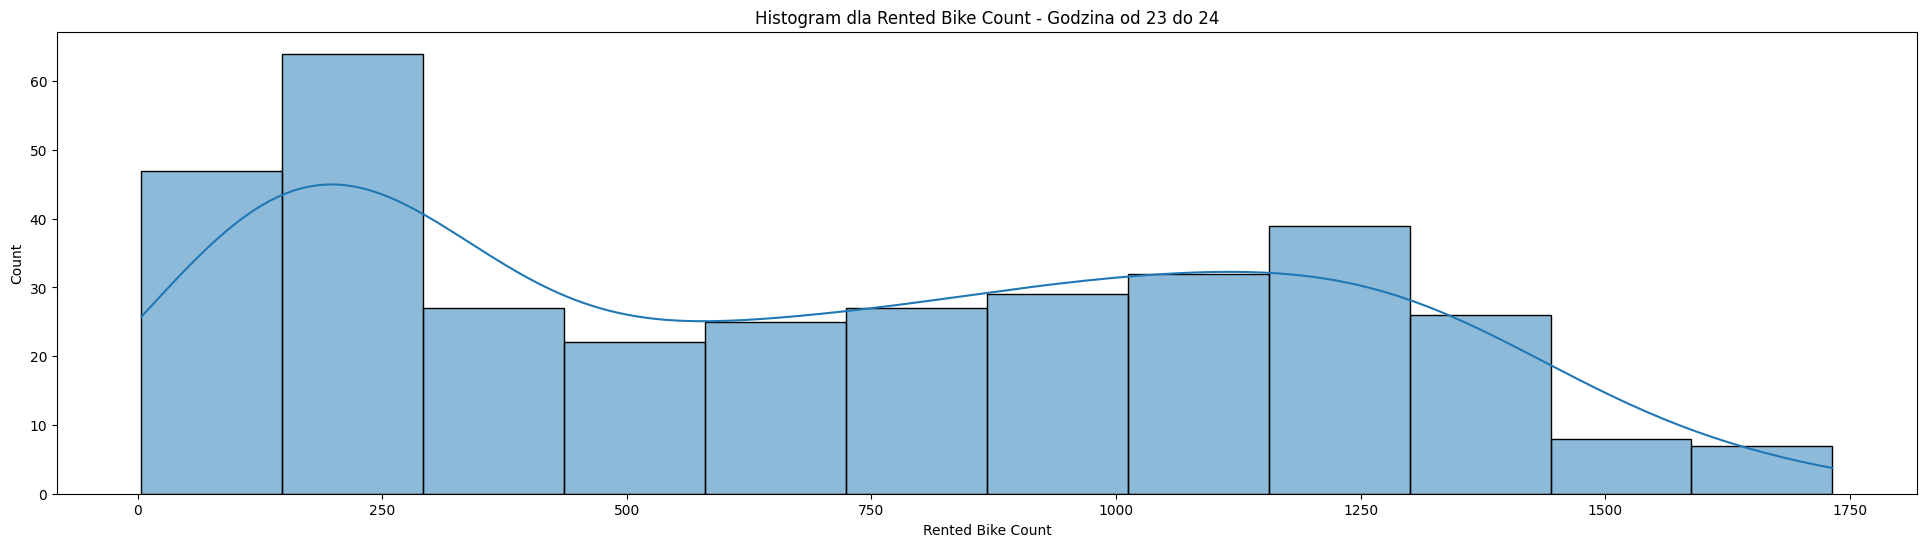

In [ ]:
# Tworzenie wykresów histogramów dla każdego przedziału temperatur
for hour_range in hour_ranges:
    df_hour = df[(df['Hour'] >= hour_range[0]) & (df['Hour'] < hour_range[1])]

    # Wykres histogramu
    plt.figure(figsize=(24, 6))
    sns.histplot(df_hour['Rented Bike Count'], bins=12, kde=True)
    plt.title(f'Histogram dla Rented Bike Count - Godzina od {hour_range[0]} do {hour_range[1]}')
    plt.show()

ilości wypożyczeń są mocno zależne od godziny, z racji bycia zmienną opisową nie ma bezpośredniej korelacji

In [ ]:
# Inicjalizacja list na wartości statystyczne
mean_values = []
median_values = []
mode_values = []
std_dev_values = []
variance_values = []
range_values = []
q1_values = []
q3_values = []
skewness_values = []
kurtosis_values = []

# Obliczanie wartości dla każdego zakresu temperatur
for hour_range in hour_ranges:
    df_hour = df[(df['Hour'] >= hour_range[0]) & (df['Hour'] < hour_range[1])]

    mean_values.append(df_hour['Rented Bike Count'].mean())
    median_values.append(df_hour['Rented Bike Count'].median())
    mode_values.append(df_hour['Rented Bike Count'].mode()[0])
    std_dev_values.append(df_hour['Rented Bike Count'].std())
    variance_values.append(df_hour['Rented Bike Count'].var())
    range_values.append(df_hour['Rented Bike Count'].max() - df_hour['Rented Bike Count'].min())
    q1_values.append(df_hour['Rented Bike Count'].quantile(0.25))
    q3_values.append(df_hour['Rented Bike Count'].quantile(0.75))
    skewness_values.append(df_hour['Rented Bike Count'].skew())
    kurtosis_values.append(df_hour['Rented Bike Count'].kurtosis())

# Wypisywanie wartości
for i, sun_r in enumerate(sun):
    print(f"Zakres temperatury od {sun_r[0]} do {sun_r[1]}:")
    print(f"Średnia: {mean_values[i]}")
    print(f"Mediana: {median_values[i]}")
    print(f"Modalna: {mode_values[i]}")
    print(f"Odchylenie standardowe: {std_dev_values[i]}")
    print(f"Wariancja: {variance_values[i]}")
    print(f"Zakres: {range_values[i]}")
    print(f"Kwartyl 1: {q1_values[i]}")
    print(f"Kwartyl 3: {q3_values[i]}")
    print(f"Skośność: {skewness_values[i]}")
    print(f"Kurtoza: {kurtosis_values[i]}")
    print()

Zakres temperatury od 0.0 do 0.5:
Średnia: 561.4573863636364
Mediana: 531.5
Modalna: 171
Odchylenie standardowe: 355.77645659570186
Wariancja: 126576.88706779332
Zakres: 1372
Kwartyl 1: 212.75
Kwartyl 3: 872.5
Skośność: 0.214685085073226
Kurtoza: -1.191223631376913

Zakres temperatury od 0.5 do 1.0:
Średnia: 441.92329545454544
Mediana: 411.5
Modalna: 122
Odchylenie standardowe: 278.5148900098524
Wariancja: 77570.54395720019
Zakres: 1065
Kwartyl 1: 187.5
Kwartyl 3: 675.25
Skośność: 0.3623960120402587
Kurtoza: -0.9473042124779734

Zakres temperatury od 1.0 do 1.5:
Średnia: 312.7698863636364
Mediana: 277.0
Modalna: 93
Odchylenie standardowe: 205.63319181230403
Wariancja: 42285.00957491582
Zakres: 1245
Kwartyl 1: 129.0
Kwartyl 3: 466.0
Skośność: 0.6996182377148048
Kurtoza: 0.33604249065734315

Zakres temperatury od 1.5 do 2.0:
Średnia: 210.8409090909091
Mediana: 183.5
Modalna: 32
Odchylenie standardowe: 140.2817788131355
Wariancja: 19678.97746697747
Zakres: 642
Kwartyl 1: 90.0
Kwartyl 3: 3

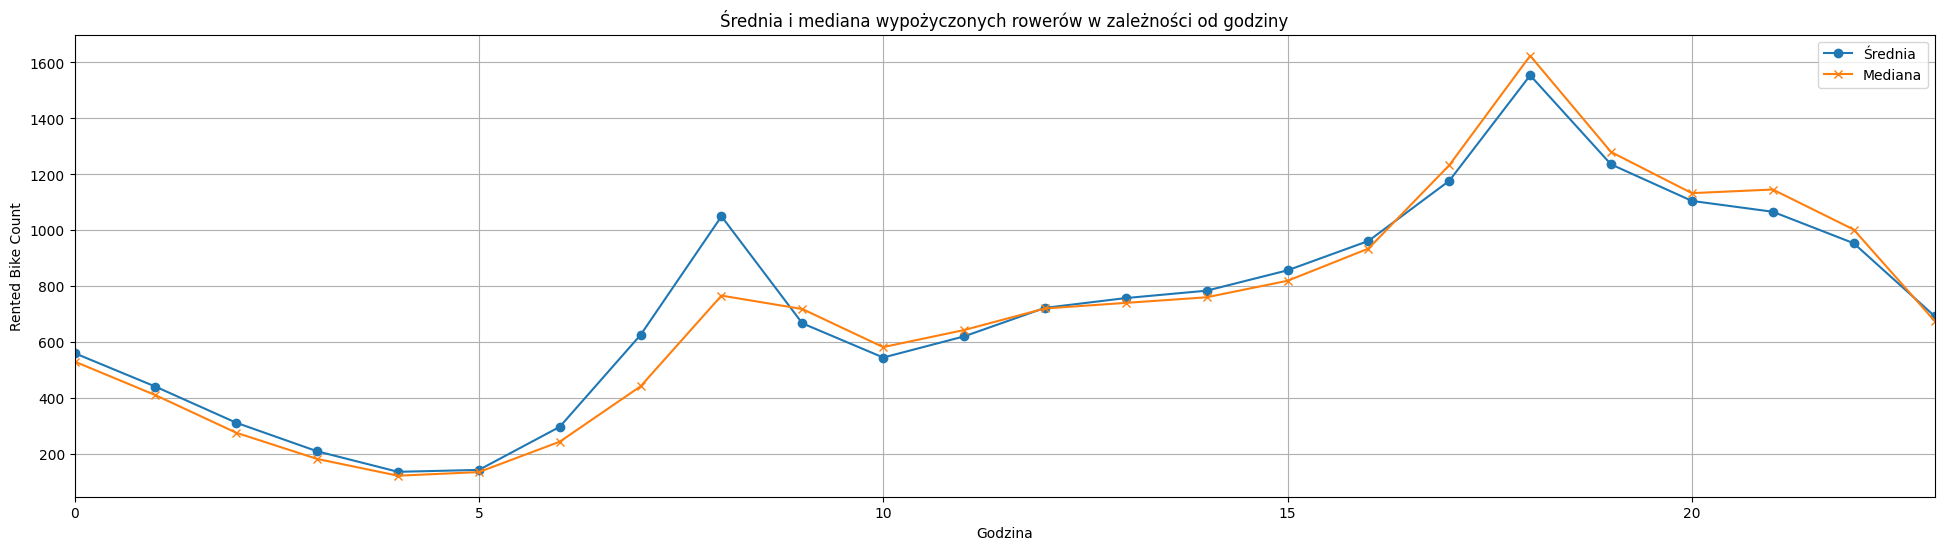

In [ ]:
# Inicjalizacja list na wartości średniej i mediany
mean_values = []
median_values = []

# Zakres godzin
hour_range = range(24)

# Obliczanie wartości dla każdej godziny
for hour in hour_range:
    df_hour = df[df['Hour'] == hour]
    mean_values.append(df_hour['Rented Bike Count'].mean())
    median_values.append(df_hour['Rented Bike Count'].median())

# Tworzenie wykresu
plt.figure(figsize=(24, 6))
plt.plot(hour_range, mean_values, marker='o', label='Średnia')
plt.plot(hour_range, median_values, marker='x', label='Mediana')
plt.xlabel('Godzina')
plt.ylabel('Rented Bike Count')
plt.title('Średnia i mediana wypożyczonych rowerów w zależności od godziny')
plt.xlim(0, 23)
plt.legend()
plt.grid(True)
plt.show()


graf wskazuje na to że najwięcej wypożyczeń występuje w momencie dojazdu do pracy 1 zmianu, oraz w czasie wolnym 1 zmiany a spadek następuje w maomencie w którym 1 zmiana wraca do domu, z najmniejszą ilością wypożyczeń nad ranem kiedy większość ludzi śpi. Można postawić tezę że więcej osób korzysta w wolnym czasie rekreacyjnie z rowerów niż używa ich jako środka transportu do pracy

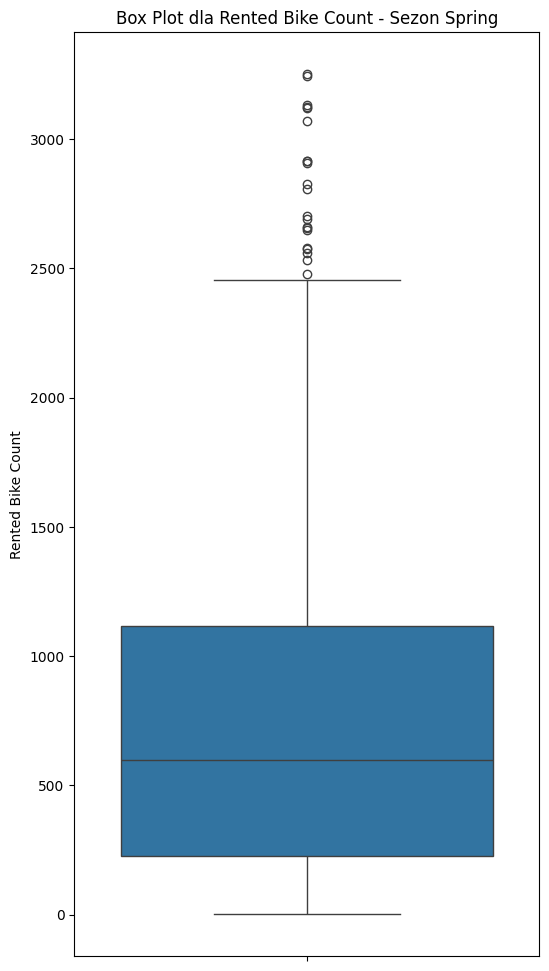

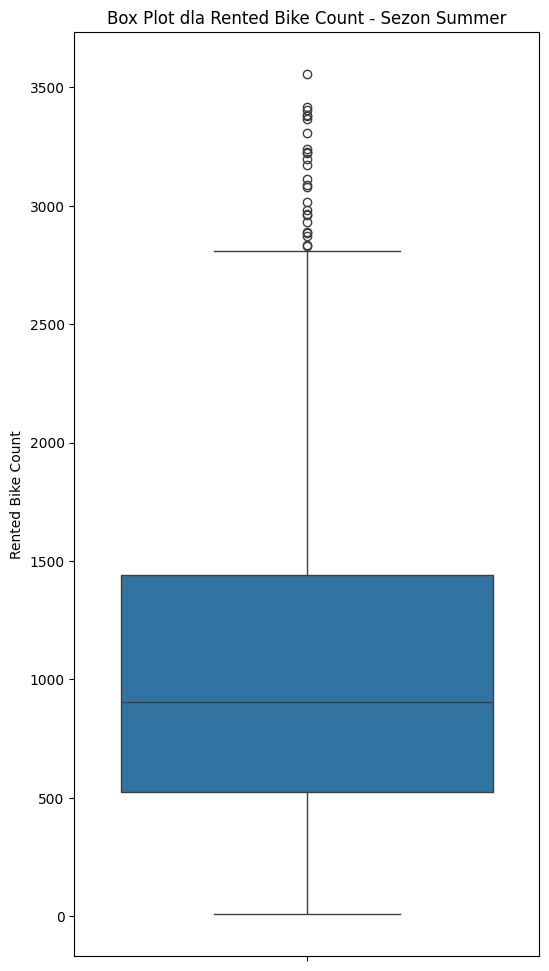

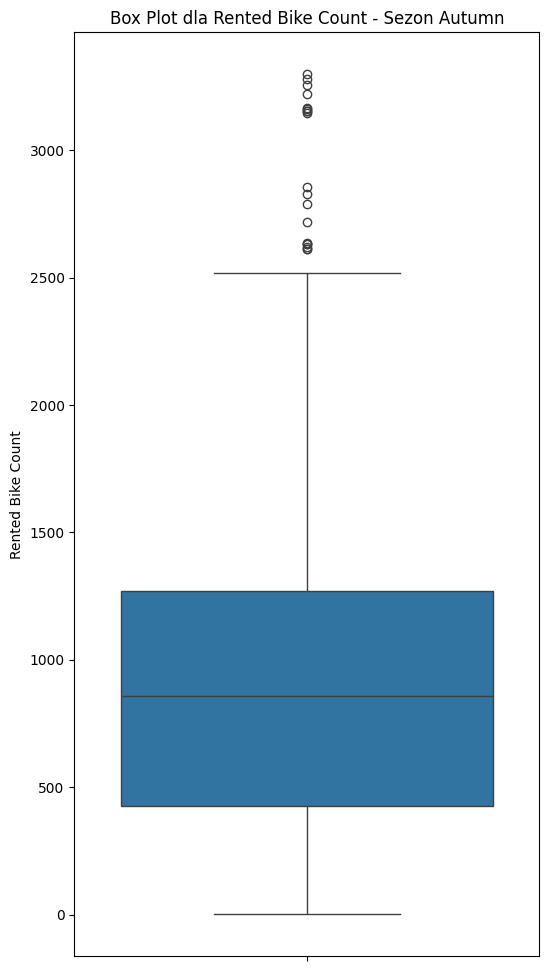

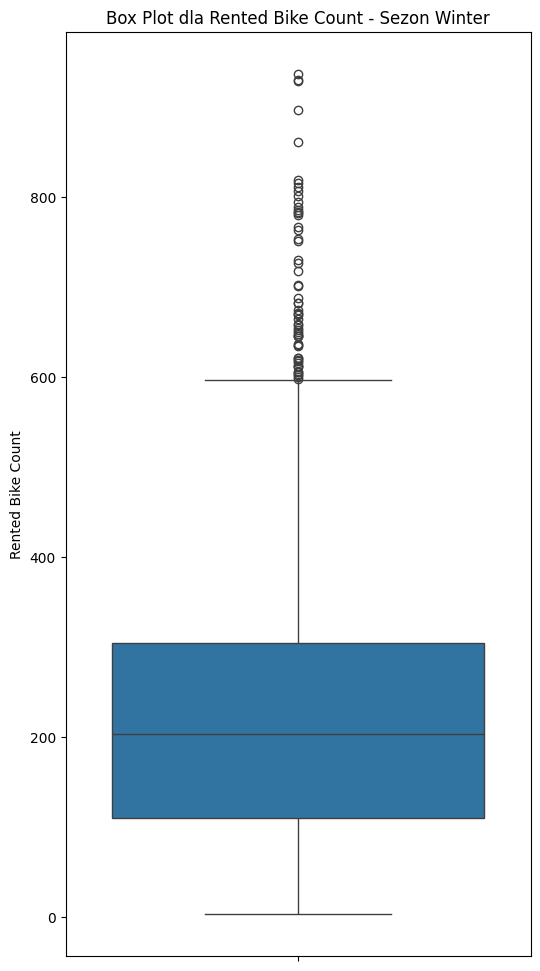

In [ ]:
# Podział na wykresy dla poszczególnych sezonów
seasons = sorted(df['Seasons'].unique())
seasons_names = {4: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'}

for season in seasons:
    df_seasons = df[df['Seasons'] == season]

    # Wykres ramka-wąsy
    plt.figure(figsize=(6, 12))
    sns.boxplot(y=df_seasons['Rented Bike Count'])
    plt.title(f'Box Plot dla Rented Bike Count - Sezon {seasons_names[season]}')
    plt.show()


jak wyżej zmianna opisowa, więc brak bezpośredniej korelacji

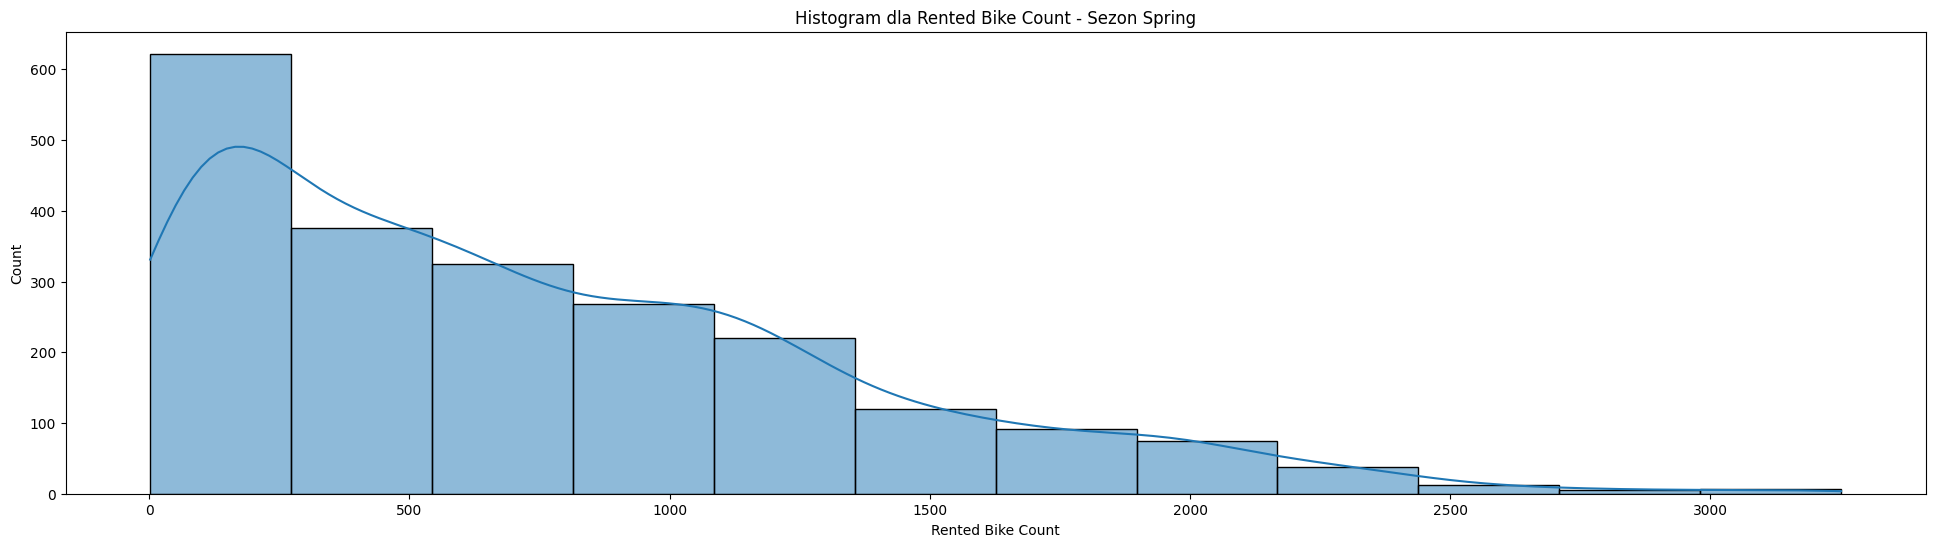

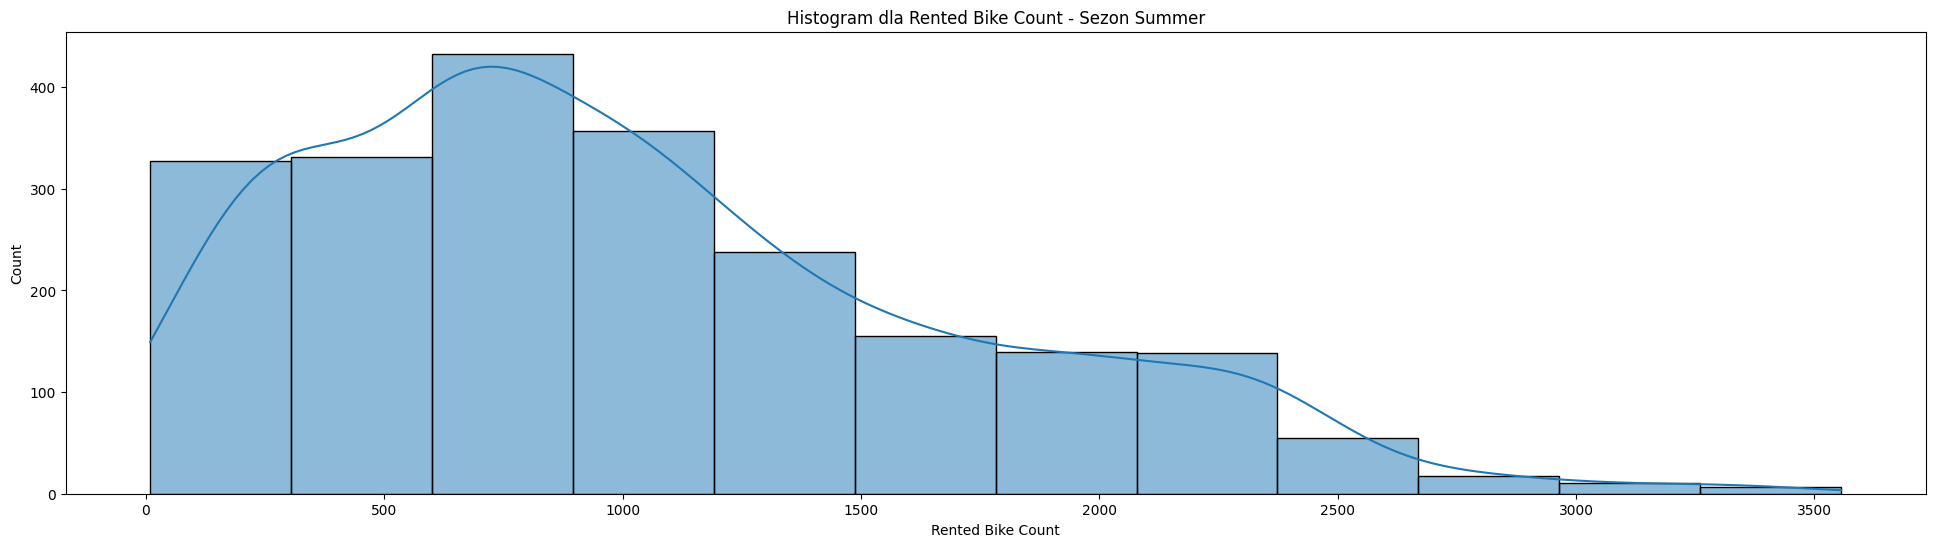

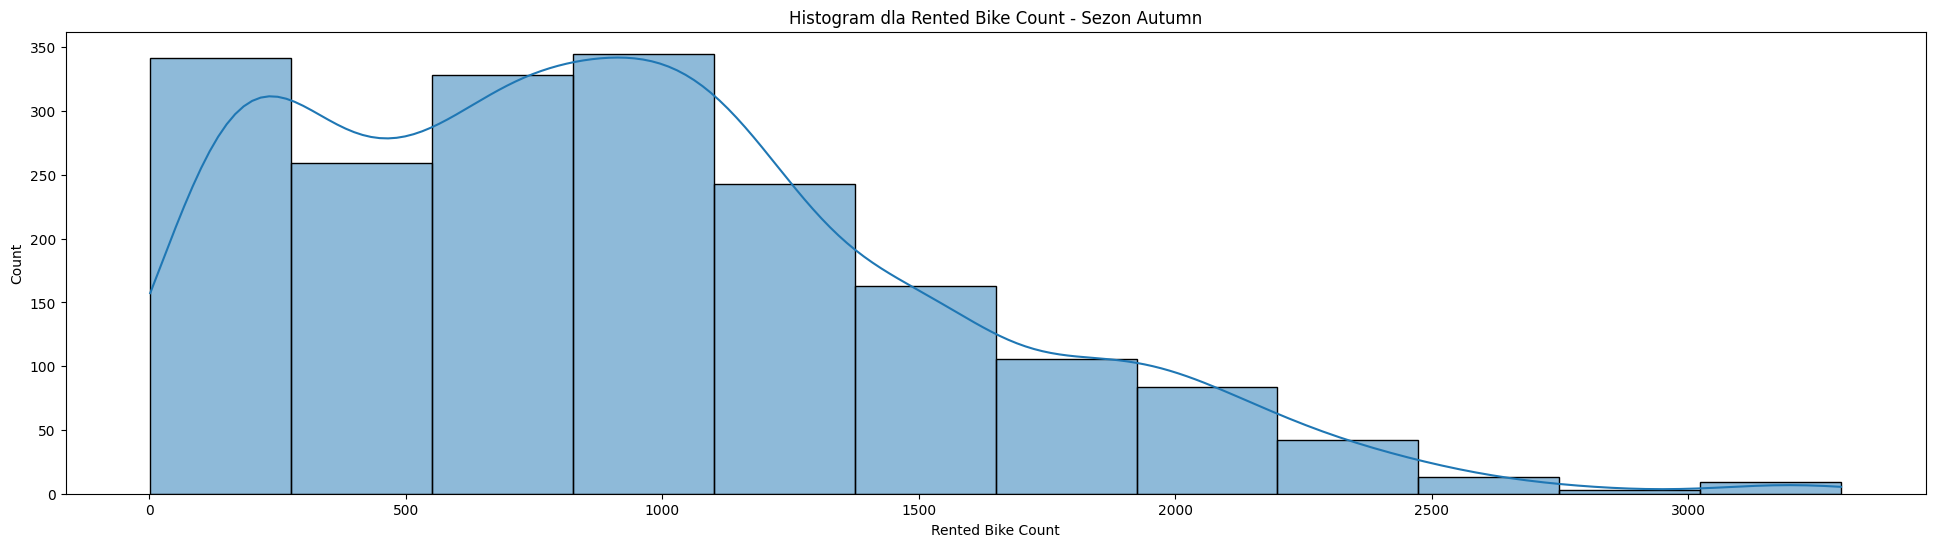

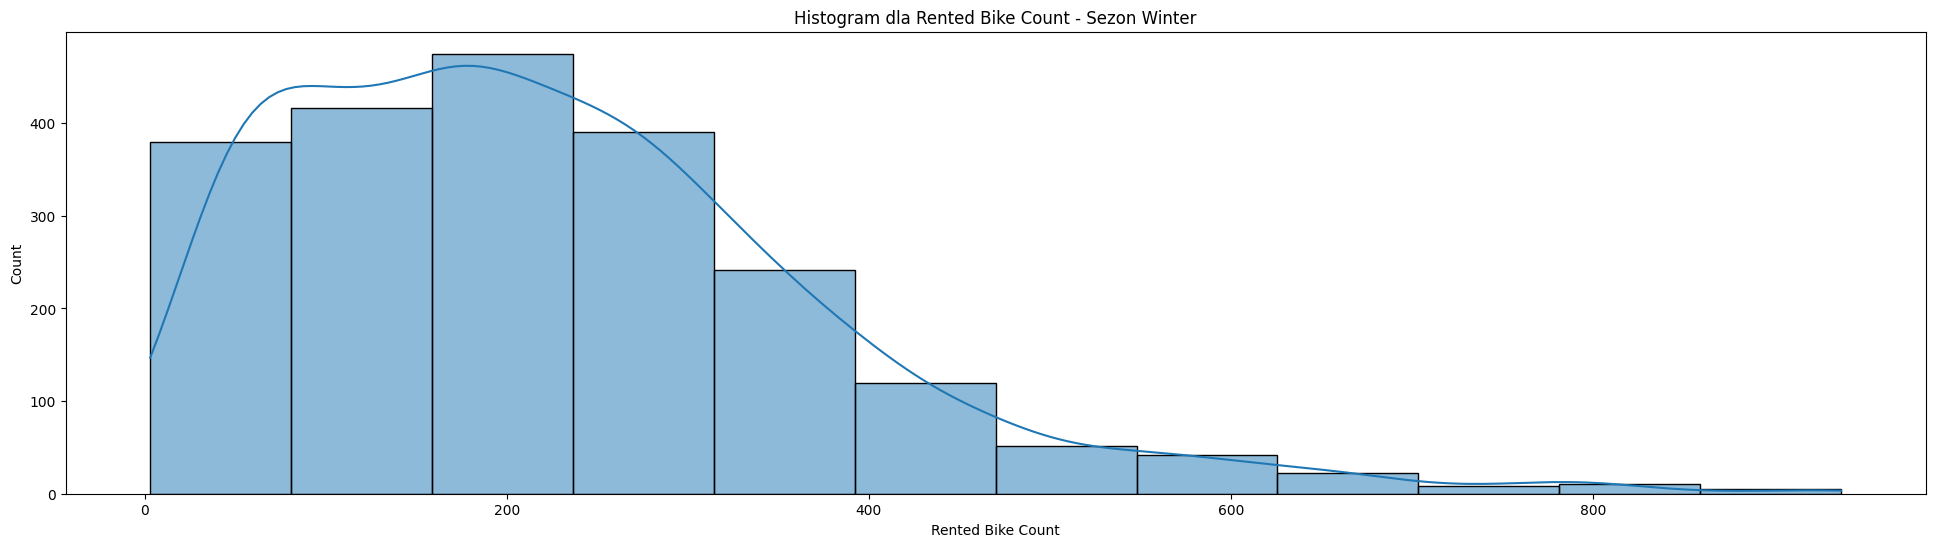

In [ ]:
# Tworzenie wykresów histogramów dla każdego przedziału temperatur
for season in seasons:
    df_seasons = df[df['Seasons'] == season]

    # Wykres histogramu
    plt.figure(figsize=(24, 6))
    sns.histplot(df_seasons['Rented Bike Count'], bins=12, kde=True)
    plt.title(f'Histogram dla Rented Bike Count - Sezon {seasons_names[season]}')
    plt.show()

jak wyżej zmianna opisowa, więc brak bezpośredniej korelacji, aczkolwiek w cieplejszych miesiącach wykresy stają się w mniejszym stopniu prawoskośne

In [ ]:
# Inicjalizacja list na wartości statystyczne
mean_values = []
median_values = []
mode_values = []
std_dev_values = []
variance_values = []
range_values = []
q1_values = []
q3_values = []
skewness_values = []
kurtosis_values = []

# Obliczanie wartości dla każdego zakresu temperatur
for season in seasons:
    df_seasons = df[df['Seasons'] == season]

    mean_values.append(df_seasons['Rented Bike Count'].mean())
    median_values.append(df_seasons['Rented Bike Count'].median())
    mode_values.append(df_seasons['Rented Bike Count'].mode()[0])
    std_dev_values.append(df_seasons['Rented Bike Count'].std())
    variance_values.append(df_seasons['Rented Bike Count'].var())
    range_values.append(df_seasons['Rented Bike Count'].max() - df_seasons['Rented Bike Count'].min())
    q1_values.append(df_seasons['Rented Bike Count'].quantile(0.25))
    q3_values.append(df_seasons['Rented Bike Count'].quantile(0.75))
    skewness_values.append(df_seasons['Rented Bike Count'].skew())
    kurtosis_values.append(df_seasons['Rented Bike Count'].kurtosis())

# Wypisywanie wartości
for i, season in enumerate(seasons):
    print(f"Sezon {seasons_names[season]}:")
    print(f"Średnia: {mean_values[i]}")
    print(f"Mediana: {median_values[i]}")
    print(f"Modalna: {mode_values[i]}")
    print(f"Odchylenie standardowe: {std_dev_values[i]}")
    print(f"Wariancja: {variance_values[i]}")
    print(f"Zakres: {range_values[i]}")
    print(f"Kwartyl 1: {q1_values[i]}")
    print(f"Kwartyl 3: {q3_values[i]}")
    print(f"Skośność: {skewness_values[i]}")
    print(f"Kurtoza: {kurtosis_values[i]}")
    print()

Sezon Spring:
Średnia: 746.2541666666667
Mediana: 599.0
Modalna: 17
Odchylenie standardowe: 618.6679618302023
Wariancja: 382750.04699513665
Zakres: 3249
Kwartyl 1: 225.0
Kwartyl 3: 1118.0
Skośność: 0.9898431599007955
Kurtoza: 0.5790399609227914

Sezon Summer:
Średnia: 1034.0733695652175
Mediana: 905.5
Modalna: 381
Odchylenie standardowe: 690.2447593950162
Wariancja: 476437.8278722838
Zakres: 3547
Kwartyl 1: 526.75
Kwartyl 3: 1442.5
Skośność: 0.7575721212429787
Kurtoza: 0.025884052787571665

Sezon Autumn:
Średnia: 924.1104801239029
Mediana: 856.0
Modalna: 644
Odchylenie standardowe: 617.5478794789879
Wariancja: 381365.38344899454
Zakres: 3296
Kwartyl 1: 427.0
Kwartyl 3: 1271.0
Skośność: 0.7231108954596802
Kurtoza: 0.2638023702599446

Sezon Winter:
Średnia: 225.5412037037037
Mediana: 203.0
Modalna: 103
Odchylenie standardowe: 150.37223588512109
Wariancja: 22611.809325090497
Zakres: 934
Kwartyl 1: 110.0
Kwartyl 3: 305.0
Skośność: 1.1559403115195457
Kurtoza: 1.899791684222079



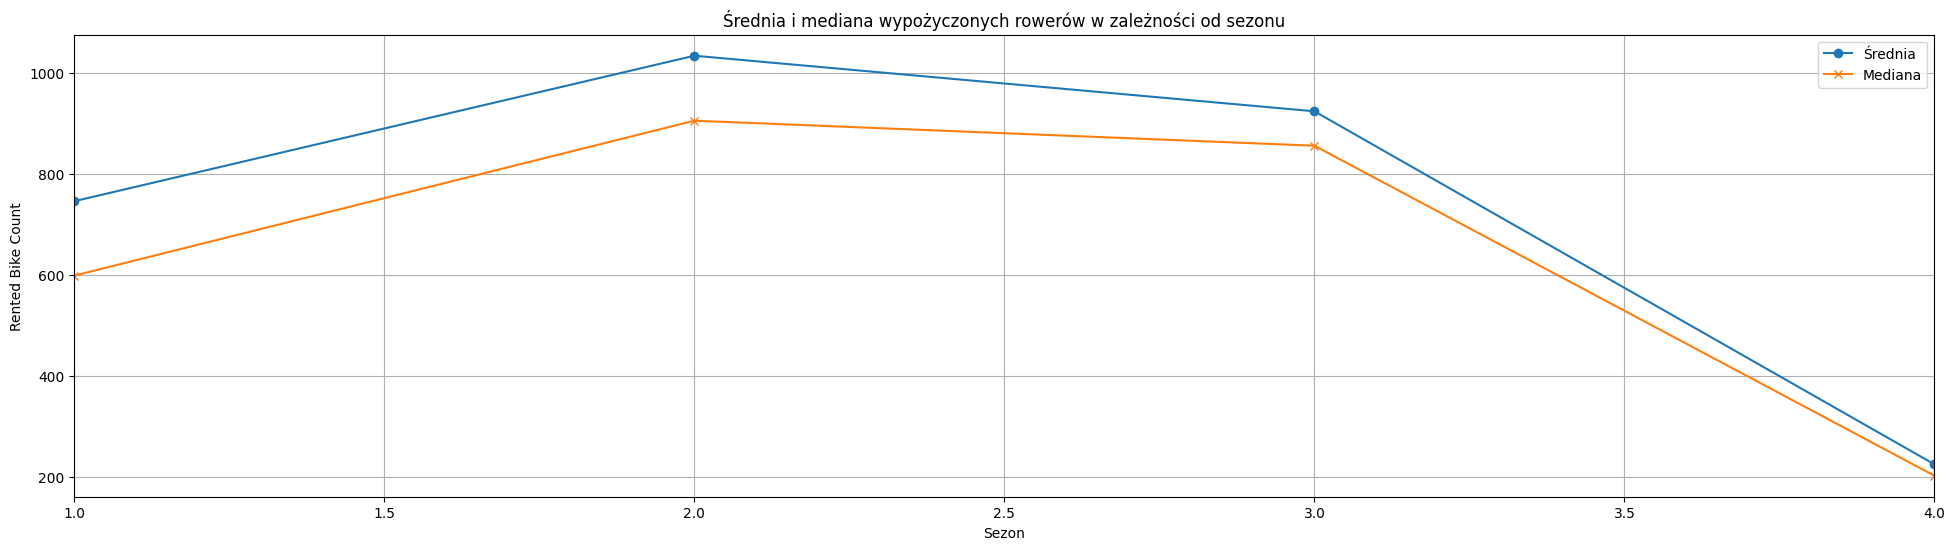

In [ ]:
# Inicjalizacja list na wartości średniej i mediany
mean_values = []
median_values = []

# Zakres sezonów
season_range = range(5)

# Obliczanie wartości dla każdego sezonu
for season in season_range:
    df_season = df[df['Seasons'] == season]
    mean_values.append(df_season['Rented Bike Count'].mean())
    median_values.append(df_season['Rented Bike Count'].median())

# Tworzenie wykresu
plt.figure(figsize=(24, 6))
plt.plot(season_range, mean_values, marker='o', label='Średnia')
plt.plot(season_range, median_values, marker='x', label='Mediana')
plt.xlabel('Sezon')
plt.ylabel('Rented Bike Count')
plt.title('Średnia i mediana wypożyczonych rowerów w zależności od sezonu')
plt.xlim(1, 4)
plt.legend()
plt.grid(True)
plt.show()


w cieplejszych sezonach mamy więcej wypożyczeń, co nie powinno być zaskoczeniem dla nikogo

testowanie shapiro-wilka czy mamy rozklad normalny

In [ ]:
import scipy.stats as stats

# Test Shapiro-Wilka
W, p = stats.shapiro(df['Rented Bike Count'])

print(f"Wartość statystyki W: {W}")
print(f"Wartość p: {p}")


Wartość statystyki W: 0.8845175504684448
Wartość p: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Wartosc p to 0.0 i jest mniejsza od wartosci W, a wiec nie mamy rozkladu normalnego

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65456 (\N{HALFWIDTH HANGUL LETTER RIEUL-HIEUH}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65456 (\N{HALFWIDTH HANGUL LETTER RIEUL-HIEUH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


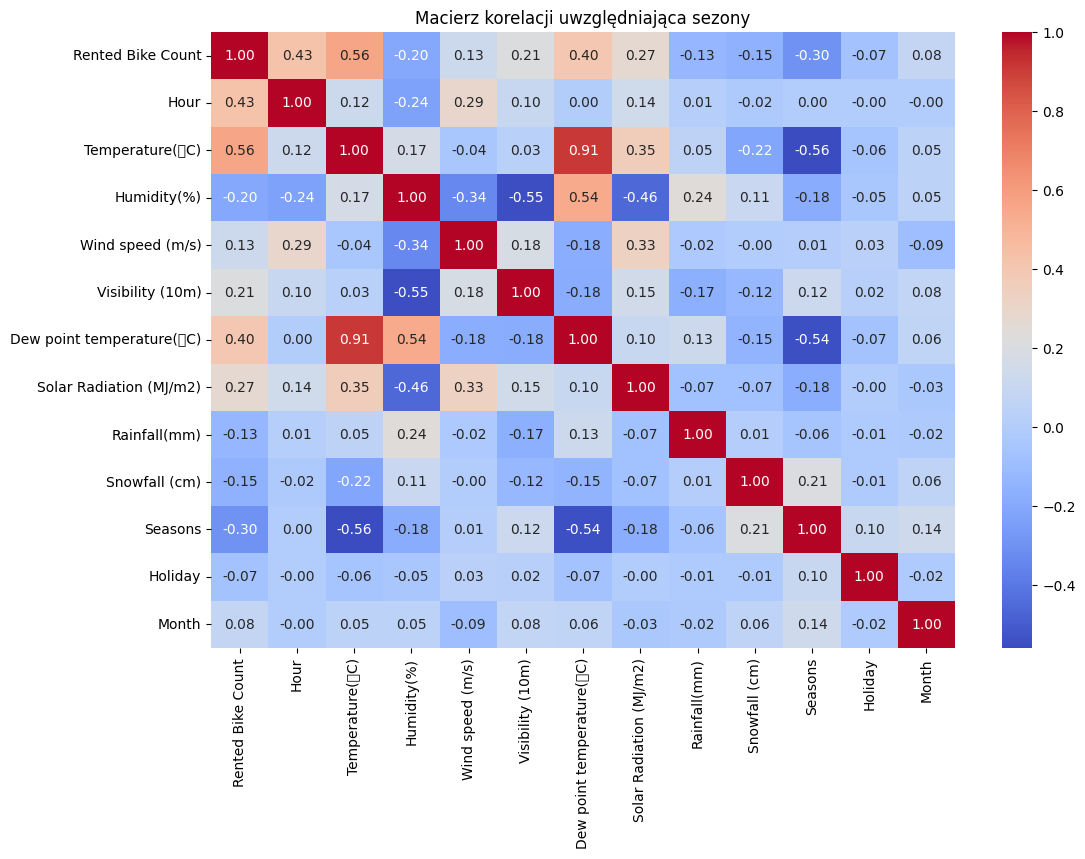

In [ ]:
# Usunięcie kolumny 'Date'
df_without_date = df.drop('Date', axis=1)

# Obliczenie macierzy korelacji
correlation_matrix = df_without_date.corr()

# Wykres macierzy korelacji
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji uwzględniająca sezony')
plt.show()


jak sie spodziewalismy cieplo, slonce i czesciowo z nimi powiazane sezony i miesiace maja wplyw, oraz godzina wyporzyczenia (malo kto wypozycza rower o polnocy) ale rowniez wilgotnosc, widocznosc i opady sniegu i deszczu maja lekki wplyw

regresja jednej zmiennej

In [ ]:
from sklearn.model_selection import train_test_split

numeric_columns = df.select_dtypes(include=['number'])

# Select features (X) and target variable (y)
X = numeric_columns[['Temperature(ﾰC)']]
y = numeric_columns['Rented Bike Count']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6772, 1) (6772,)
Testing set shape: (1693, 1) (1693,)


In [ ]:
1693/(1693+6772)

0.2

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([30.0770985])

In [ ]:
model.intercept_

346.61897785338726

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.31467928591123917,     R2_test = 0.32488243123316574,
MAE_train = 396.1951596444278,    MAE_test = 381.238502216127,
MSE_train = 286146.2852016107,    MSE_test = 265041.95053837827,
RMSE_train = 534.9264297093673,    RMSE_test = 514.8222514017613 


model niedouczony

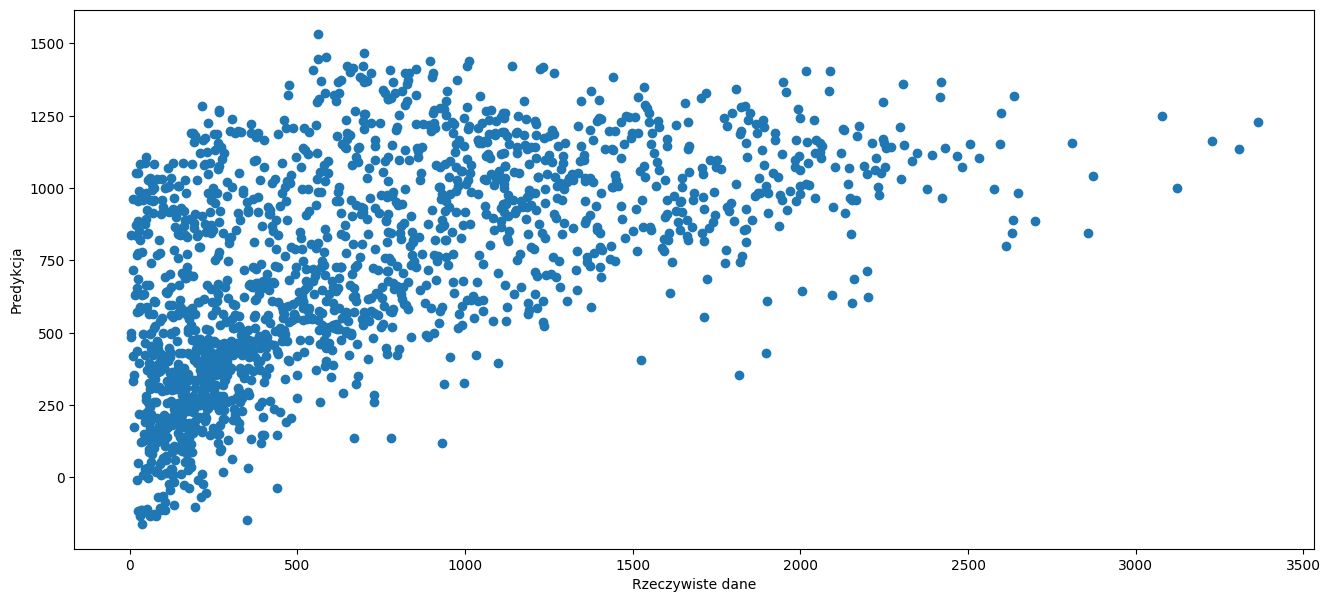

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()

regresja wielu zmiennych

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

# Select features (X) and target variable (y)
X = numeric_columns.drop(columns=['Rented Bike Count'])
y = numeric_columns['Rented Bike Count']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6772, 12) (6772,)
Testing set shape: (1693, 12) (1693,)


In [ ]:
1693/(1693+6772)

0.2

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 2.86206274e+01,  2.08172865e+01, -1.06608042e+01,  7.00087686e+00,
        2.12225365e-02,  1.04385652e+01, -7.87394989e+01, -6.39882296e+01,
        1.84876773e+01, -3.76369078e+01, -1.27625799e+02,  1.32301596e+01])

In [ ]:
model.intercept_

740.860607477355

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [ ]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.518604010037559,     R2_test = 0.529483930585001,
MAE_train = 332.92522780719014,    MAE_test = 328.2246877642412,
MSE_train = 201000.30745731032,    MSE_test = 184718.19215901976,
RMSE_train = 448.33057832062974,    RMSE_test = 429.78854354091357 


model ciagle niedouczony, ale lepiej niz poprzednio

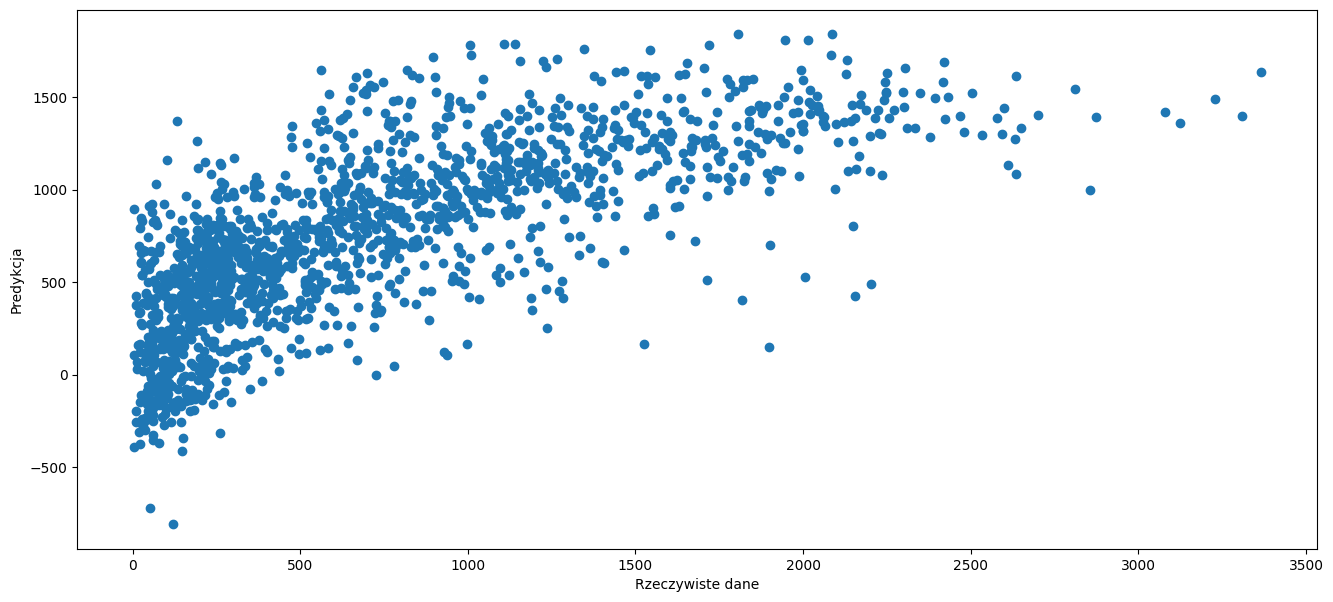

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()

regresja wielu zmiennych, ale tylko na znaczacych

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

# Select features (X) and target variable (y)
X = numeric_columns[['Hour','Temperature(ﾰC)','Seasons','Solar Radiation (MJ/m2)','Dew point temperature(ﾰC)']]
y = numeric_columns['Rented Bike Count']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6772, 5) (6772,)
Testing set shape: (1693, 5) (1693,)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 28.17414661,  62.68002362, -21.18441603, -92.25221005,
       -33.31825918])

In [ ]:
model.intercept_

-155.42062743398765

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [ ]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.48949718231970807,     R2_test = 0.5038342912398024,
MAE_train = 345.1548005417065,    MAE_test = 339.0578123930494,
MSE_train = 213153.4650290039,    MSE_test = 194787.89076733025,
RMSE_train = 461.68546114102827,    RMSE_test = 441.3478115583335 


model niedouczony, ale pomimo usuniecia duzej ilosci kolumn stracilismy niewiele poprawnosci modelu, co wskazuje na to ze nie mamy danych ktore pozwolilyby na lepsza predykcje, czego moznabylo sie spodziewac po tym ze najwieksza korelacja to 0.56

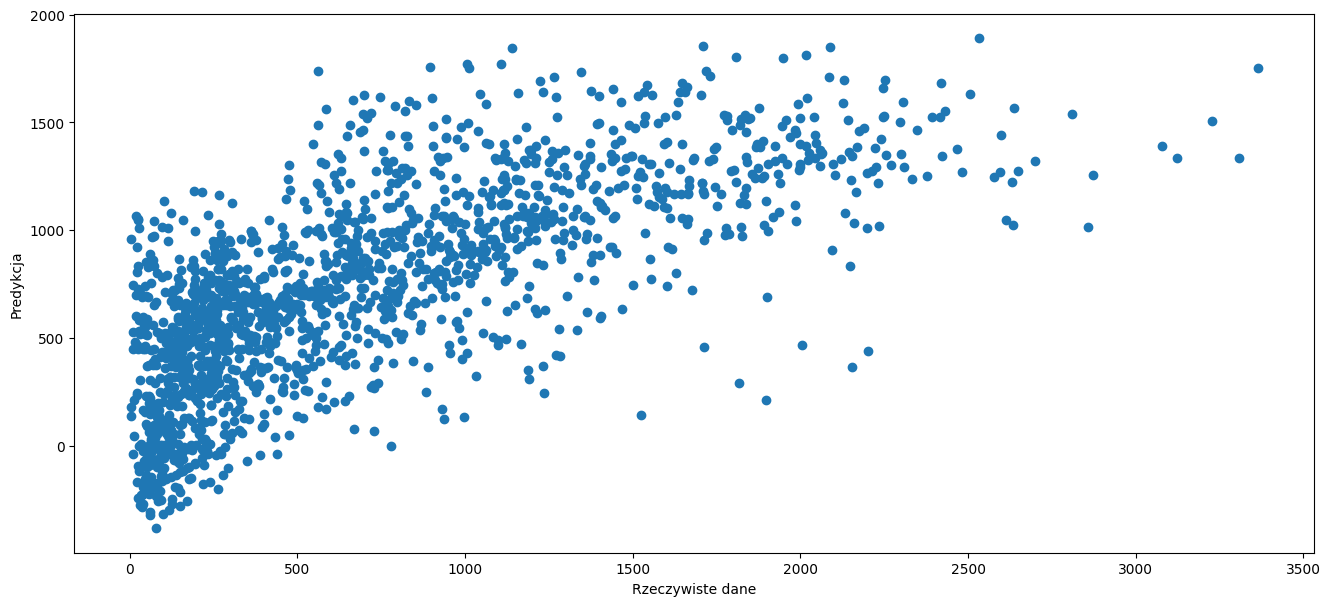

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()